In [1672]:
#importing the necerssary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
from datetime import datetime

# Set Style
sns.set(style = "whitegrid")

import warnings
warnings.filterwarnings('ignore')

## IMPORT DATA

In [1673]:
loan = pd.read_csv('loan.csv', sep=",", encoding = "ISO-8859-1")
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [1674]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [1675]:
loan.nunique().transpose()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [1676]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [1677]:
# get list of columns having 100% nulls
loan_columnNull = loan.columns[round(loan.isnull().sum()/len(loan.index),2)*100 == 100.0]
loan_columnNull

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [1678]:
# Drop null columns
loan = loan.drop(loan_columnNull, axis=1)

Create a function to get missing count and missing percentage of the dataframe

In [1679]:
# Create a function to get missing count and missing percentage of the dataframe
def null_count_perc(dataF):
    count = dataF.isnull().sum().sort_values(ascending=False)
    percent = (round((dataF.isnull().sum()/len(dataF.index))*100,2)).sort_values(ascending=False)
    missing_percent = pd.concat([count, percent], axis=1, keys=['Count','Percentage%'])
    
    return missing_percent

In [1680]:
print(null_count_perc(loan).head(20))

                            Count  Percentage%
next_pymnt_d                38577        97.13
mths_since_last_record      36931        92.99
mths_since_last_delinq      25682        64.66
desc                        12940        32.58
emp_title                    2459         6.19
emp_length                   1075         2.71
pub_rec_bankruptcies          697         1.75
last_pymnt_d                   71         0.18
chargeoff_within_12_mths       56         0.14
collections_12_mths_ex_med     56         0.14
revol_util                     50         0.13
tax_liens                      39         0.10
title                          11         0.03
last_credit_pull_d              2         0.01
collection_recovery_fee         0         0.00
acc_now_delinq                  0         0.00
application_type                0         0.00
url                             0         0.00
pymnt_plan                      0         0.00
loan_status                     0         0.00


In [1681]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [1682]:
loan = loan.drop(['id',
                  'emp_title',
                  'desc', 
                  'next_pymnt_d' , 
                  'mths_since_last_record',
                 'title',
                 'zip_code',
                 'addr_state',
                 'url',
                 'member_id',
                 'pymnt_plan',
                 'initial_list_status',
                 'next_pymnt_d',
                 'application_type',
                 'policy_code',
                 'collections_12_mths_ex_med',
                 'acc_now_delinq',
                 'chargeoff_within_12_mths',
                 'delinq_amnt',
                 'tax_liens'], axis=1)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [1683]:
loan.shape

(39717, 38)

In [1684]:
# missing values in rows
loan_row = loan.isnull().sum(axis=1)
loan_row

0        1
1        1
2        1
3        0
4        0
        ..
39712    1
39713    1
39714    1
39715    1
39716    1
Length: 39717, dtype: int64

In [1685]:
# drop rows if there are nulls in target variable 
loan = loan[~loan['loan_status'].isnull()]

In [1686]:
loan.shape

(39717, 38)

In [1687]:
print(null_count_perc(loan).head(20))

                        Count  Percentage%
mths_since_last_delinq  25682        64.66
emp_length               1075         2.71
pub_rec_bankruptcies      697         1.75
last_pymnt_d               71         0.18
revol_util                 50         0.13
last_credit_pull_d          2         0.01
funded_amnt_inv             0         0.00
funded_amnt                 0         0.00
purpose                     0         0.00
loan_status                 0         0.00
issue_d                     0         0.00
verification_status         0         0.00
annual_inc                  0         0.00
home_ownership              0         0.00
delinq_2yrs                 0         0.00
sub_grade                   0         0.00
grade                       0         0.00
installment                 0         0.00
int_rate                    0         0.00
term                        0         0.00


Since there is 64% of last delinquency data missing in column 'mths_since_last_delinq' , it doesn't help in any type of analysis on target variable.
#### Therefore, 'mths_since_last_delinq' column shall be dropped

In [1688]:
loan = loan.drop(['mths_since_last_delinq'], axis=1)

In [1689]:
# Split interest rate along % delimiter
loan['int_rate'] = loan['int_rate'].str.split("%", n = 1, expand = True)

# The column int_rate is character type, converting it to numeric
loan.int_rate = pd.to_numeric(loan.int_rate)

#Rename column name
loan.rename(columns = {'int_rate': 'int_rate%'}, inplace = True)

In [1690]:
# Split column 'term' rate along space delimiter
loan['term'] = loan['term'].str.split(expand=True)[0]

# The column 'term' is character type, converting it to numeric
loan.term = pd.to_numeric(loan.term)

In [1691]:
# Split column 'revol_util' rate along % delimiter
loan['revol_util'] = loan['revol_util'].str.split("%", n = 1, expand = True)

# The column 'revol_util' is character type, converting it to numeric
loan.revol_util = pd.to_numeric(loan.revol_util)

#Rename column name
loan.rename(columns = {'revol_util': 'revol_util%'}, inplace = True)

In [1692]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate%,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


Extract year information from columns have month-year format

In [1693]:
#Extract year information from 'issue_d' column
loan['issue_yr'] = pd.to_datetime(loan['issue_d'], format = '%b-%y').dt.year

In [1694]:
#Extract year information from 'issue_d' column
loan['earliest_cr_line_year'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%y').dt.year

In [1695]:
#Extract year information from 'issue_d' column
loan['last_pymnt_year'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y').dt.year

In [1696]:
#Extract year information from 'issue_d' column
loan['last_credit_pull_year'] = pd.to_datetime(loan['last_credit_pull_d'], format = '%b-%y').dt.year

In [1697]:
loan = loan.drop(['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d'], axis=1)

In [1698]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate%,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_yr,earliest_cr_line_year,last_pymnt_year,last_credit_pull_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,863.16,0.00,0.00,0.00,171.62,0.0,2011,1985,2015.0,2016.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,435.17,0.00,117.08,1.11,119.66,0.0,2011,1999,2013.0,2013.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,605.67,0.00,0.00,0.00,649.91,0.0,2011,2001,2014.0,2016.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,2214.92,16.97,0.00,0.00,357.48,0.0,2011,1996,2015.0,2016.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,...,1037.39,0.00,0.00,0.00,67.79,0.0,2011,1996,2016.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,...,322.97,0.00,0.00,0.00,80.90,NaN,2007,1990,2010.0,2010.0
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,...,1413.49,0.00,0.00,0.00,281.94,NaN,2007,1986,2010.0,2010.0
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,...,272.16,0.00,0.00,0.00,0.00,NaN,2007,1998,2008.0,2007.0
39715,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,...,174.20,0.00,0.00,0.00,0.00,NaN,2007,1988,2008.0,2007.0


In [1699]:
# check null percent now
null_count_perc(loan).head(20)

,Count,Percentage%
emp_length,1075,2.71
pub_rec_bankruptcies,697,1.75
last_pymnt_year,71,0.18
revol_util%,50,0.13
last_credit_pull_year,2,0.01
term,0,0.00
int_rate%,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00


Reassign the categorical column 'emp_lenght'

In [1700]:
# Create a new category for 10+ mapping to 'More than 10' and '< 1' to 'Less than 1'
loan['emp_length'] = loan['emp_length'].str.rstrip('years ')
loan['emp_length'].replace({'10+': 'More than 10','< 1':'Less than 1'}, inplace=True)
#loan['emp_length'] = pd.to_numeric(loan['emp_length'])

Impute the missing values in column 'emp_length' with 'Other' category ( Impute mode of 'emp_length' to missing values doesn't make sense )

In [1701]:
loan['emp_length'].fillna('Others', inplace=True)
loan['emp_length'].unique()

array(['More than 10', 'Less than 1', '1', '3', '8', '9', '4', '5', '6',
       '2', '7', 'Others'], dtype=object)

#### Remove rows having null values in remaining calumns 'pub_rec_bankruptcies', 'last_pymnt_year' and 'revol_util%'

In [1702]:
# Let's drop the rows with missing values
loan = loan[~loan['pub_rec_bankruptcies'].isnull()]
loan = loan[~loan['last_pymnt_year'].isnull()]
loan = loan[~loan['revol_util%'].isnull()]
loan = loan[~loan['last_credit_pull_year'].isnull()]

Now, the loan_status with 'Current' should not be considered as we doing an analysis for the already existing record. The current loan status will not help us in deriving any conclusion of whom to give loan in future

In [1703]:
# Removing the rows having 'Current' as the 'loan_status'
loan = loan[~(loan['loan_status'] == 'Current')]
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate%,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_yr,earliest_cr_line_year,last_pymnt_year,last_credit_pull_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,More than 10,RENT,...,863.16,0.00,0.00,0.00,171.62,0.0,2011,1985,2015.0,2016.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Less than 1,RENT,...,435.17,0.00,117.08,1.11,119.66,0.0,2011,1999,2013.0,2013.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,More than 10,RENT,...,605.67,0.00,0.00,0.00,649.91,0.0,2011,2001,2014.0,2016.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,More than 10,RENT,...,2214.92,16.97,0.00,0.00,357.48,0.0,2011,1996,2015.0,2016.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,632.21,0.00,0.00,0.00,161.03,0.0,2011,2004,2015.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,1,RENT,...,334.09,0.00,0.00,0.00,3891.08,1.0,2007,2000,2008.0,2008.0
39573,7000,7000,1000.0,36,10.59,227.82,C,C2,3,MORTGAGE,...,1174.02,0.00,0.00,0.00,1571.29,1.0,2007,1989,2010.0,2016.0
39623,9000,9000,700.0,36,12.49,301.04,D,D3,8,MORTGAGE,...,609.26,0.00,1909.87,668.36,301.05,1.0,2007,1997,2008.0,2016.0
39666,15450,15450,600.0,36,11.22,507.46,C,C4,2,MORTGAGE,...,2659.96,0.00,304.20,3.09,1016.15,1.0,2007,1992,2009.0,2010.0


Finally, lets remove all the columns which are unnecessary for our further Data analysis

In [1704]:
loan = loan.drop(['delinq_2yrs',
                    'inq_last_6mths',
                    'pub_rec',
                    'total_acc',
                    'out_prncp',
                    'out_prncp_inv',
                    'total_pymnt',
                    'total_pymnt_inv',
                    'total_rec_prncp',
                    'total_rec_int',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'last_pymnt_amnt',], axis=1)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate%,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,open_acc,revol_bal,revol_util%,pub_rec_bankruptcies,issue_yr,earliest_cr_line_year,last_pymnt_year,last_credit_pull_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,More than 10,RENT,...,credit_card,27.65,3,13648,83.7,0.0,2011,1985,2015.0,2016.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Less than 1,RENT,...,car,1.00,3,1687,9.4,0.0,2011,1999,2013.0,2013.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,More than 10,RENT,...,small_business,8.72,2,2956,98.5,0.0,2011,2001,2014.0,2016.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,More than 10,RENT,...,other,20.00,10,5598,21.0,0.0,2011,1996,2015.0,2016.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,9,7963,28.3,0.0,2011,2004,2015.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,1,RENT,...,debt_consolidation,7.51,11,5836,68.7,1.0,2007,2000,2008.0,2008.0
39573,7000,7000,1000.0,36,10.59,227.82,C,C2,3,MORTGAGE,...,debt_consolidation,8.50,9,14930,79.0,1.0,2007,1989,2010.0,2016.0
39623,9000,9000,700.0,36,12.49,301.04,D,D3,8,MORTGAGE,...,debt_consolidation,5.08,9,26233,62.9,1.0,2007,1997,2008.0,2016.0
39666,15450,15450,600.0,36,11.22,507.46,C,C4,2,MORTGAGE,...,debt_consolidation,13.50,13,6513,34.3,1.0,2007,1992,2009.0,2010.0


In [1705]:
null_count_perc(loan).head(20)

,Count,Percentage%
last_credit_pull_year,0,0.0
annual_inc,0,0.0
funded_amnt,0,0.0
funded_amnt_inv,0,0.0
term,0,0.0
int_rate%,0,0.0
installment,0,0.0
grade,0,0.0
sub_grade,0,0.0
emp_length,0,0.0


#### Data is clean now

Lets do few more checks below before moving to Data Analysis

In [1706]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37762 entries, 0 to 39680
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              37762 non-null  int64  
 1   funded_amnt            37762 non-null  int64  
 2   funded_amnt_inv        37762 non-null  float64
 3   term                   37762 non-null  int64  
 4   int_rate%              37762 non-null  float64
 5   installment            37762 non-null  float64
 6   grade                  37762 non-null  object 
 7   sub_grade              37762 non-null  object 
 8   emp_length             37762 non-null  object 
 9   home_ownership         37762 non-null  object 
 10  annual_inc             37762 non-null  float64
 11  verification_status    37762 non-null  object 
 12  loan_status            37762 non-null  object 
 13  purpose                37762 non-null  object 
 14  dti                    37762 non-null  float64
 15  op

Now, lets try to find count of categorical and numerical features

In [1707]:
# Numerical features
numericalf = loan.select_dtypes(include=['number']).columns

# Numerical features
categoricalf = loan.select_dtypes(include=['object']).columns

print("No. of numerical variables: ", len(numericalf))
print("No. of categorical variables: ", len(categoricalf))

No. of numerical variables:  16
No. of categorical variables:  7


In [1708]:
numericalf

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate%',
       'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal',
       'revol_util%', 'pub_rec_bankruptcies', 'issue_yr',
       'earliest_cr_line_year', 'last_pymnt_year', 'last_credit_pull_year'],
      dtype='object')

In [1709]:
categoricalf

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose'],
      dtype='object')

In [1710]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate%,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,open_acc,revol_bal,revol_util%,pub_rec_bankruptcies,issue_yr,earliest_cr_line_year,last_pymnt_year,last_credit_pull_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,More than 10,RENT,...,credit_card,27.65,3,13648,83.7,0.0,2011,1985,2015.0,2016.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Less than 1,RENT,...,car,1.00,3,1687,9.4,0.0,2011,1999,2013.0,2013.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,More than 10,RENT,...,small_business,8.72,2,2956,98.5,0.0,2011,2001,2014.0,2016.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,More than 10,RENT,...,other,20.00,10,5598,21.0,0.0,2011,1996,2015.0,2016.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,9,7963,28.3,0.0,2011,2004,2015.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,1,RENT,...,debt_consolidation,7.51,11,5836,68.7,1.0,2007,2000,2008.0,2008.0
39573,7000,7000,1000.0,36,10.59,227.82,C,C2,3,MORTGAGE,...,debt_consolidation,8.50,9,14930,79.0,1.0,2007,1989,2010.0,2016.0
39623,9000,9000,700.0,36,12.49,301.04,D,D3,8,MORTGAGE,...,debt_consolidation,5.08,9,26233,62.9,1.0,2007,1997,2008.0,2016.0
39666,15450,15450,600.0,36,11.22,507.46,C,C4,2,MORTGAGE,...,debt_consolidation,13.50,13,6513,34.3,1.0,2007,1992,2009.0,2010.0


In [1711]:
#loan.to_csv("new_loan.csv")

## DATA ANALYSIS

### a. Univariate Analysis

In [1712]:
print(loan["loan_status"].value_counts(), end="/n")

Fully Paid     32337
Charged Off     5425
Name: loan_status, dtype: int64/n

Text(0.5, 1.0, 'Percentage of loans fully paid and charged off')

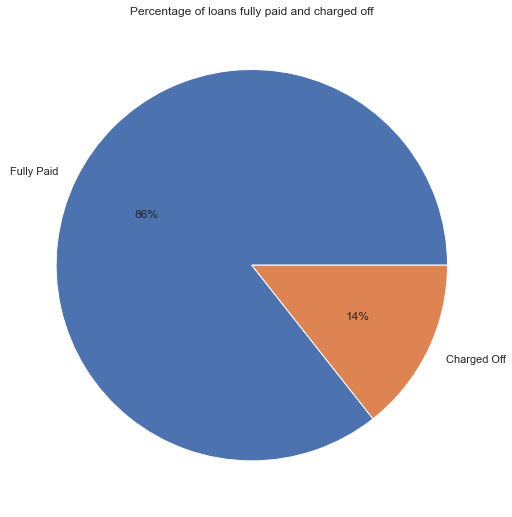

In [1713]:
from collections import Counter

fullypaid_percent = round(sum(loan.loan_status == 'Fully Paid')/len(loan) * 100, 2)
chargedoff_percent = round(sum(loan.loan_status == 'Charged Off')/len(loan) * 100, 2)

counts = Counter(loan.loan_status.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([fullypaid_percent, chargedoff_percent], labels=counts.keys(), autopct='%1.0f%%')
plt.title('Percentage of loans fully paid and charged off')

14.366294158148403
58664971


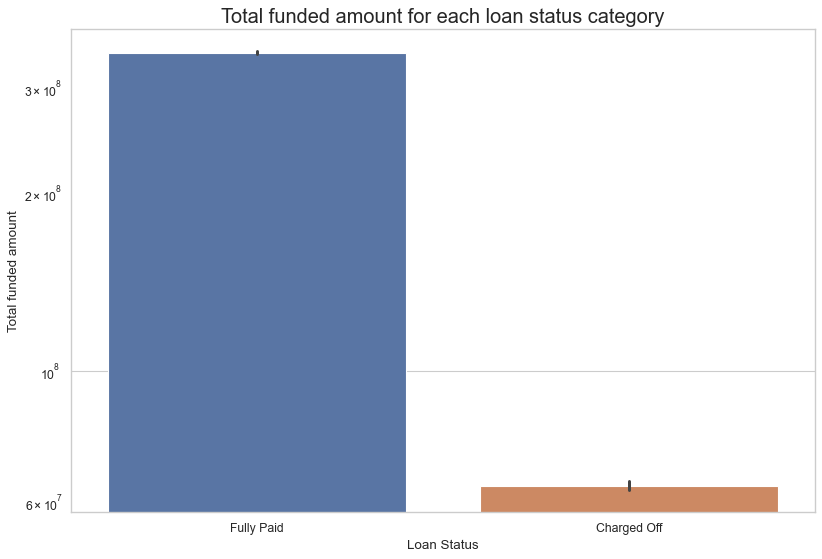

In [1714]:
print((loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan)))

tot_funded_amount = loan.funded_amnt.sum()
chargedoff_amount = tot_funded_amount * ((loan.loc[loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan))/100)
print(round(chargedoff_amount))

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='b')
p3=sns.barplot(x='loan_status', y='funded_amnt', data=loan,estimator=lambda x: sum(x))
p3.set(xlabel='Loan Status', ylabel='Total funded amount')
p3.set_title('Total funded amount for each loan status category',fontsize =18)
p3.set_yscale('log')
plt.show()

#### The above plots shows that 14% of the total loans have been charged-off which accounts for a loss of 15.67% of the total funded. The figure is quite big in the lending business.

Text(0.5, 1.0, 'Percentage of loan terms')

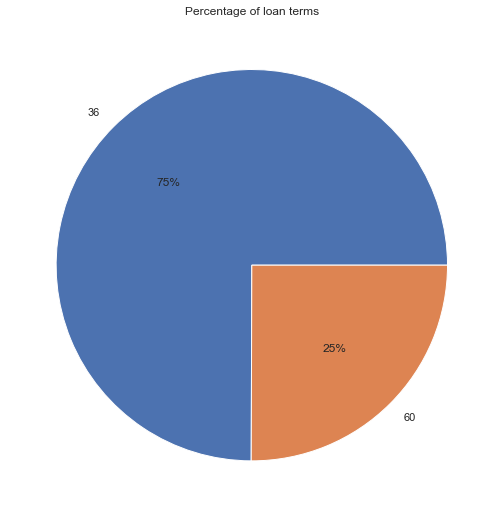

In [1715]:
term_36 = round(sum(loan.term == 36)/len(loan) * 100, 2)
term_60 = round(sum(loan.term == 60)/len(loan) * 100, 2)

counts = Counter(loan.term.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([term_36, term_60], labels=counts.keys(), autopct='%1.0f%%')
plt.title('Percentage of loan terms')

In [1716]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [1717]:
loan["grade"].value_counts()
#print(loan["home_ownership"].value_counts(), end='/n')
#print(loan["verification_status"].value_counts(), end='/n')
#print(loan["emp_length"].value_counts(), end='/n')

B    11450
A     9897
C     7612
D     4945
E     2610
F      955
G      293
Name: grade, dtype: int64

Text(0.5, 1.0, 'Percentage of loans for each grade')

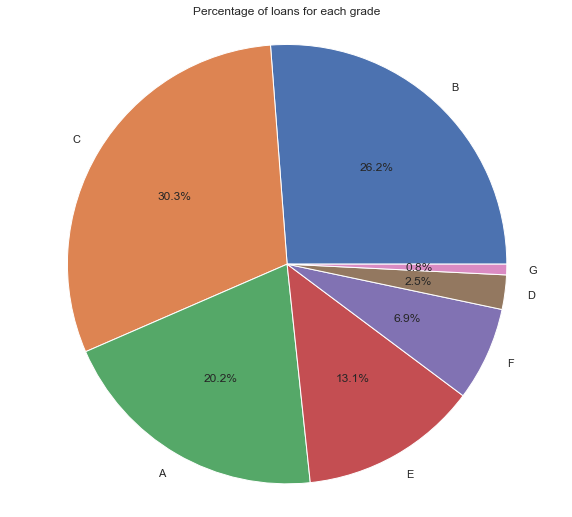

In [1718]:
grade_A = round(sum(loan.grade == 'A')/len(loan) * 100, 2)
grade_B = round(sum(loan.grade == 'B')/len(loan) * 100, 2)
grade_C = round(sum(loan.grade == 'C')/len(loan) * 100, 2)
grade_D = round(sum(loan.grade == 'D')/len(loan) * 100, 2)
grade_E = round(sum(loan.grade == 'E')/len(loan) * 100, 2)
grade_F = round(sum(loan.grade == 'F')/len(loan) * 100, 2)
grade_G = round(sum(loan.grade == 'G')/len(loan) * 100, 2)

counts = Counter(loan.grade.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([grade_A, grade_B, grade_C, grade_D, grade_E, grade_F, grade_G], labels=counts.keys(), autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of loans for each grade')

#### Grade A ==> lower risk of getting charged off
#### Grade G ==> higher risk of getting charged off

In [1719]:
loan.emp_length.unique()

array(['More than 10', 'Less than 1', '3', '8', '9', '4', '5', '1', '6',
       '2', '7', 'Others'], dtype=object)

Text(0.5, 1.0, 'Percentage of loans for each employee length category')

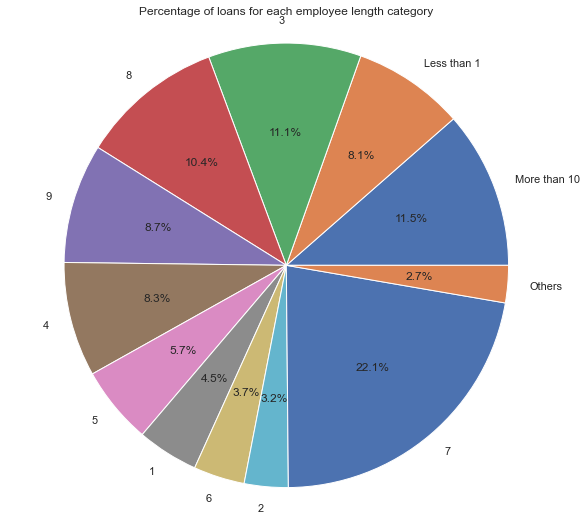

In [1720]:
empLen_less1 = round(sum(loan.emp_length == 'Less than 1')/len(loan) * 100, 2)
empLen_1 = round(sum(loan.emp_length == '1')/len(loan) * 100, 2)
empLen_2 = round(sum(loan.emp_length == '2')/len(loan) * 100, 2)
empLen_3 = round(sum(loan.emp_length == '3')/len(loan) * 100, 2)
empLen_4 = round(sum(loan.emp_length == '4')/len(loan) * 100, 2)
empLen_5 = round(sum(loan.emp_length == '5')/len(loan) * 100, 2)
empLen_6 = round(sum(loan.emp_length == '6')/len(loan) * 100, 2)
empLen_7 = round(sum(loan.emp_length == '7')/len(loan) * 100, 2)
empLen_8 = round(sum(loan.emp_length == '8')/len(loan) * 100, 2)
empLen_9 = round(sum(loan.emp_length == '9')/len(loan) * 100, 2)
empLen_more10 = round(sum(loan.emp_length == 'More than 10')/len(loan) * 100, 2)
empLen_others = round(sum(loan.emp_length == 'Others')/len(loan) * 100, 2)

counts = Counter(loan.emp_length.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([empLen_less1, empLen_1, empLen_2, empLen_3, empLen_4, empLen_5, empLen_6, empLen_7, empLen_8, empLen_9, empLen_more10, empLen_others], labels=counts.keys(), autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of loans for each employee length category')

In [1721]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

Text(0.5, 1.0, 'Percentage of loans for each home ownership category')

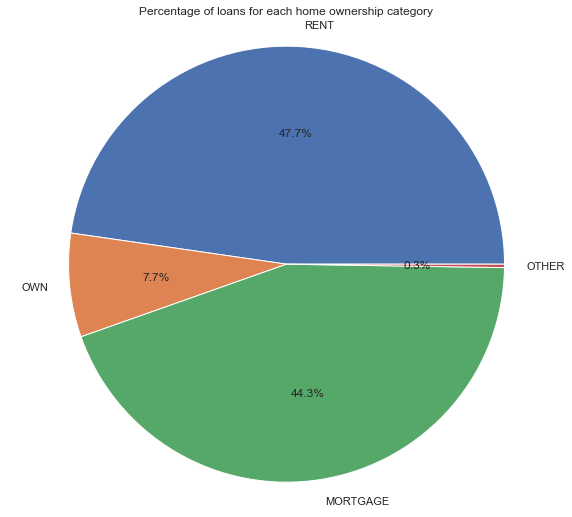

In [1722]:
rent = round(sum(loan.home_ownership == 'RENT')/len(loan) * 100, 2)
own = round(sum(loan.home_ownership == 'OWN')/len(loan) * 100, 2)
mortgage = round(sum(loan.home_ownership == 'MORTGAGE')/len(loan) * 100, 2)
other = round(sum(loan.home_ownership == 'OTHER')/len(loan) * 100, 2)

counts = Counter(loan.home_ownership.unique())
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
plt.pie([rent, own, mortgage, other], labels=counts.keys(), autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of loans for each home ownership category')

#### From the above pie chart, we can see that majority of loans were taken for rent and mortagage home ownership.

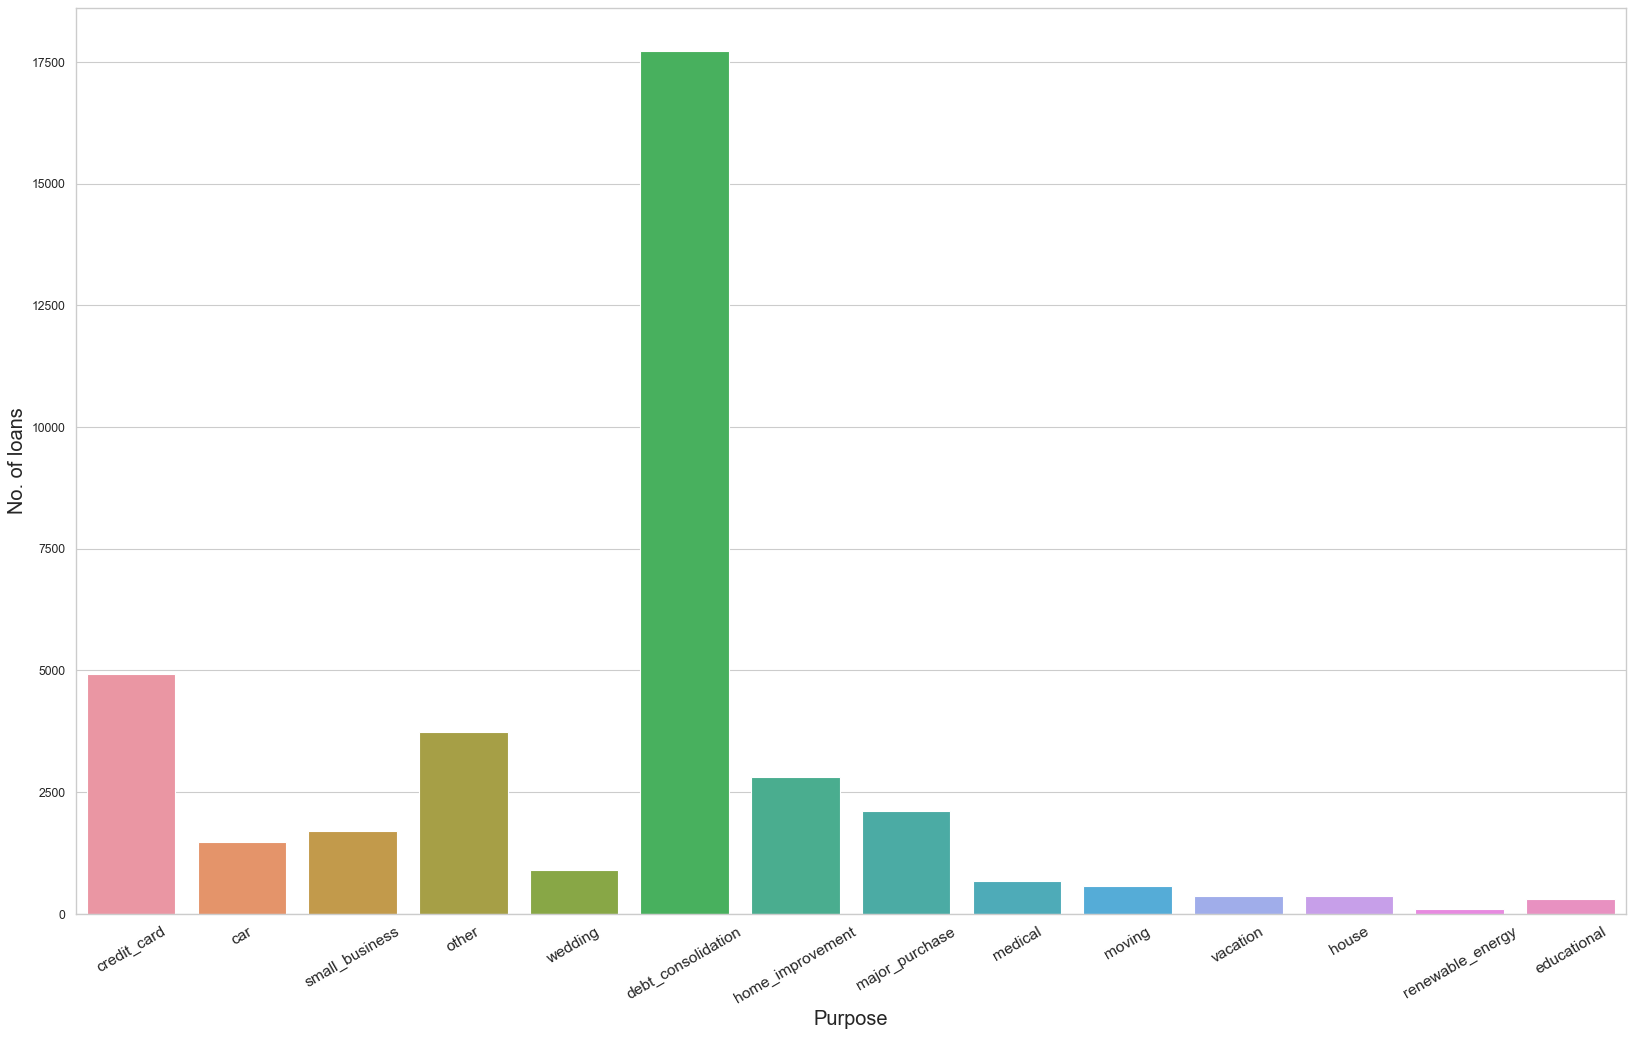

In [1723]:
#count plot for purpose column
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="purpose")
cplt.set_xlabel('Purpose', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

#### From the above plot, we can conclude that majority of loan were taken for debt consolidation.

In [1724]:
loan.loan_amnt.describe()

count    37762.000000
mean     11080.126185
std       7362.459495
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

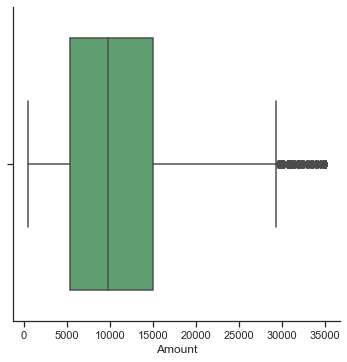

In [1725]:
sns.set_theme(style="ticks", palette=['g','r'])
sns.color_palette("Spectral", as_cmap=True)
with sns.axes_style(style='ticks'):
    g = sns.factorplot("loan_amnt", data=loan, kind="box")
    g.set_axis_labels("Amount");
    #g.set_xticklabels(rotation=30)

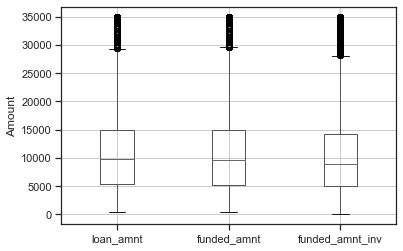

In [1726]:
loan.boxplot(column=["loan_amnt", "funded_amnt", "funded_amnt_inv" ] )
plt.ylabel('Amount')
plt.show()

The above box plots shows that the applied amount by consumers and the amount provided by lending club is almost equal. The first impression says that even though there are 14% loans being default, not much research is done while providing the loan.
The plots also shows that most of the loan amount applied and the funded amount lies in between 5000 to 15000.
The box plots also shows that there are many outliers. However it is not necessary to remove outliers in this analysis.

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

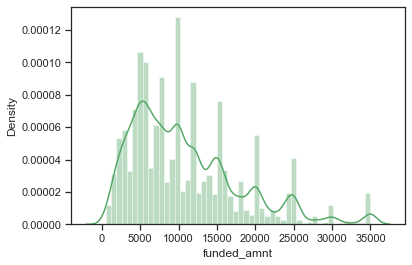

In [1727]:
#checking distrbution of funded amount
sns.distplot(loan.funded_amnt)

In [1728]:
loan.annual_inc.describe()

count    3.776200e+04
mean     6.883396e+04
std      6.360965e+04
min      4.000000e+03
25%      4.028175e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

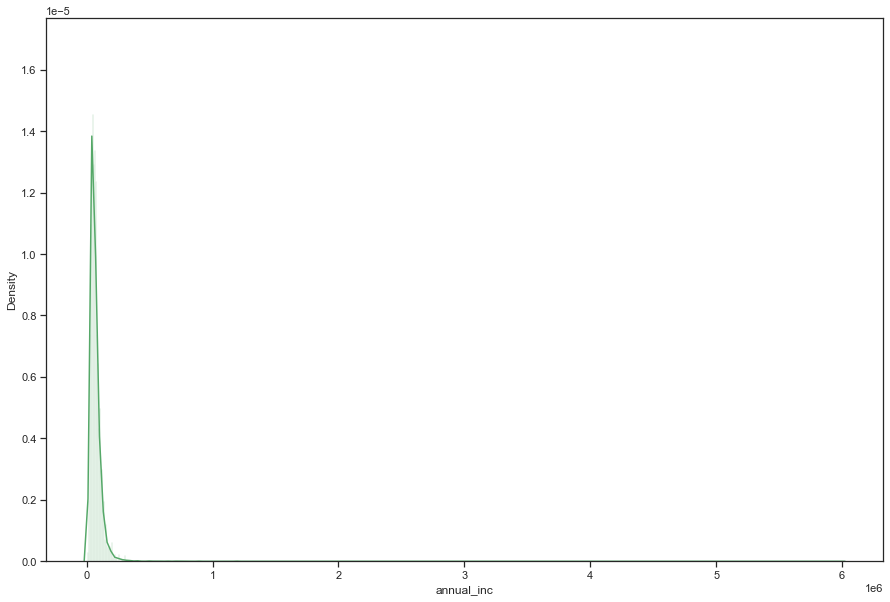

In [1729]:
# univariate analysis of annual income column
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.distplot(loan['annual_inc'], color='g', bins=1000)
#plt.yscale('log')
plt.show()

From the above graph, we can conclude that the annual income of most of the applied member are below 500000.
Now lets plot a bar graph with each bucket of 50000 and check the distribution.

## Segmented Univariate analysis

### Now lets do some segmented univariate analysis to check if we get some insights w.r.t consumer attributes and loan attributes.
Note: Our target variable is 'loan_status' which we will be considering for every segmented univariate analysis

Lets plot segmented univariate analysis for  

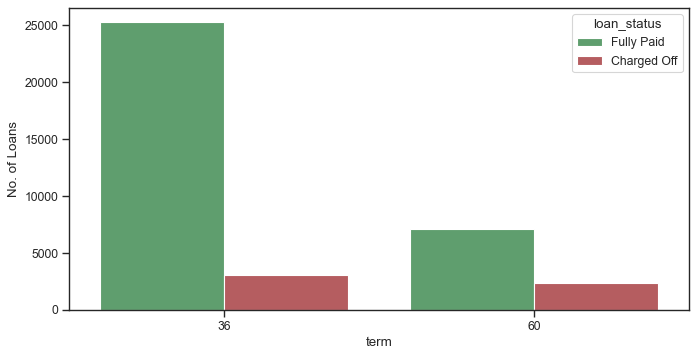

In [1730]:
#count plot for loan status
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='b')
cplt= sns.countplot(data=loan, x="term", hue="loan_status")
cplt.set(xlabel='term', ylabel='No. of Loans')
plt.show()


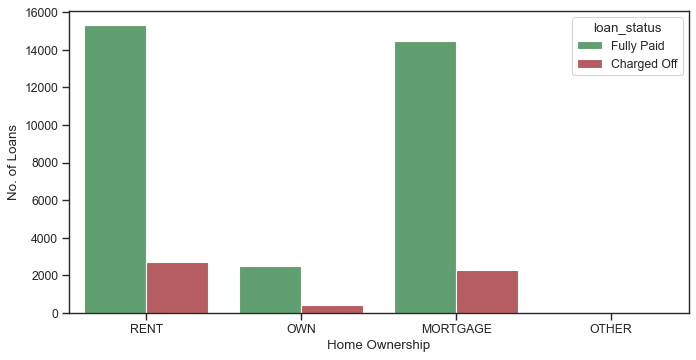

In [1731]:
#count plot for loan status
plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
cplt= sns.countplot(data=loan, x="home_ownership", hue="loan_status")
cplt.set(xlabel='Home Ownership', ylabel='No. of Loans')
plt.show()

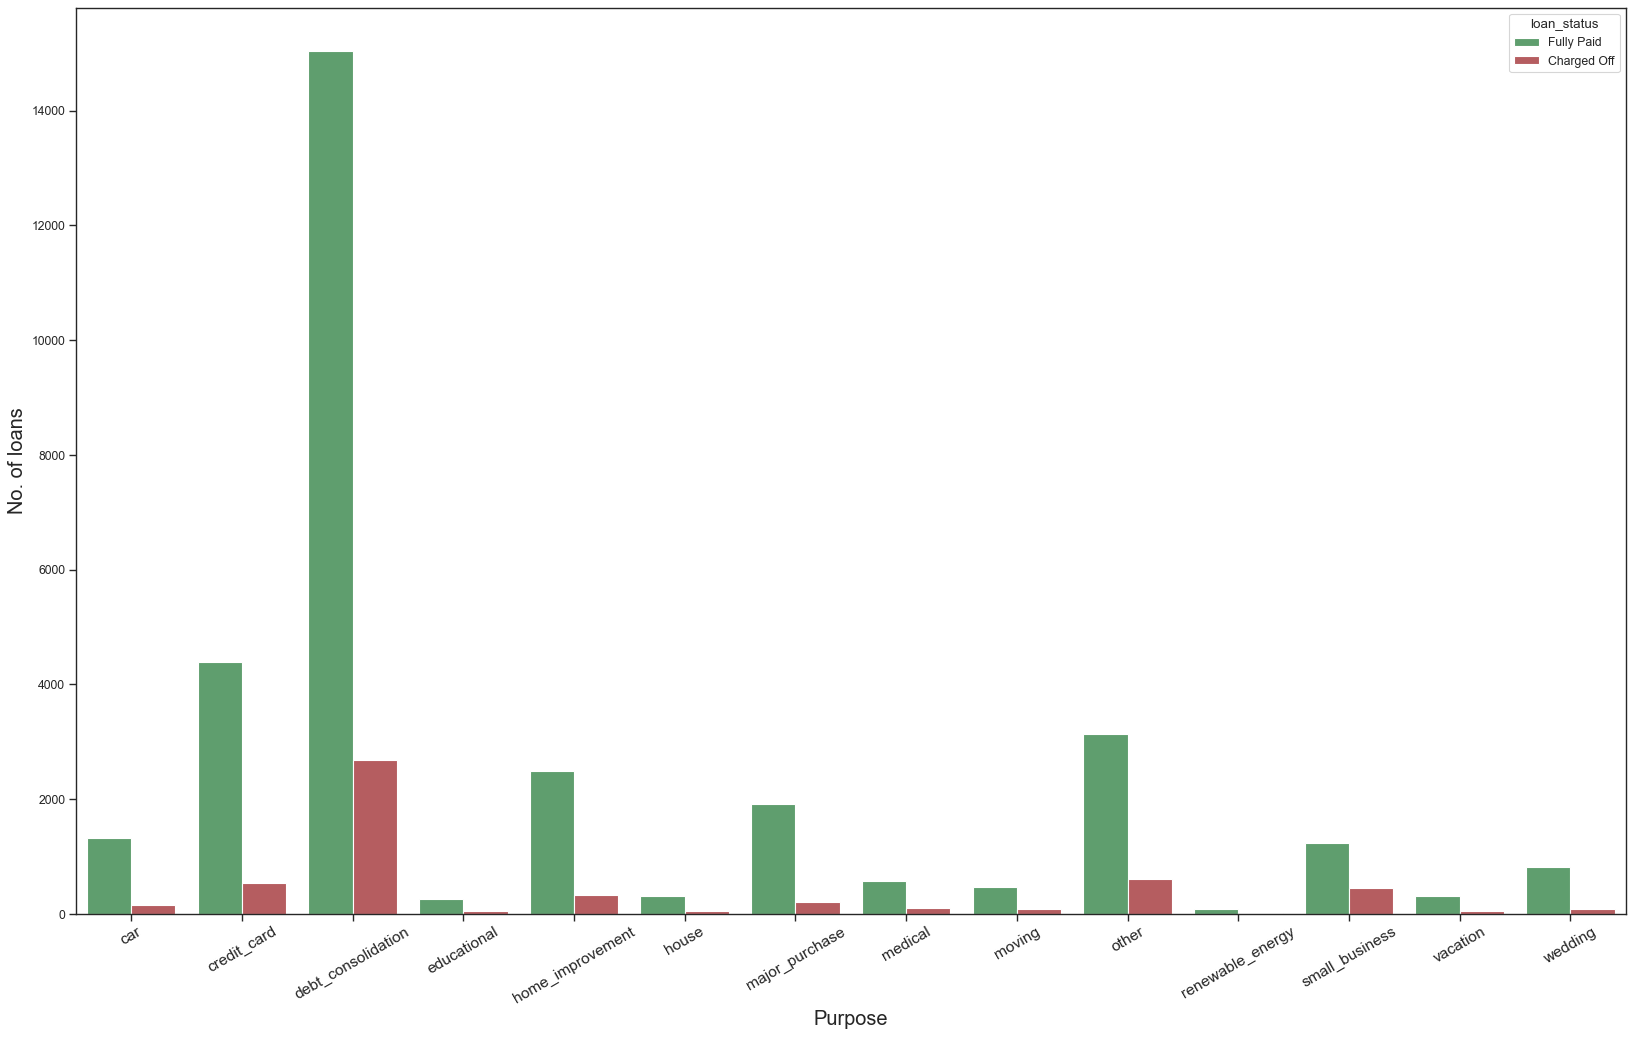

In [1732]:
#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="purpose", hue="loan_status", order=sorted(loan.purpose.unique()))
cplt.set_xlabel('Purpose', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

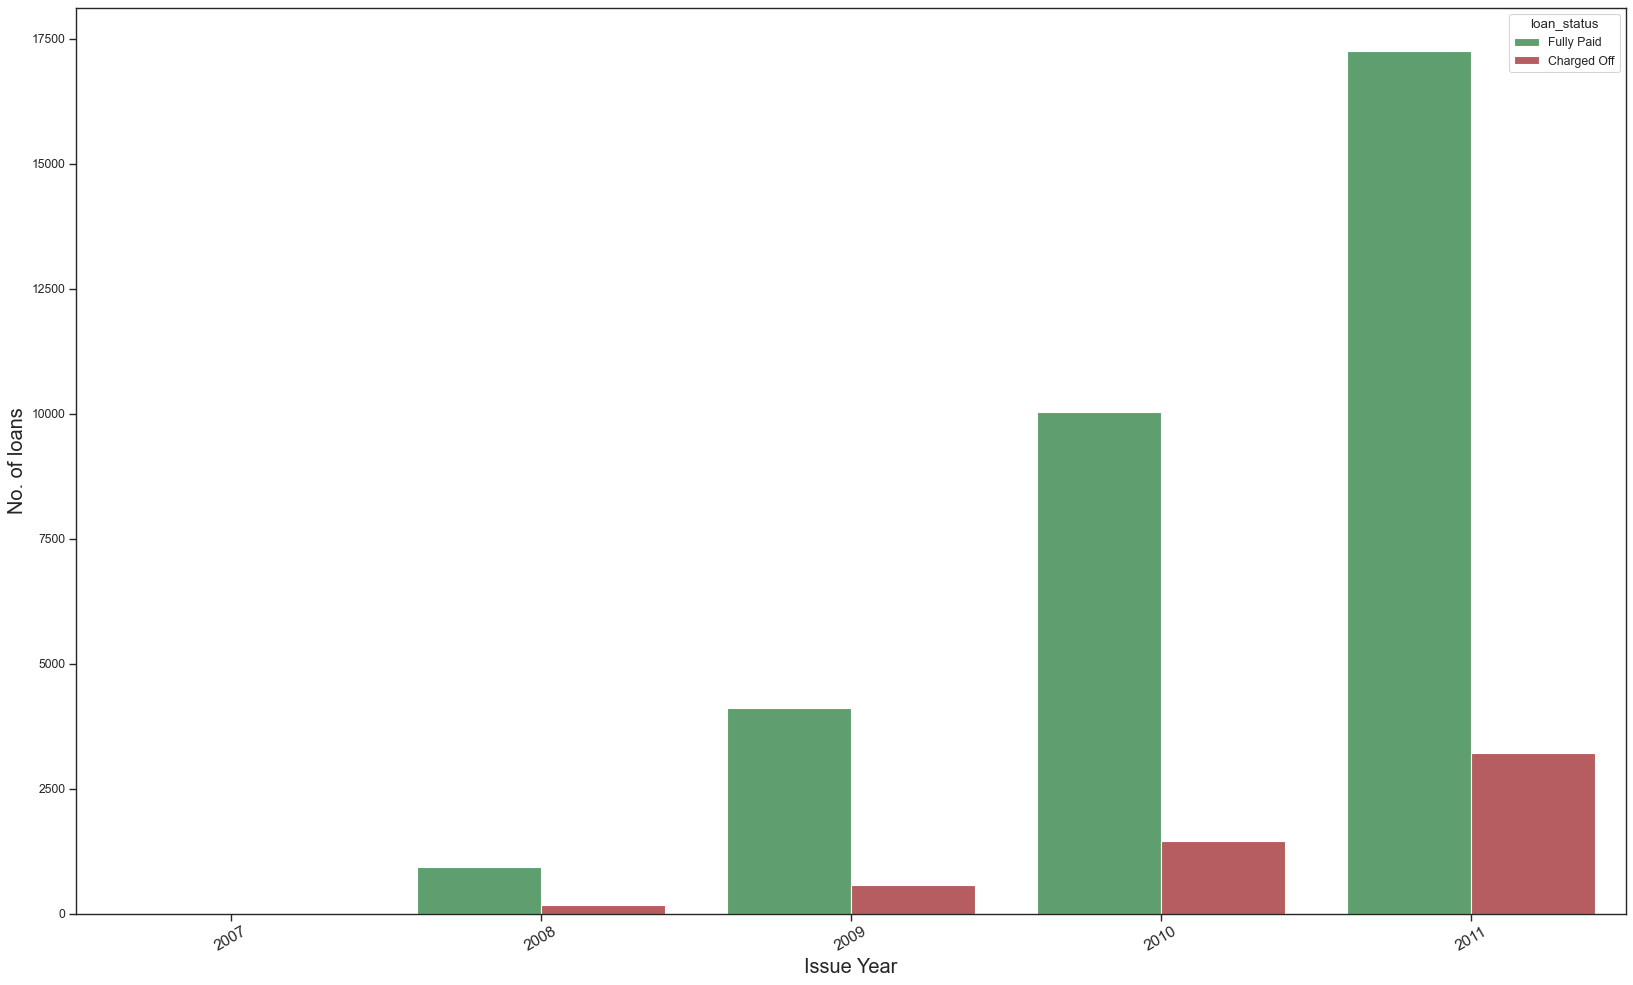

In [1733]:
#count plot for issue_yr
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="issue_yr", hue="loan_status", order=sorted(loan.issue_yr.unique()))
cplt.set_xlabel('Issue Year', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

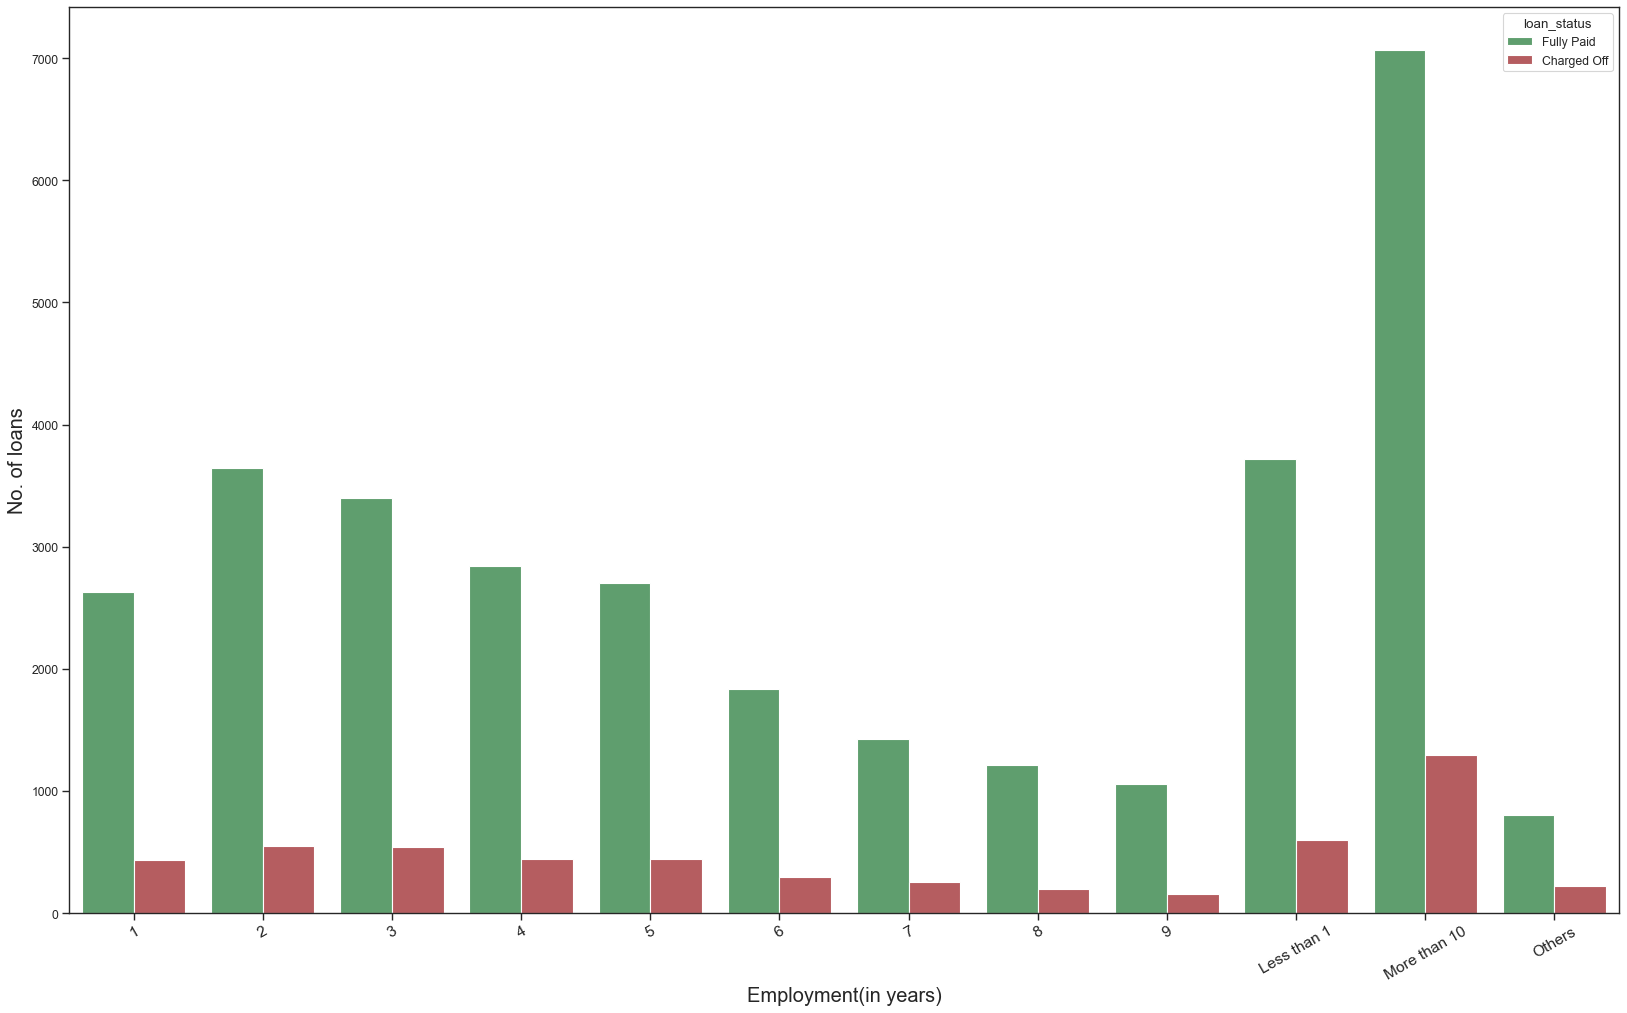

In [1734]:
#count plot for issue_yr
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="emp_length", hue="loan_status", order=sorted(loan.emp_length.unique()))
cplt.set_xlabel('Employment(in years)', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

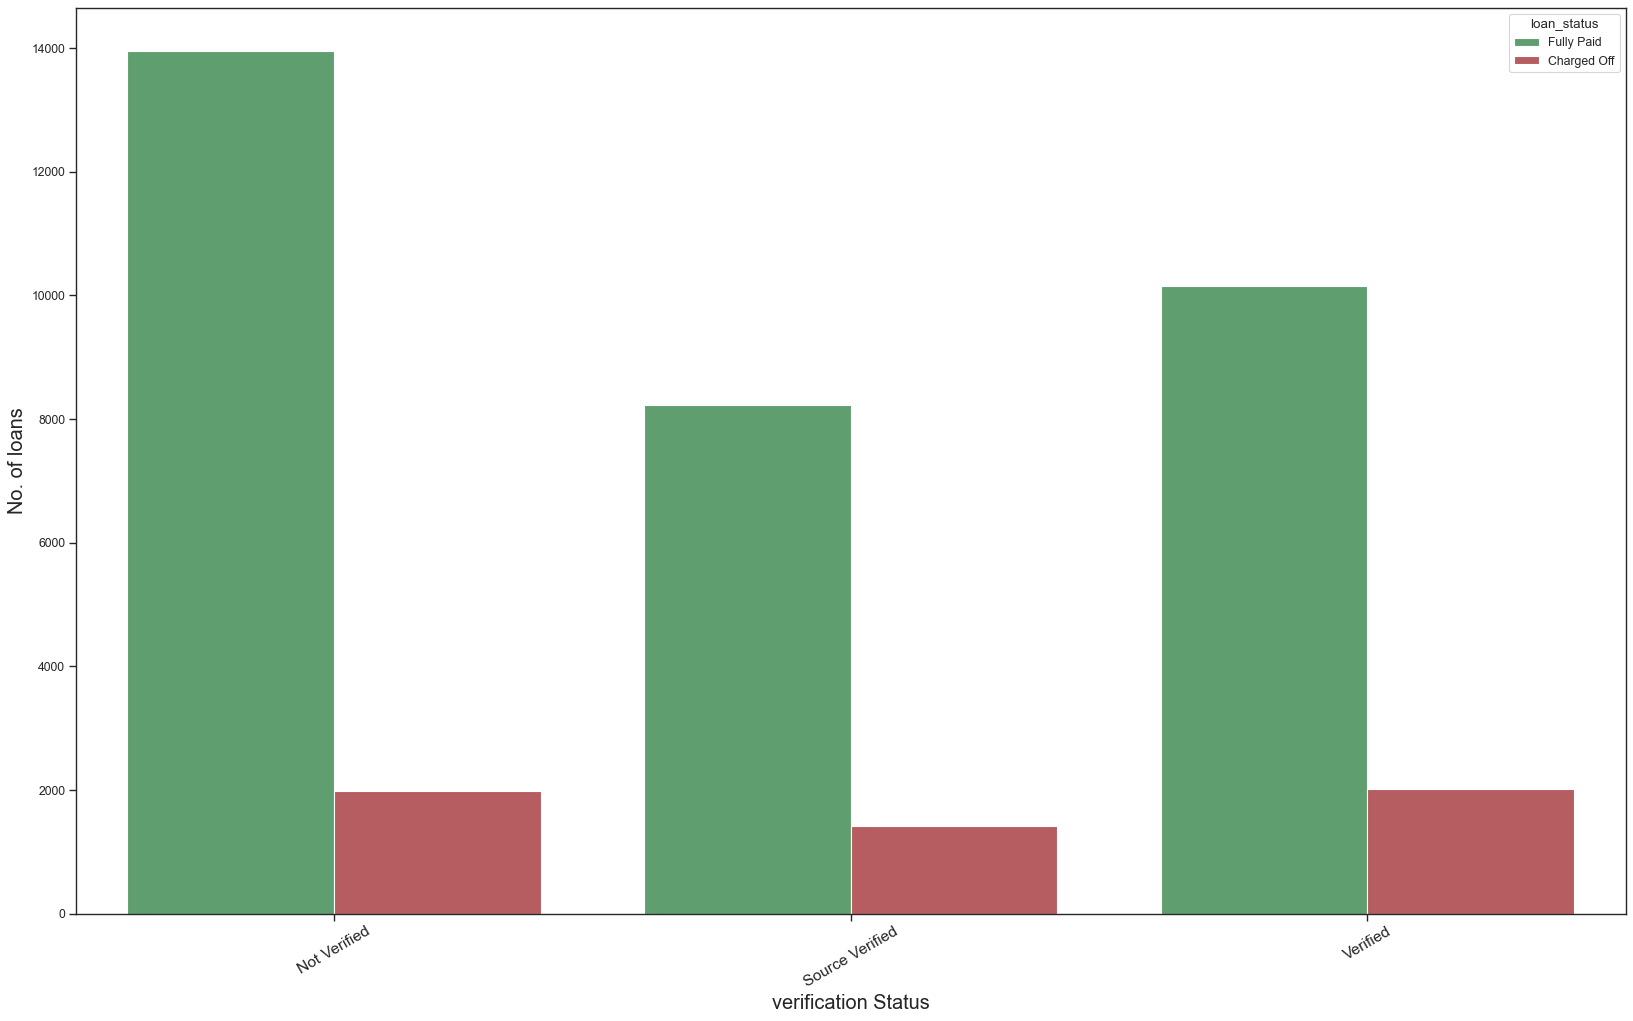

In [1735]:
#count plot for issue_yr
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="verification_status", hue="loan_status", order=sorted(loan.verification_status.unique()))
cplt.set_xlabel('verification Status', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1736]:
loan.grade.value_counts()

B    11450
A     9897
C     7612
D     4945
E     2610
F      955
G      293
Name: grade, dtype: int64

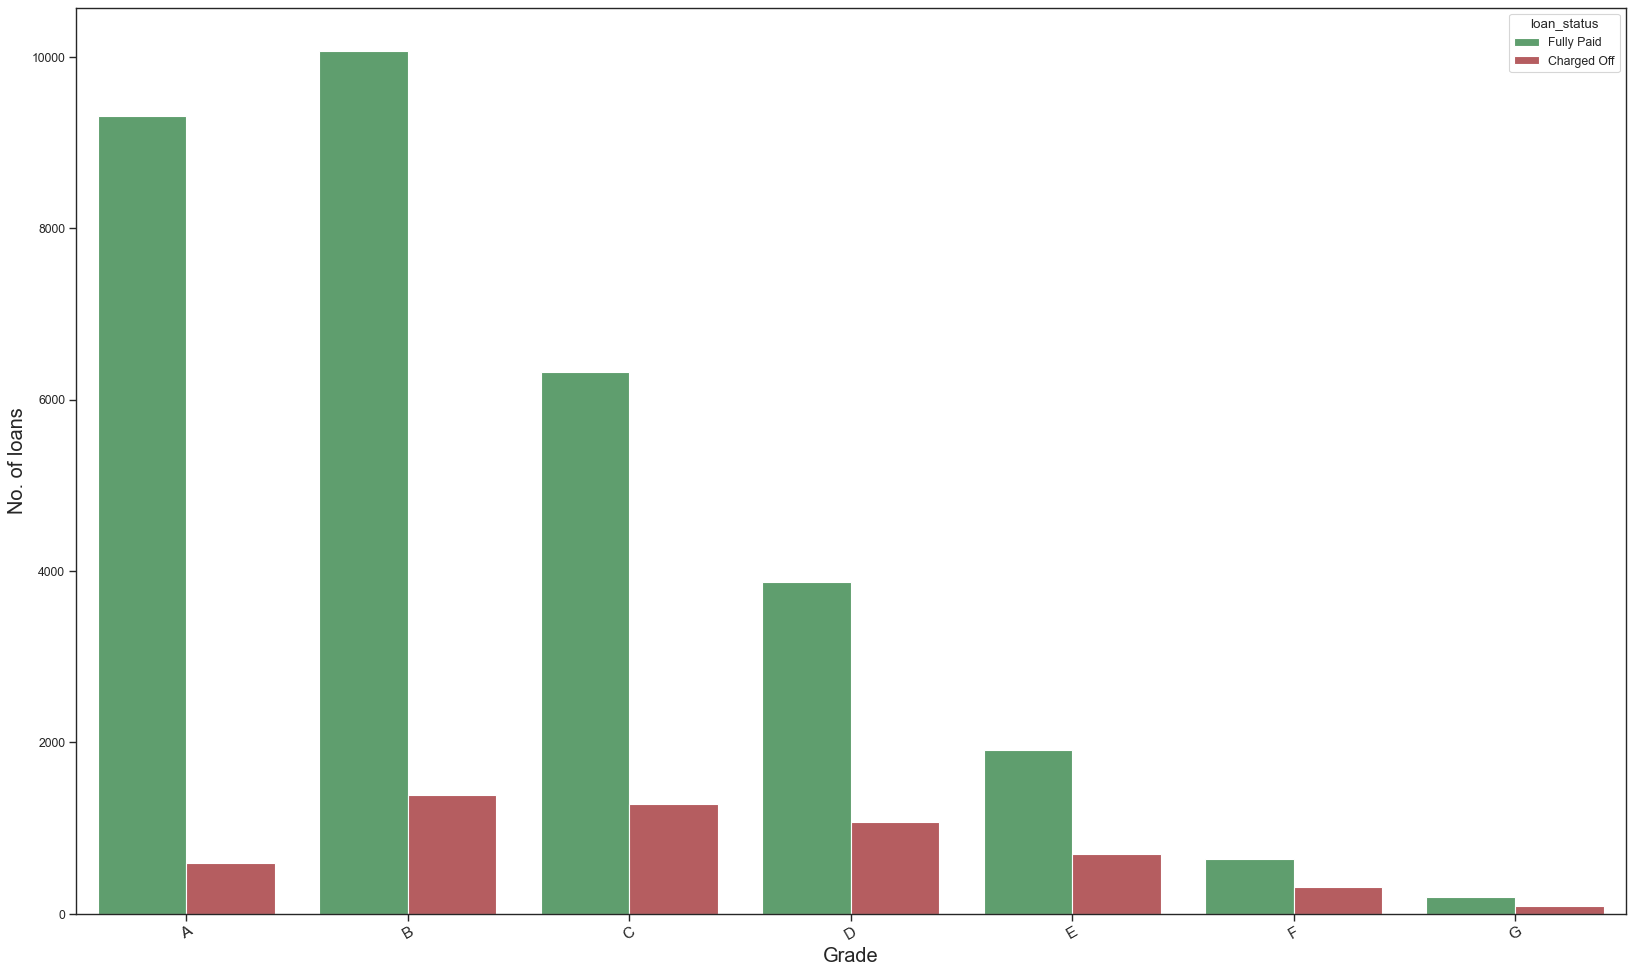

In [1737]:
#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="grade", hue="loan_status", order=sorted(loan.grade.unique()))
cplt.set_xlabel('Grade', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1786]:
# This function plots a distribution of target column, and its boxplot against loan_status column
def plot_dist_box(df, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)
    plt.show()

#### Lets plots some distribution plot of particular column along with its box plot

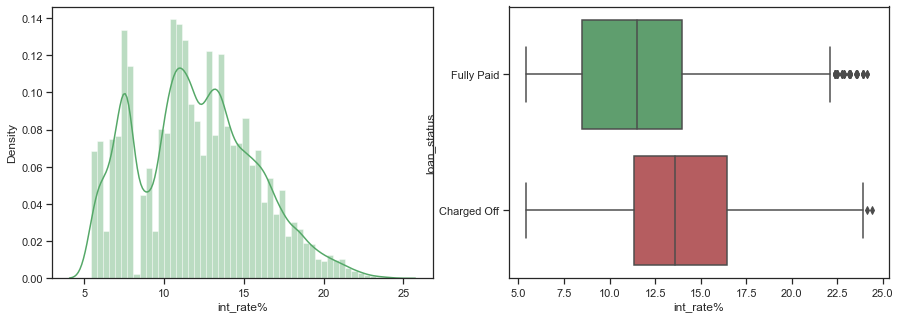

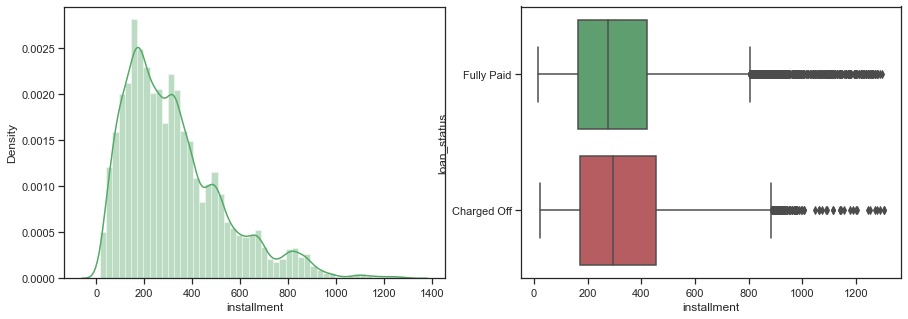

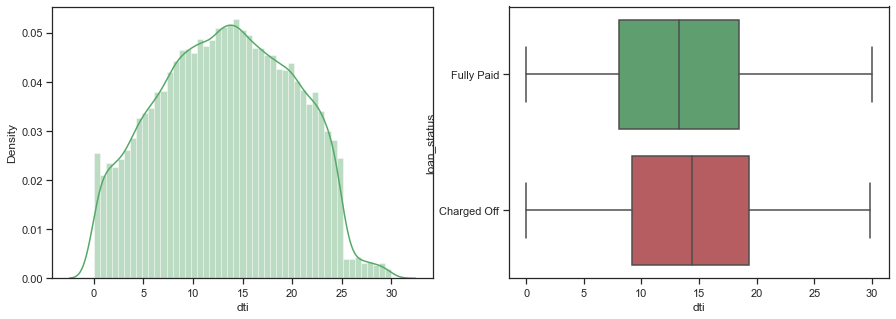

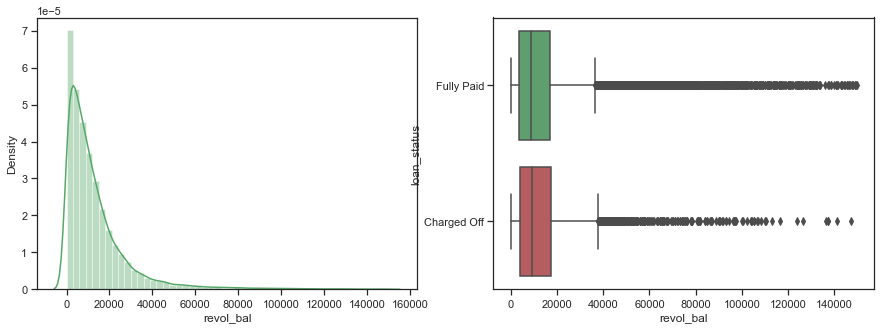

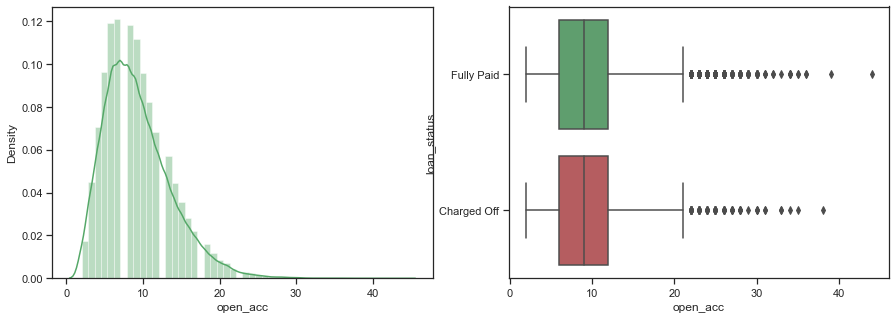

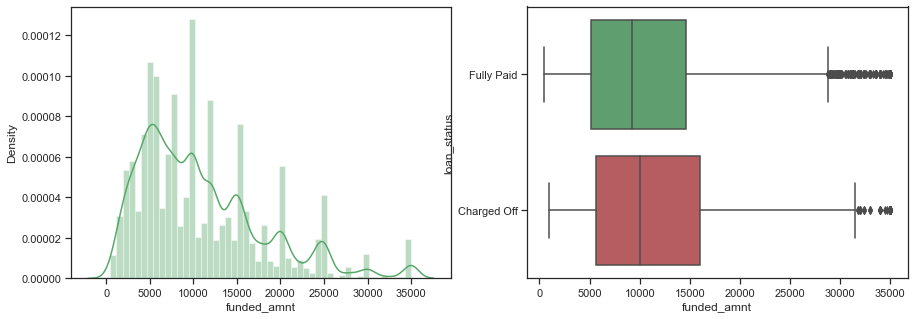

In [1787]:
# Lets plots some distribution plot of particular column along with its box plot
plot_dist_box(loan, 'int_rate%')
plot_dist_box(loan, 'installment')
plot_dist_box(loan, 'dti')
plot_dist_box(loan, 'revol_bal')
plot_dist_box(loan, 'open_acc')
plot_dist_box(loan, 'funded_amnt')

#### Now lets do segmented univariate analysis by converting numerical variables to categorical variables by creating buckets which will give a more clear understanding

In [1763]:
#ax = loan.boxplot(column='annual_inc', by='term')
#ax.set(xlabel='Term', ylabel='Annual income of customer')
#plt.yscale('log')
#plt.show()

#ax = loan.boxplot(column='annual_inc', by='loan_status')
#ax.set(xlabel='Loan Status', ylabel='Annual income of customer')
#plt.yscale('log')
#plt.show()



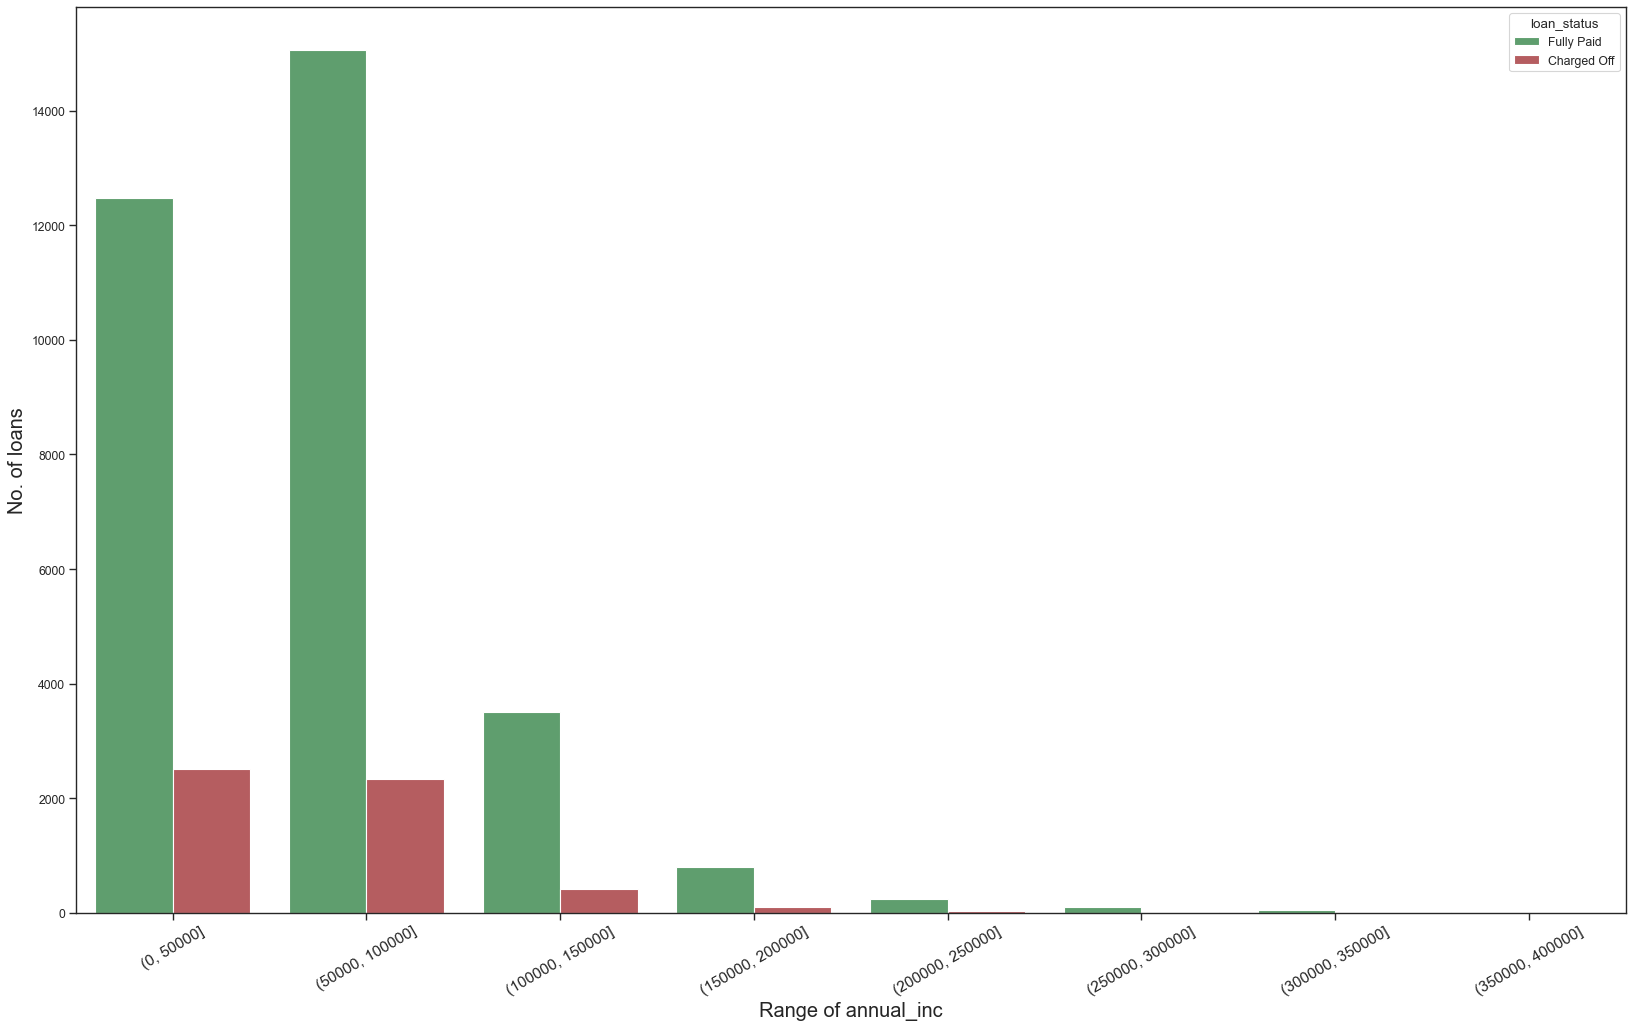

In [1764]:
#Creating an categorical variable to handle with the annual income of cumstomers

interval = (0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000)

loan["annual_inc_cat"] = pd.cut(loan.annual_inc, interval)

#count plot for annual income
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="annual_inc_cat", hue='loan_status')
cplt.set_xlabel('Range of annual_inc', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

#### Most of the customers have annual income in the range [50000-100000] followed by [0-50000]

In [1765]:
loan['int_rate%'].describe()

count    37762.000000
mean        11.947821
std          3.709213
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate%, dtype: float64

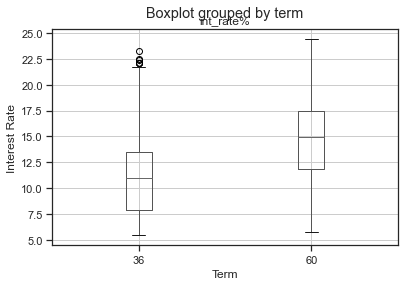

In [1766]:
#ax = loan.boxplot(column='int_rate%', by='term')
#ax.set(xlabel='Term', ylabel='Interest Rate')
#plt.show()

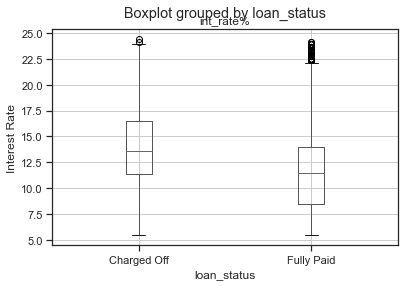

In [1767]:
#ax = loan.boxplot(column='int_rate%', by='loan_status')
#ax.set(xlabel='loan_status', ylabel='Interest Rate')
#plt.show()

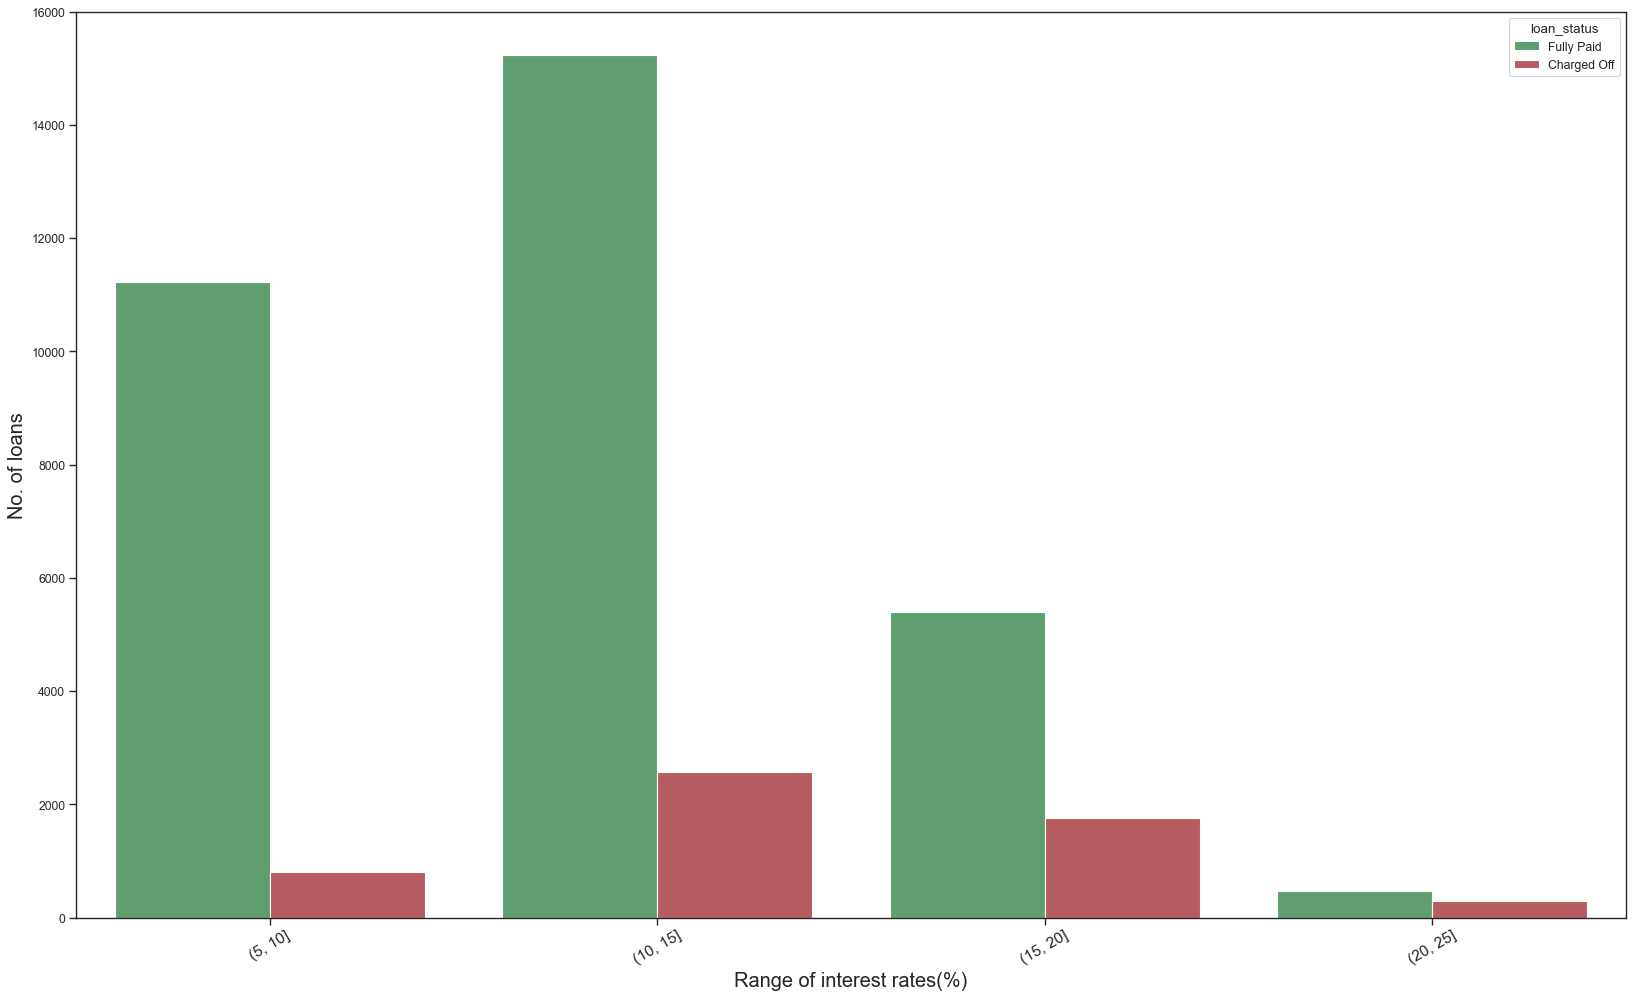

In [1768]:
#count plot for interest rate

#Creating an categorical variable to handle with the interest rate

interval = (5, 10, 15, 20, 25)
labels=['5-10','10-15','15-20','20-25']

loan["int_rate_cat"] = pd.cut(loan['int_rate%'], interval, labels)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="int_rate_cat", hue="loan_status")
cplt.set_xlabel('Range of interest rates(%)', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1769]:
loan.funded_amnt.describe()

count    37762.000000
mean     10813.819448
std       7101.077649
min        500.000000
25%       5231.250000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

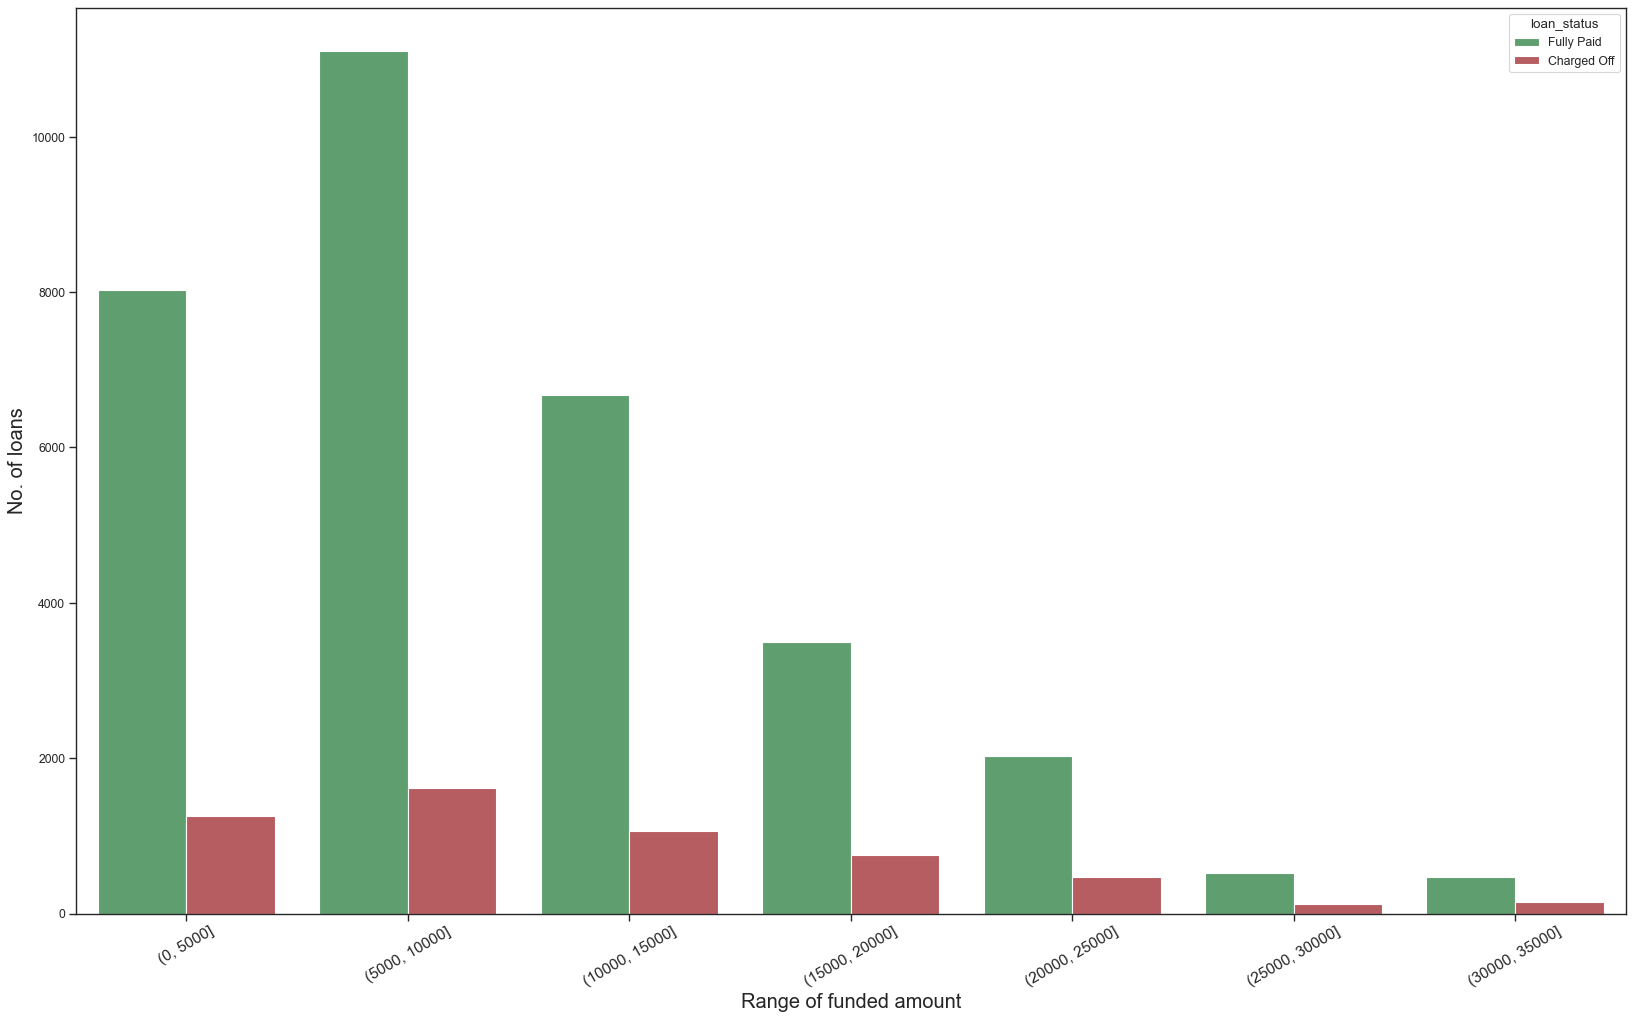

In [1770]:
#Creating an categorical variable to handle with the funded amount

interval = (0, 5000, 10000, 15000, 20000, 25000, 30000, 35000)
labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000', '25000-30000', '30000-35000']

loan["funded_amnt_cat"] = pd.cut(loan.funded_amnt, interval,labels)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="funded_amnt_cat", hue="loan_status")
cplt.set_xlabel('Range of funded amount', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1771]:
loan.dti.describe()

count    37762.000000
mean        13.323378
std          6.661968
min          0.000000
25%          8.192500
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [1772]:
#ax = loan.boxplot(column='dti', by='term')
#ax.set(xlabel='Term', ylabel='Debt to interest ratio')
#plt.show()

In [1773]:
#ax = loan.boxplot(column='dti', by='loan_status')
#ax.set(xlabel='Term', ylabel='Debt to interest ratio')
#plt.show()

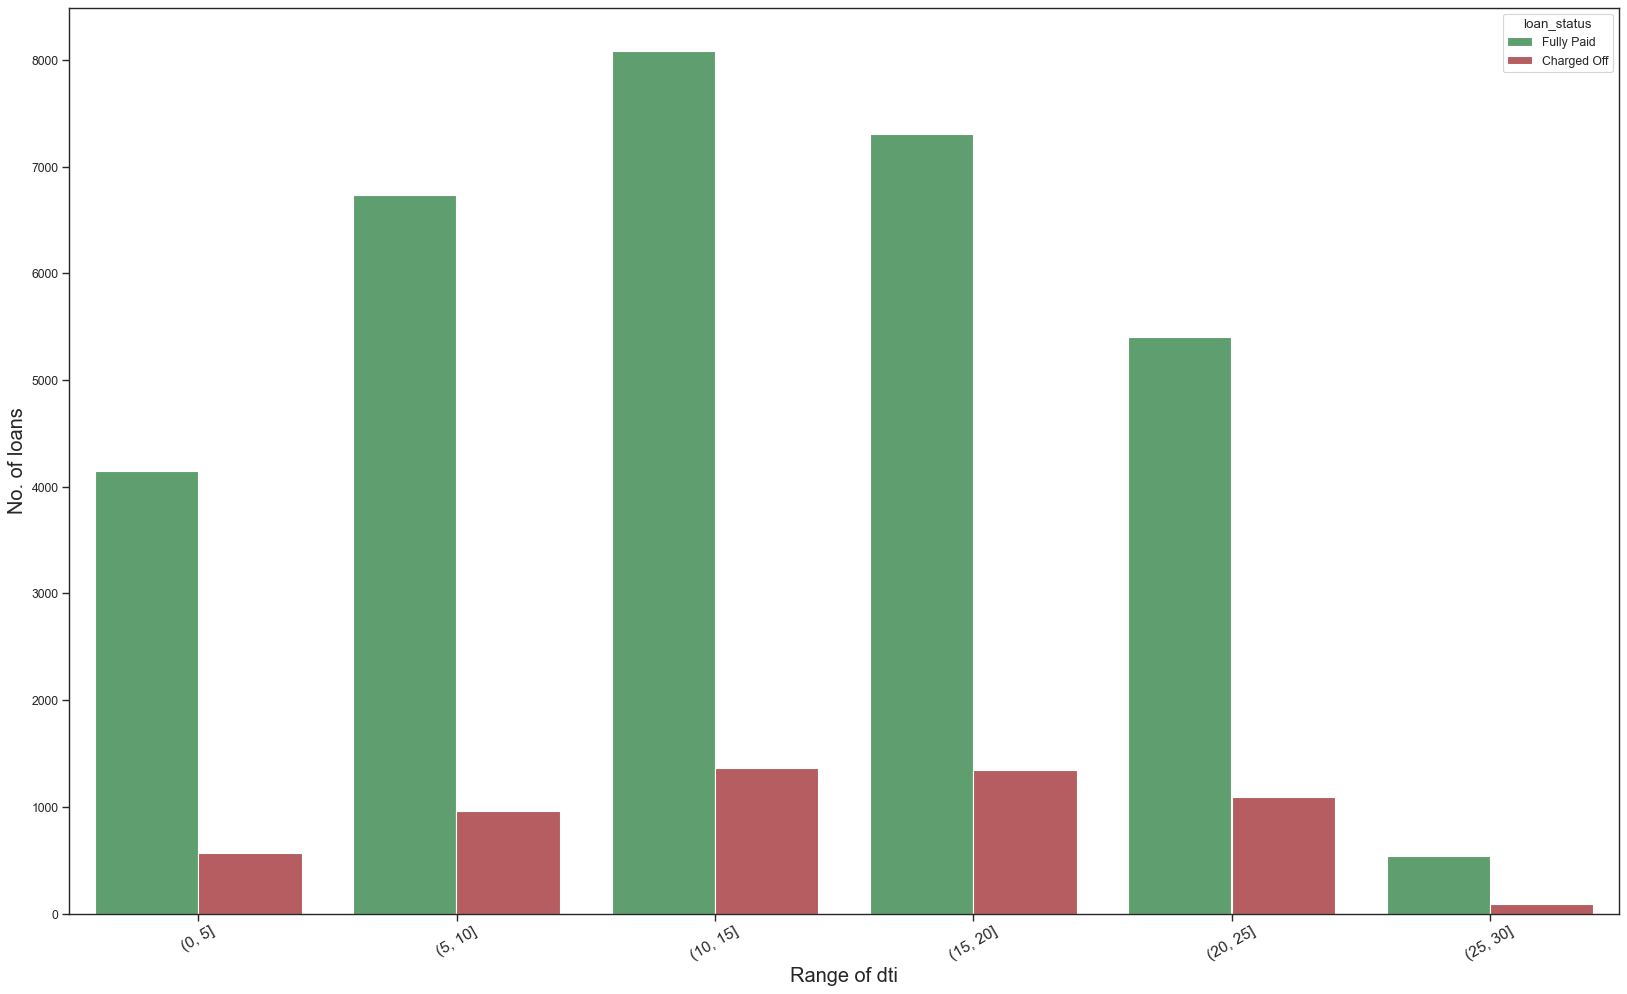

In [1774]:
#Creating an categorical variable to handle with the dti
#lower the dti, lower the risk of default

interval = [0, 5, 10, 15, 20, 25, 30]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30']

loan["dti_cat"] = pd.cut(loan.dti, interval,labels)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="dti_cat", hue="loan_status")
cplt.set_xlabel('Range of dti', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1775]:
loan.open_acc.describe()

count    37762.000000
mean         9.282798
std          4.382016
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [1776]:
#ax = loan.boxplot(column='open_acc', by='term')
#ax.set(xlabel='Term', ylabel='Existing loan accounts')
#plt.show()

In [1777]:
#ax = loan.boxplot(column='open_acc', by='loan_status')
#ax.set(xlabel='Loan Status', ylabel='Existing loan accounts')
#plt.show()

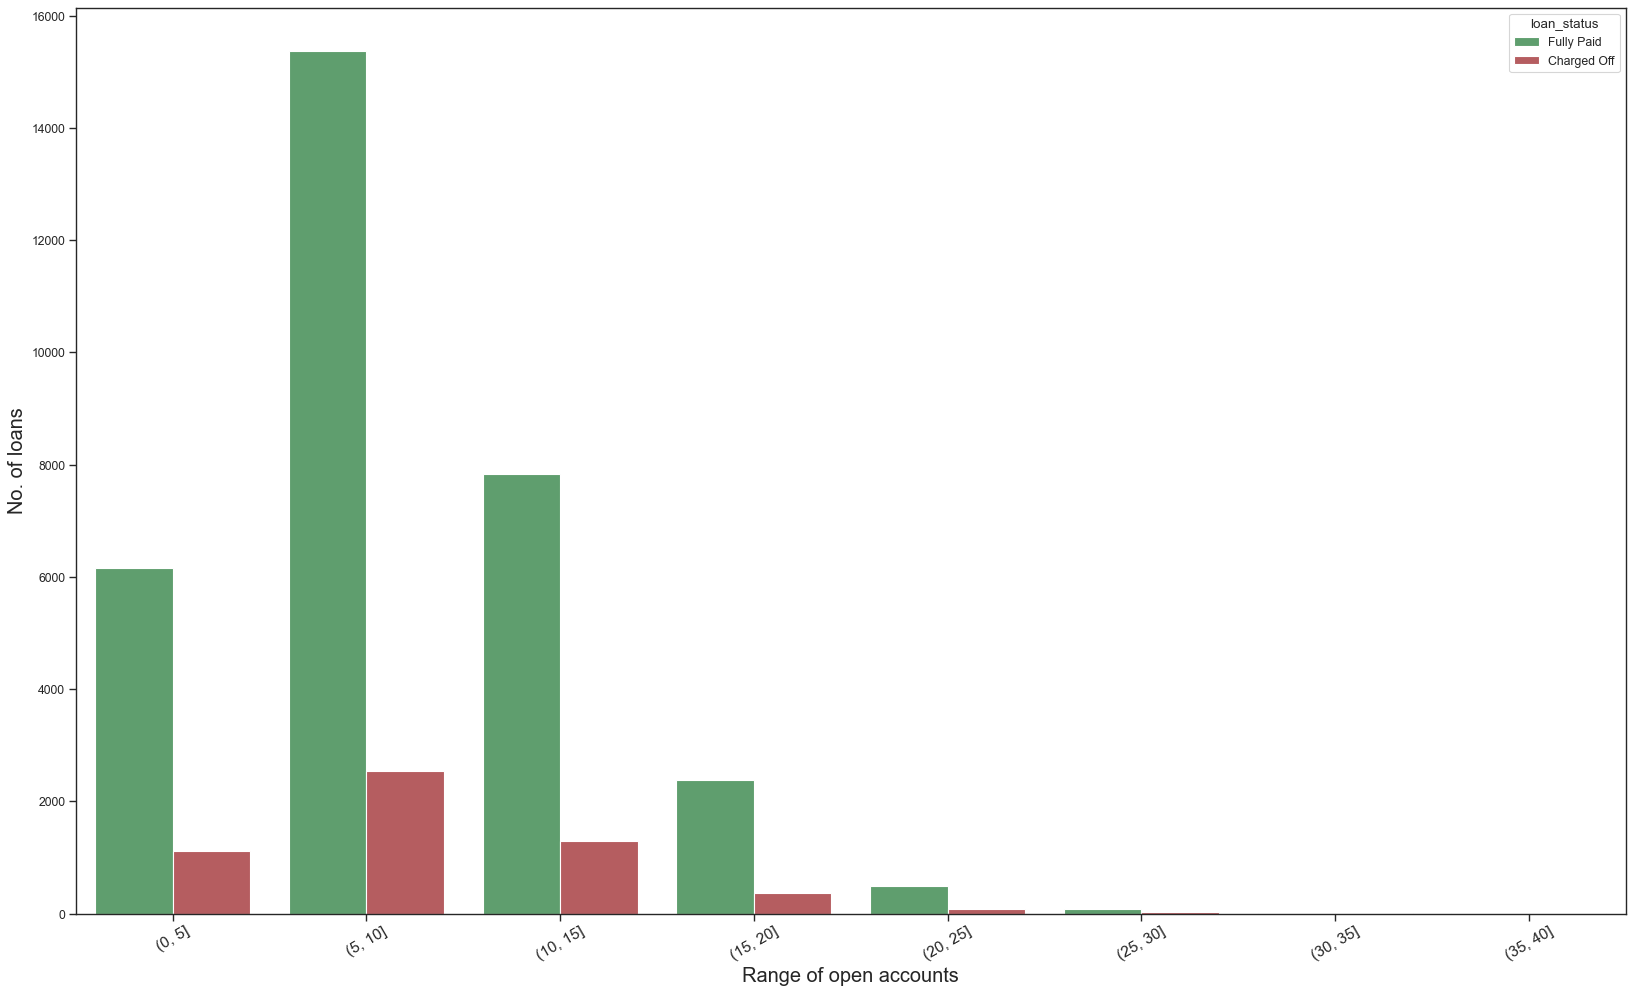

In [1778]:
#Creating an categorical variable to handle with the open_acc
#Open account => no. of existing loans
# higher the open_acc, higher the risk for default

interval = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40']

loan["open_acc_cat"] = pd.cut(loan.open_acc, interval,labels)

#count plot for loan open accounts
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="open_acc_cat", hue="loan_status")
cplt.set_xlabel('Range of open accounts', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

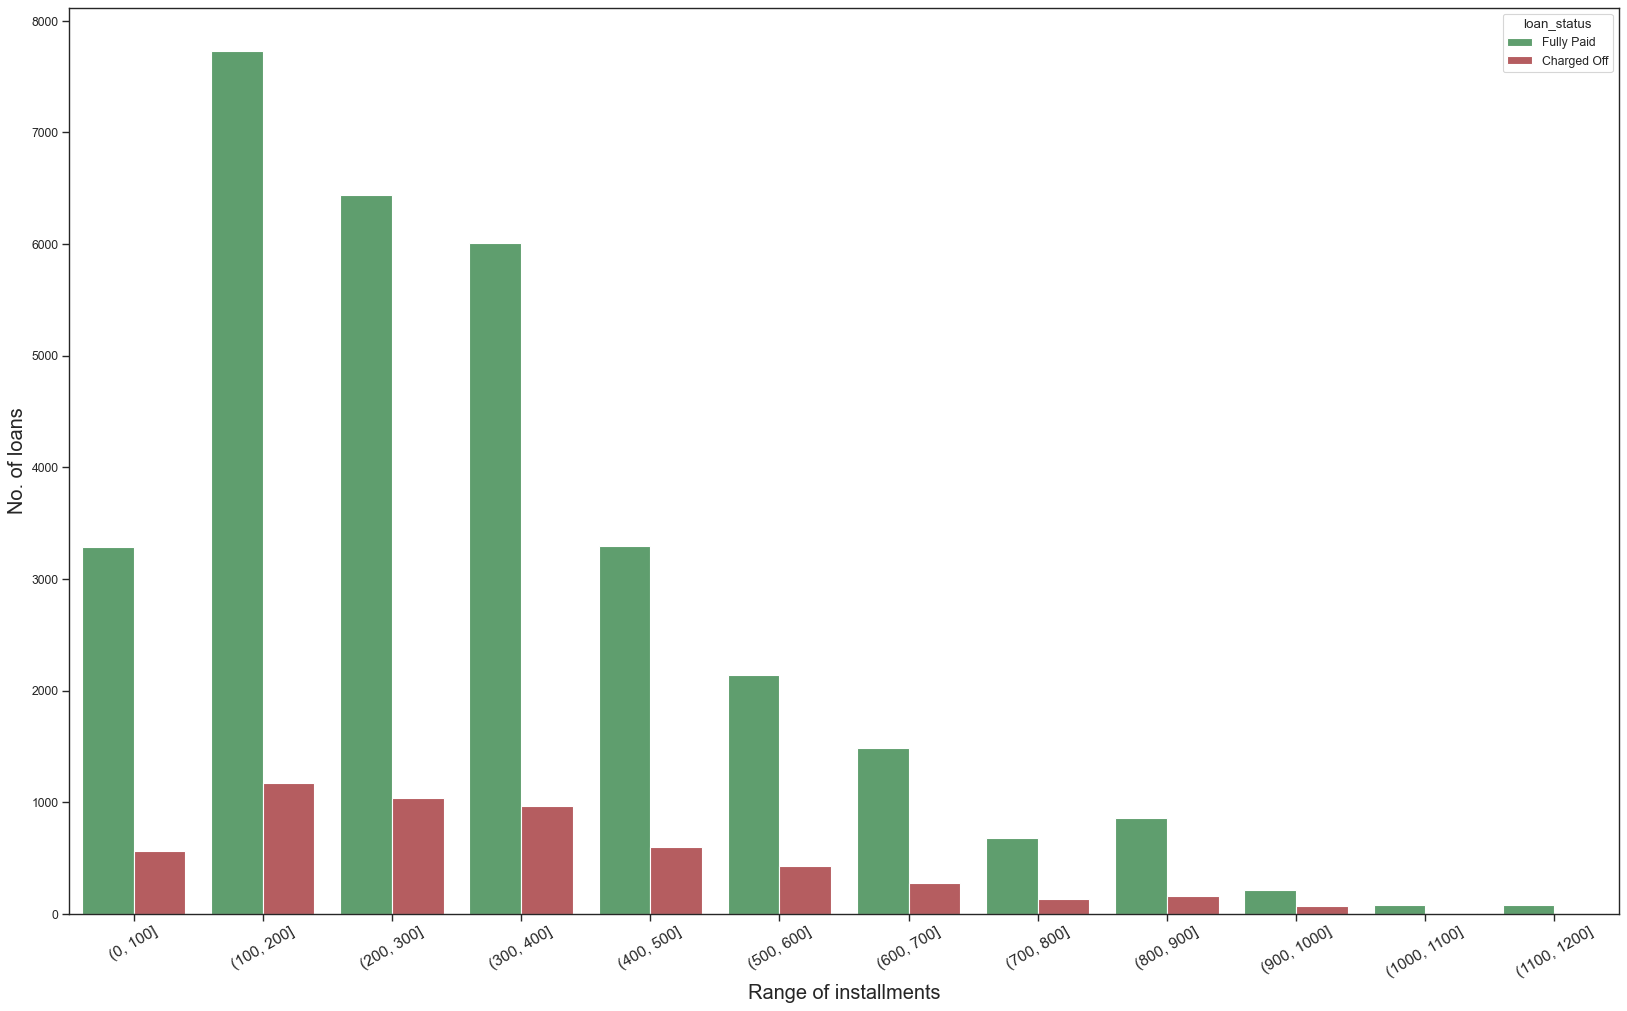

In [1781]:
#Creating an categorical variable to handle with the annual_inc

interval = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

loan["installment_cat"] = pd.cut(loan.installment, interval)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="installment_cat", hue="loan_status")
cplt.set_xlabel('Range of installments', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

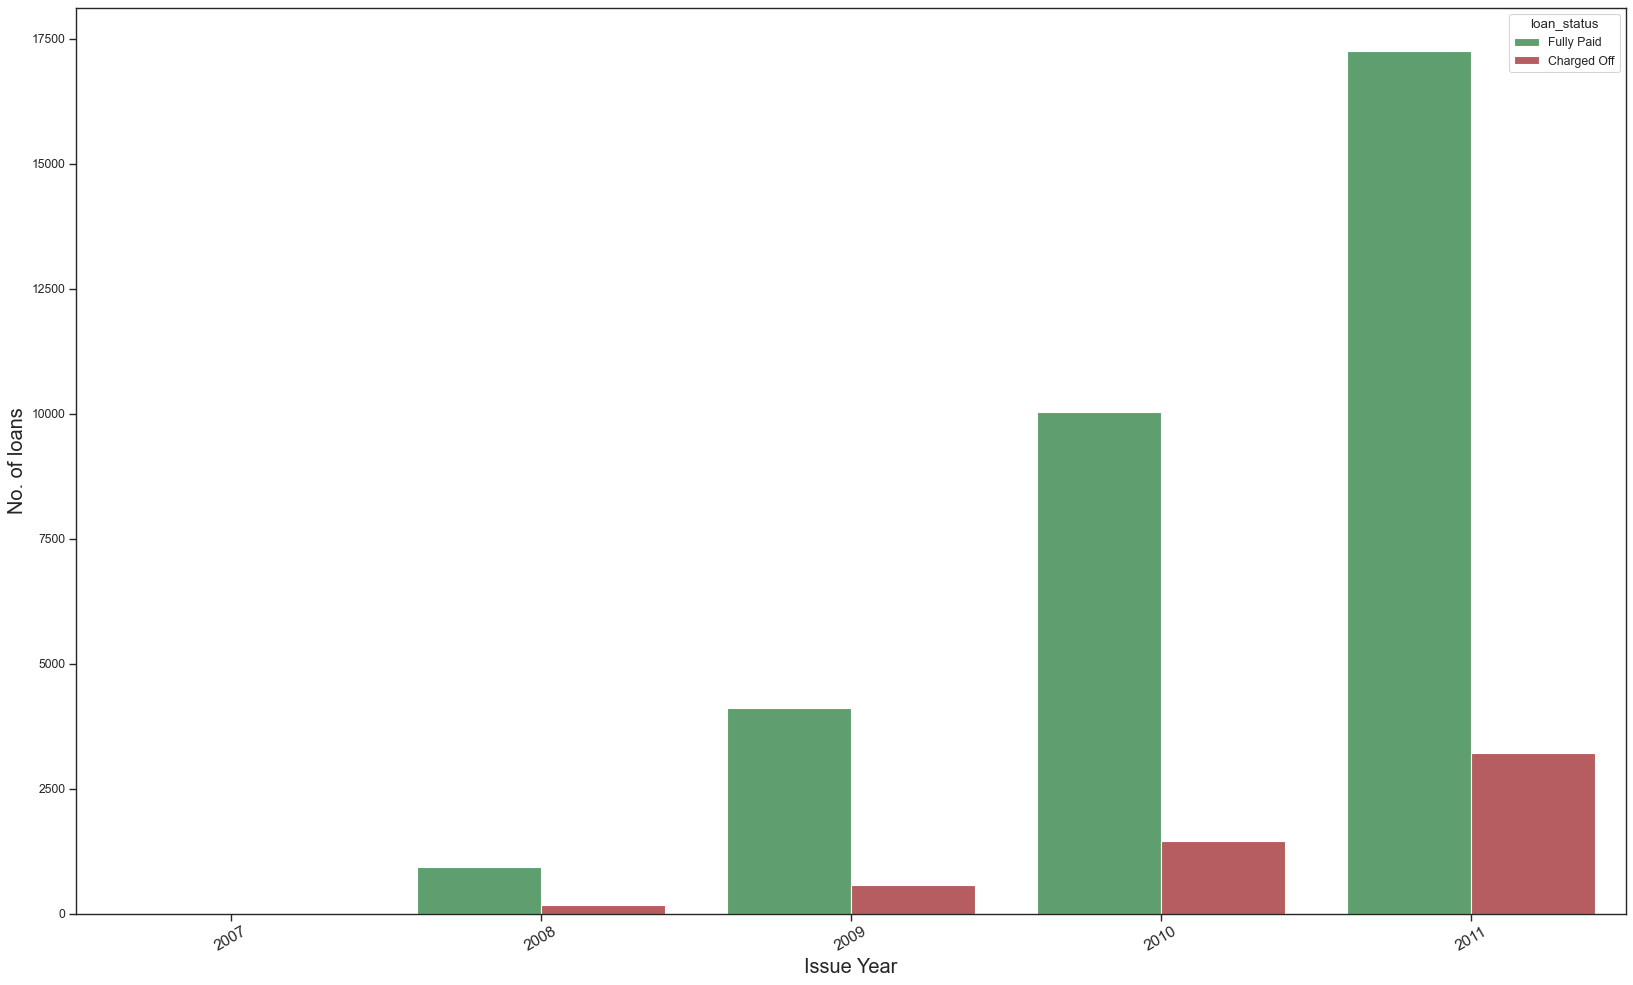

In [1782]:
#count plot for issue_yr
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="issue_yr", hue="loan_status", order=sorted(loan.issue_yr.unique()))
cplt.set_xlabel('Issue Year', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

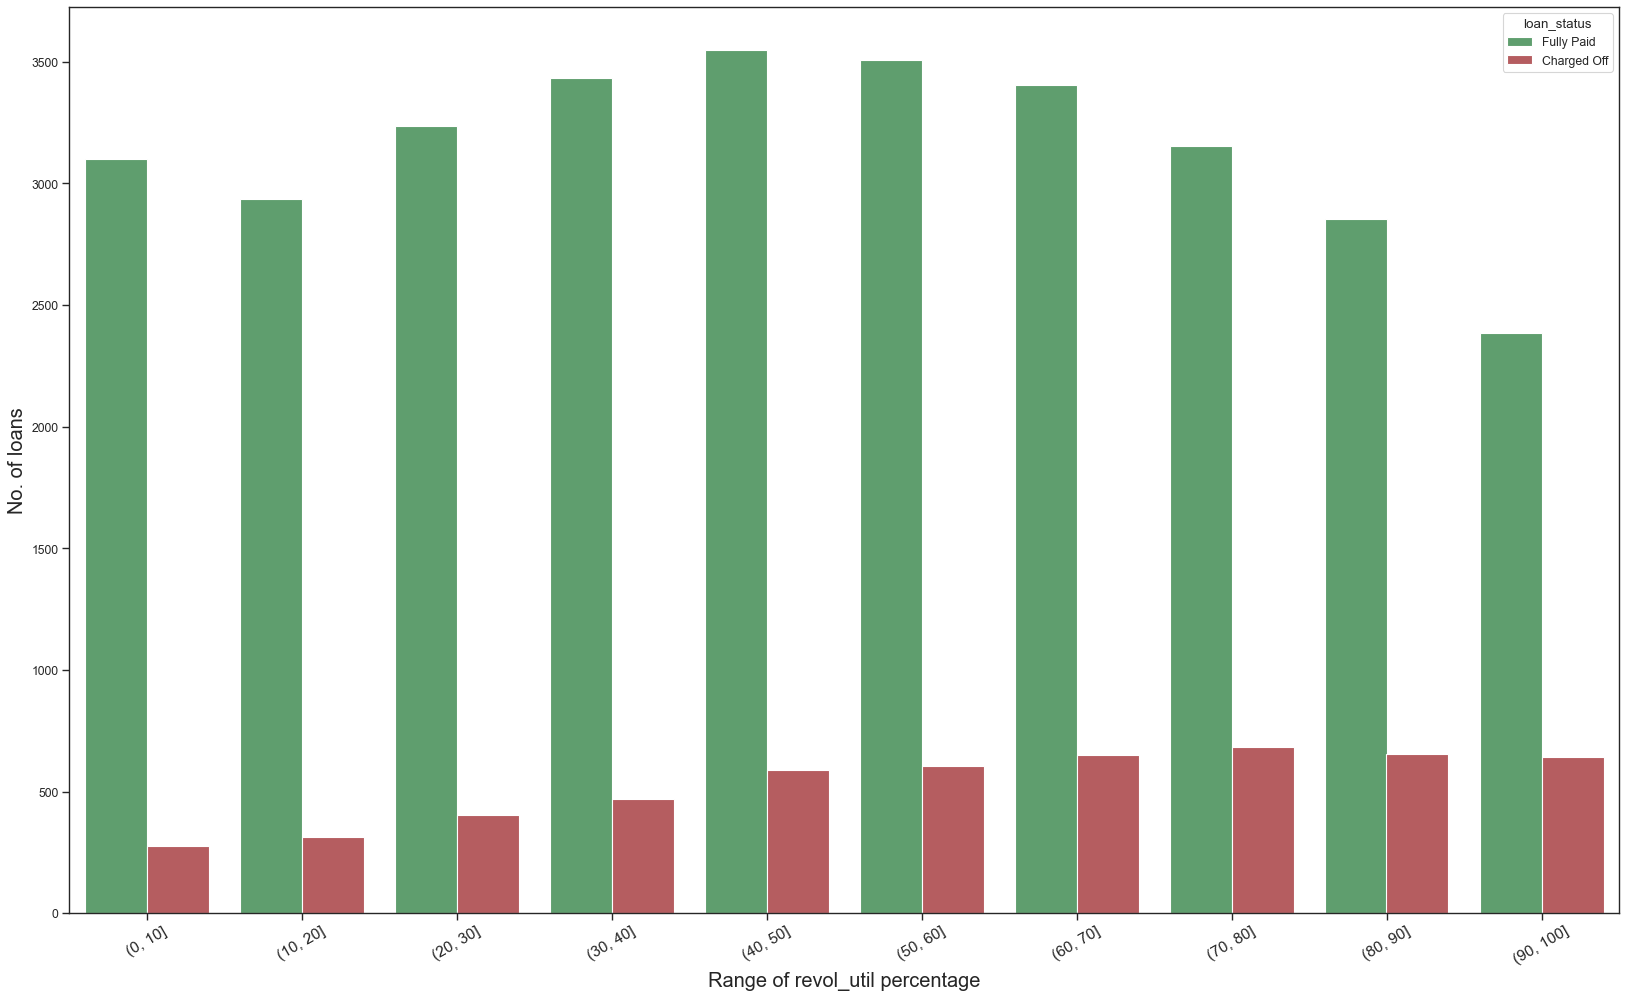

In [1783]:
#Creating an categorical variable to handle with the revol_util

interval = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

loan["revol_util_cat"] = pd.cut(loan['revol_util%'], interval,labels)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="revol_util_cat", hue="loan_status")
cplt.set_xlabel('Range of revol_util percentage', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

In [1784]:
loan['revol_bal'].describe()

count     37762.000000
mean      13310.083523
std       15828.959323
min           0.000000
25%        3691.250000
50%        8799.000000
75%       16946.500000
max      149588.000000
Name: revol_bal, dtype: float64

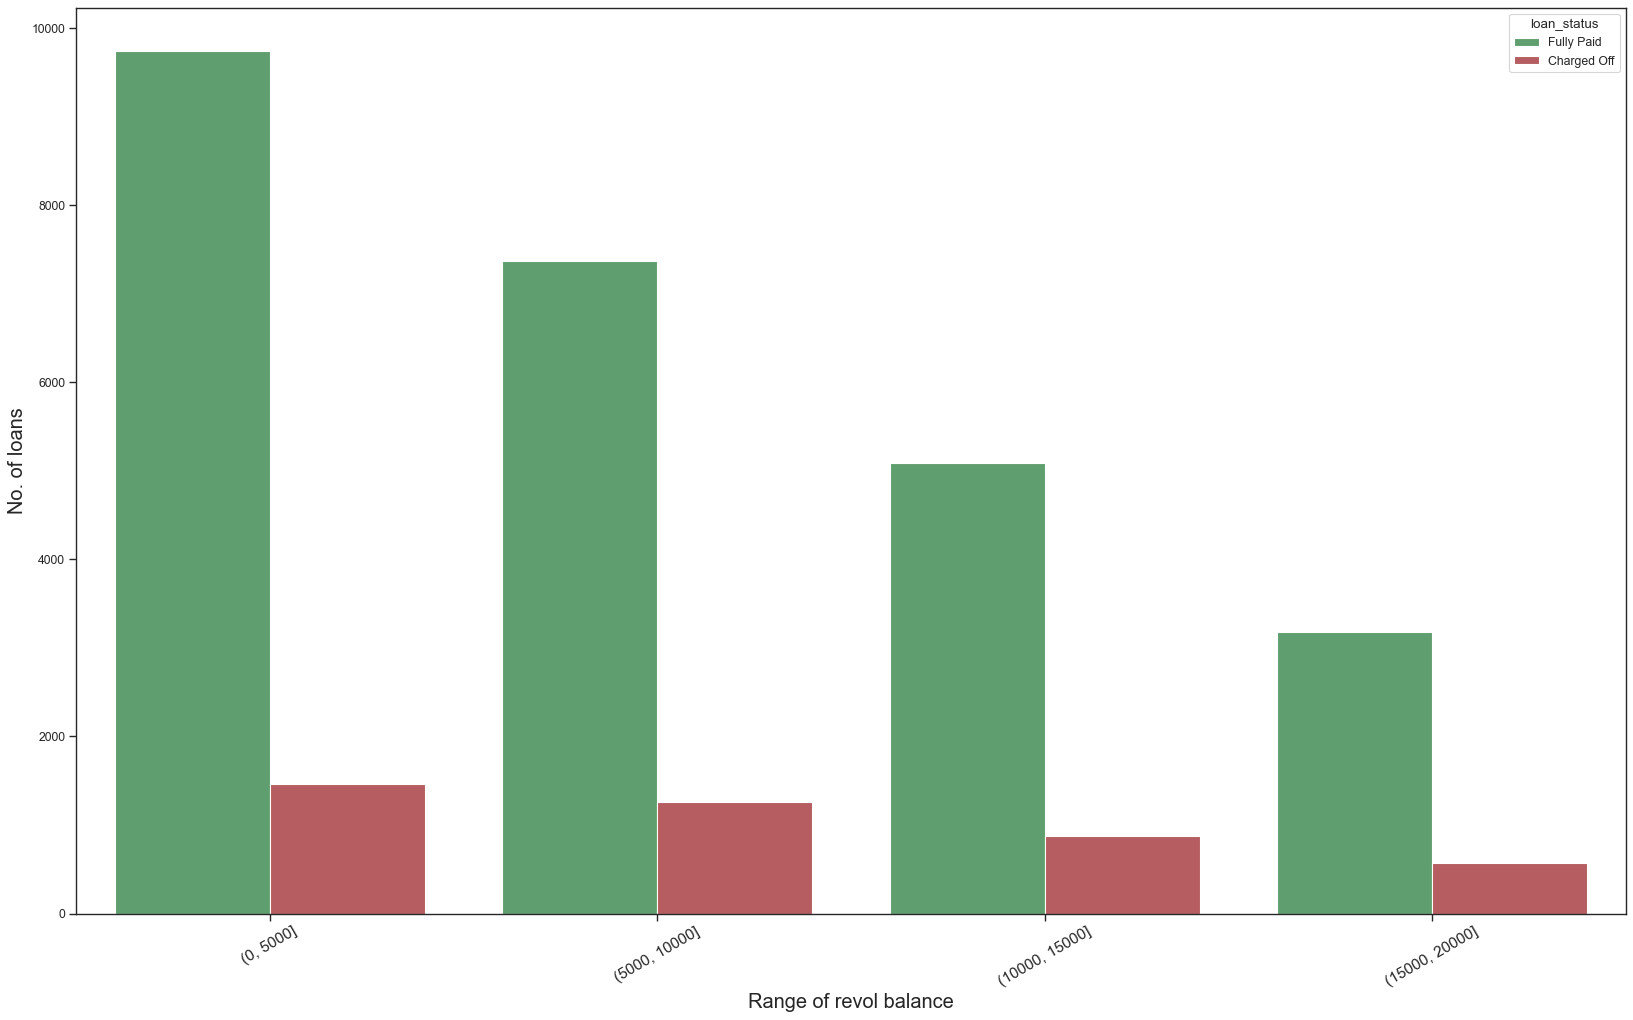

In [1785]:
#Creating an categorical variable to handle with the revol_bal

interval = [0, 5000, 10000, 15000, 20000]
labels = ['0-5000','5000-10000','10000-15000','15000-20000']

loan["revol_bal_cat"] = pd.cut(loan['revol_bal'], interval,labels)

#count plot for loan status
plt.figure(num=None, figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
cplt = sns.countplot(data=loan, x="revol_bal_cat", hue="loan_status")
cplt.set_xlabel('Range of revol balance', fontsize=18)
cplt.set_ylabel('No. of loans', fontsize=18)
cplt.set_xticklabels(cplt.get_xmajorticklabels(), fontsize = 14)
plt.xticks(rotation=30)
plt.show()

## Bivariate analysis

### Before starting bavariate analaysis, lets take a look at correlation matrix of the whole dataframe using 'Heatmap'

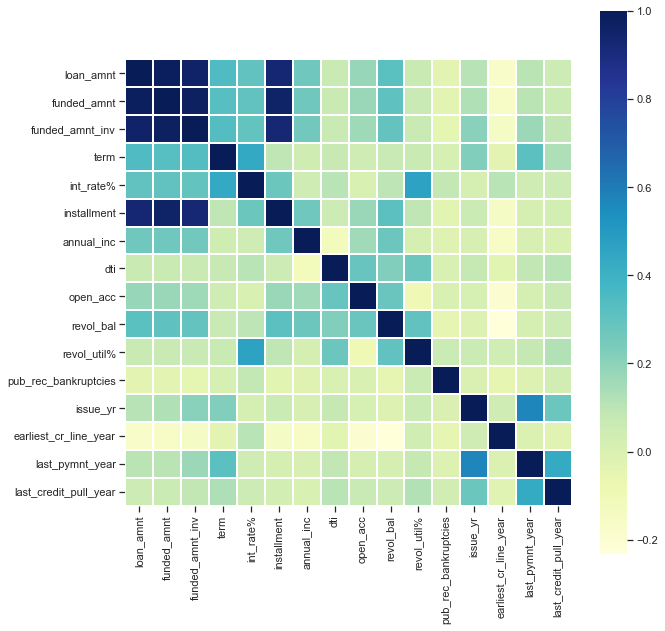

In [1761]:
############### plotting a correlation matrix for loan dataframe to identify the patterns

loan_correl_matrix = loan.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(loan_correl_matrix, ax = ax, cmap ="YlGnBu", linewidths = 1, square=True) 
plt.show()

Lets create a df for our target variable 'loan_status' with only charged-off loan status and with only fully paid loan status

In [1508]:
#making a new dataframe for loans where status is charged off
loans_chargedOff = loan.loc[loan['loan_status']=='Charged Off']

#making a new dataframe for loans where status is Fully Paid
loans_fullyPaid = loan.loc[loan['loan_status']=='Fully Paid']

Lets create a function for the crosstab always with loan_status category members as columns which can be used repeatedly. Also, lets create a function for plots to know get bivariate analysis

In [1509]:
def crosstab_loanStatus(df, col_name):
    loanSt_crosstab = pd.crosstab(df[col_name], df['loan_status'])
    
    loanSt_crosstab['Total'] = loanSt_crosstab['Fully Paid'] + loanSt_crosstab['Charged Off']
    #lets calculate percentage of each loan_status category members 
    loanSt_crosstab['ChargedOff%'] = round((loanSt_crosstab['Charged Off']/loanSt_crosstab['Total'])*100, 2)
    loanSt_crosstab['FullyPaid%'] = round((loanSt_crosstab['Fully Paid']/loanSt_crosstab['Total'])*100, 2)
    return loanSt_crosstab

In [1510]:
# Probability of charge off
def bivar_ChargedOffPerct(df,col):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    CrosstabInfo = crosstab_loanStatus(df,col)
    display(CrosstabInfo)

    linePlot = CrosstabInfo[['ChargedOff%']]   
    #linePlot1 = CrosstabInfo[['FullyPaid%']] 
    barPlot =  CrosstabInfo.iloc[:,0:2]
    
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    #ax1 = linePlot1.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True)
    
    
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

In [1830]:
def barplot_bivariate(df, col1, col2):
    
    plt.figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='b')
    p3=sns.barplot(x=col1, y=col2, hue="loan_status", data=df) #order=sorted(df[col1].unique())
    #p3.set(xlabel=col1, ylabel=col2, fontsize=17)
    p3.set_xlabel(df[col1].name.title(),fontsize=16)
    p3.set_ylabel(df[col2].name.title(),fontsize=16)
    p3.set_title(col1 + ' vs ' + col2 ,fontsize =18)
    plt.show()

In [1831]:
# This function plots a distribution of target column, and its boxplot against loan_status column
def plot_dist_box(df, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)
    plt.show()

#### Bar graph showing Purpose of loan vs percentage of charged off loans

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
purpose,,,,,
car,156,1324,1480,10.54,89.46
credit_card,530,4394,4924,10.76,89.24
debt_consolidation,2683,15041,17724,15.14,84.86
educational,50,251,301,16.61,83.39
home_improvement,332,2487,2819,11.78,88.22
house,56,304,360,15.56,84.44
major_purchase,212,1908,2120,10.00,90.00
medical,104,566,670,15.52,84.48
moving,89,476,565,15.75,84.25


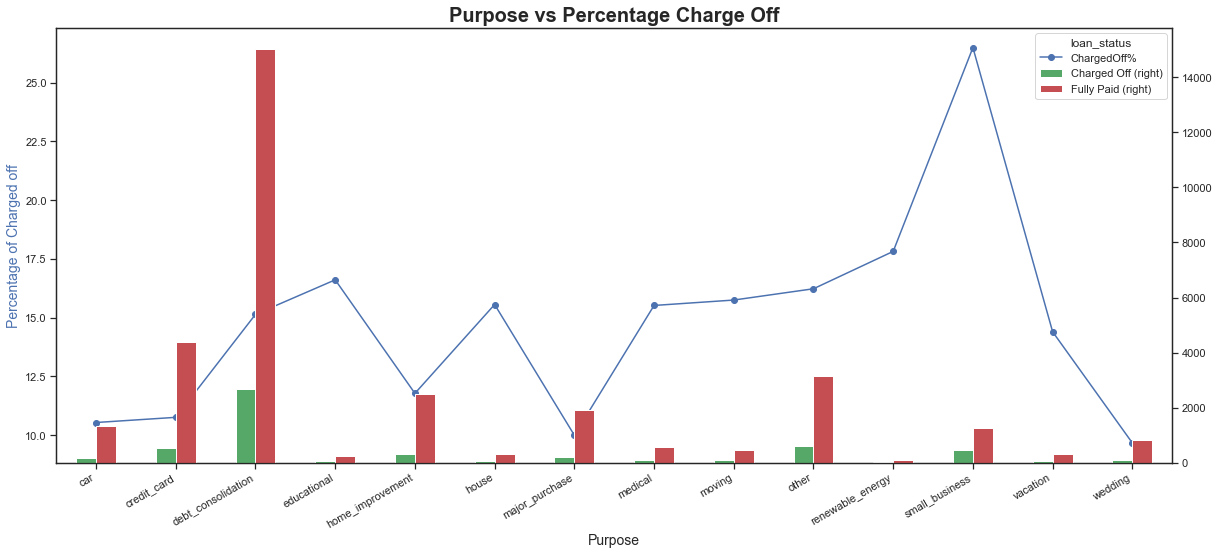

In [1789]:
# Bar graph showing Purpose of loan vs percentage of charged off loans
bivar_ChargedOffPerct(loan,'purpose')

#### Similarly below are the bar graph showing columns vs percentage of charged off loans respectively

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
home_ownership,,,,,
MORTGAGE,2264,14481,16745,13.52,86.48
OTHER,18,78,96,18.75,81.25
OWN,423,2480,2903,14.57,85.43
RENT,2720,15298,18018,15.10,84.90


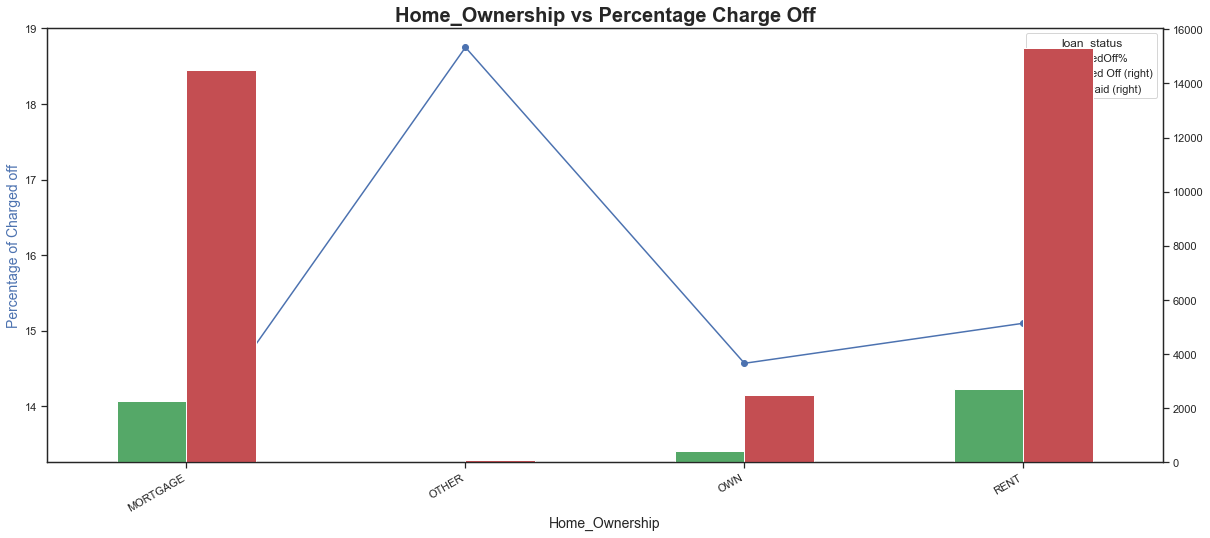

In [1801]:
bivar_ChargedOffPerct(loan,'home_ownership')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
grade,,,,,
A,590,9307,9897,5.96,94.04
B,1381,10069,11450,12.06,87.94
C,1284,6328,7612,16.87,83.13
D,1069,3876,4945,21.62,78.38
E,694,1916,2610,26.59,73.41
F,310,645,955,32.46,67.54
G,97,196,293,33.11,66.89


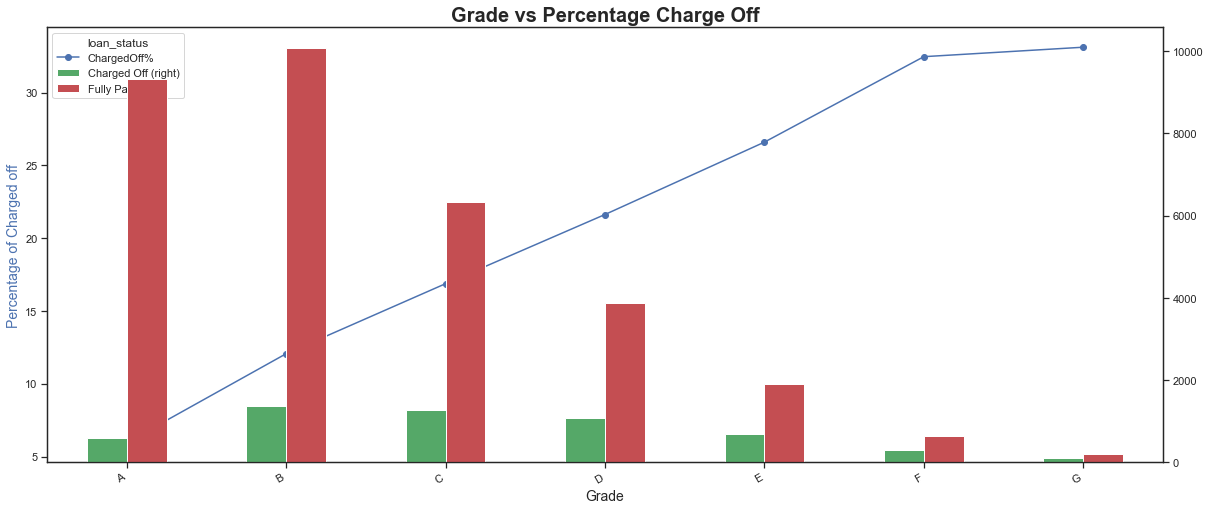

In [1802]:
bivar_ChargedOffPerct(loan,'grade')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
annual_inc_cat,,,,,
"(0, 50000]",2512,12478,14990,16.76,83.24
"(50000, 100000]",2340,15053,17393,13.45,86.55
"(100000, 150000]",413,3509,3922,10.53,89.47
"(150000, 200000]",103,799,902,11.42,88.58
"(200000, 250000]",28,242,270,10.37,89.63
"(250000, 300000]",9,112,121,7.44,92.56
"(300000, 350000]",5,46,51,9.80,90.20
"(350000, 400000]",4,25,29,13.79,86.21


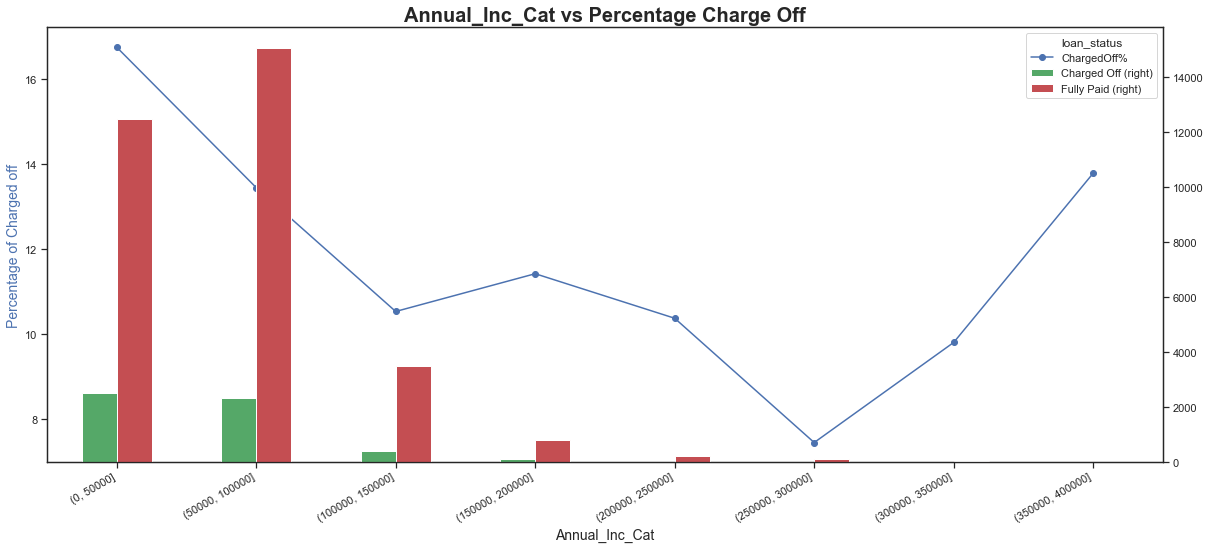

In [1803]:
bivar_ChargedOffPerct(loan,'annual_inc_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
int_rate_cat,,,,,
"(5, 10]",796,11224,12020,6.62,93.38
"(10, 15]",2574,15241,17815,14.45,85.55
"(15, 20]",1763,5399,7162,24.62,75.38
"(20, 25]",292,473,765,38.17,61.83


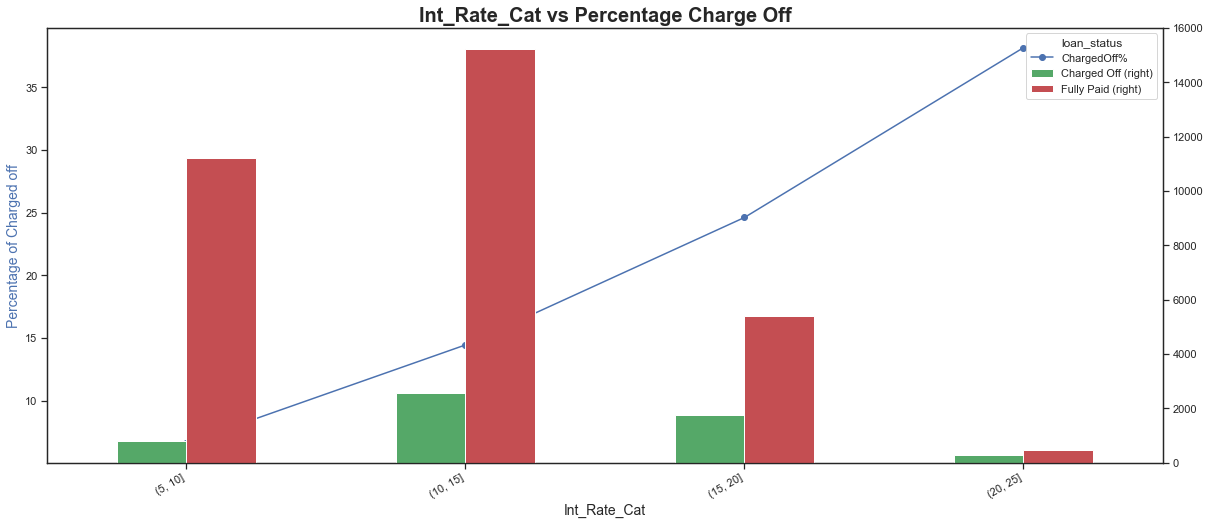

In [1804]:
bivar_ChargedOffPerct(loan,'int_rate_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
funded_amnt_cat,,,,,
"(0, 5000]",1260,8026,9286,13.57,86.43
"(5000, 10000]",1611,11105,12716,12.67,87.33
"(10000, 15000]",1065,6681,7746,13.75,86.25
"(15000, 20000]",754,3501,4255,17.72,82.28
"(20000, 25000]",465,2028,2493,18.65,81.35
"(25000, 30000]",122,529,651,18.74,81.26
"(30000, 35000]",148,467,615,24.07,75.93


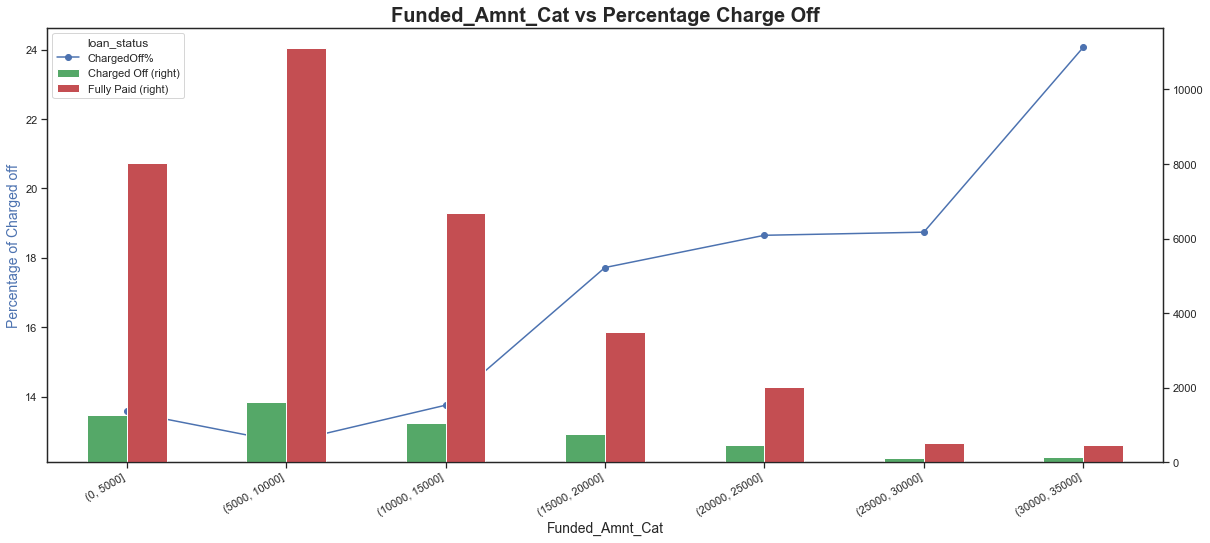

In [1805]:
bivar_ChargedOffPerct(loan,'funded_amnt_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
dti_cat,,,,,
"(0, 5]",563,4147,4710,11.95,88.05
"(5, 10]",957,6733,7690,12.44,87.56
"(10, 15]",1363,8087,9450,14.42,85.58
"(15, 20]",1341,7302,8643,15.52,84.48
"(20, 25]",1088,5403,6491,16.76,83.24
"(25, 30]",87,536,623,13.96,86.04


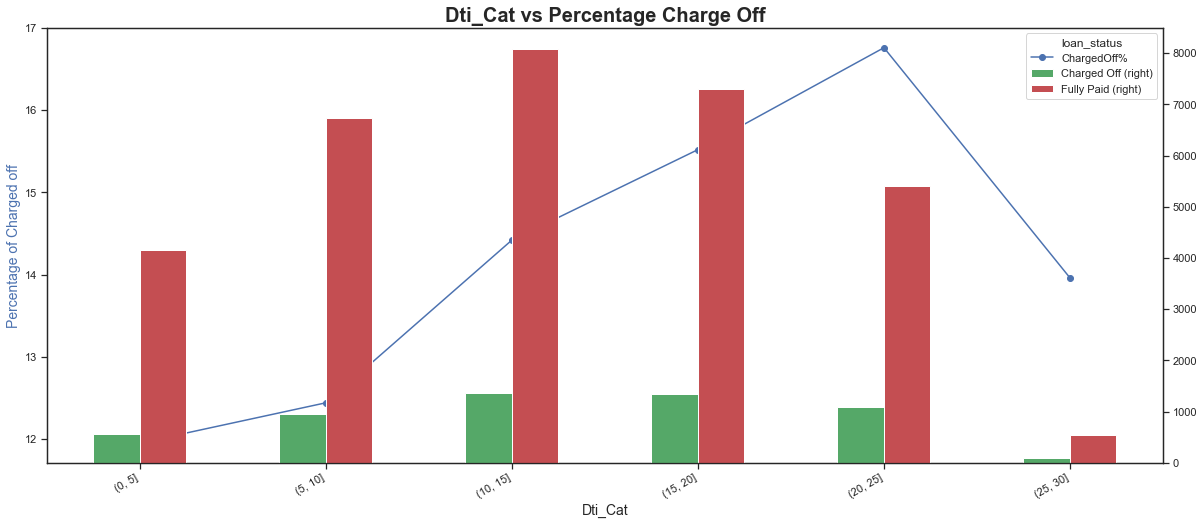

In [1806]:
bivar_ChargedOffPerct(loan,'dti_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
open_acc_cat,,,,,
"(0, 5]",1107,6153,7260,15.25,84.75
"(5, 10]",2546,15376,17922,14.21,85.79
"(10, 15]",1296,7827,9123,14.21,85.79
"(15, 20]",367,2385,2752,13.34,86.66
"(20, 25]",81,496,577,14.04,85.96
"(25, 30]",21,84,105,20.00,80.00
"(30, 35]",6,12,18,33.33,66.67
"(35, 40]",1,3,4,25.00,75.00


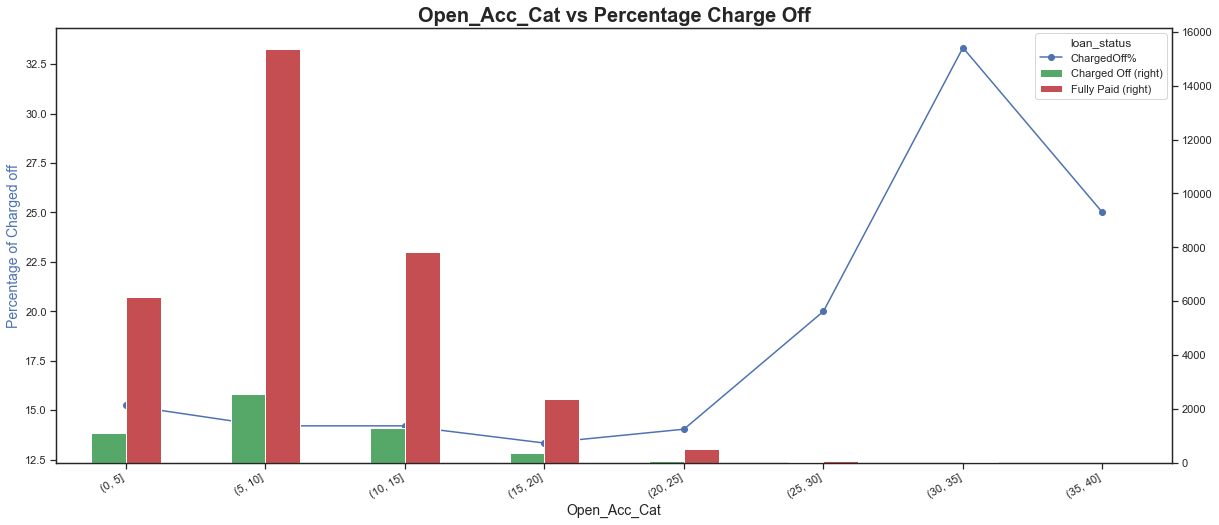

In [1807]:
bivar_ChargedOffPerct(loan,'open_acc_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
installment_cat,,,,,
"(0, 100]",560,3282,3842,14.58,85.42
"(100, 200]",1175,7730,8905,13.19,86.81
"(200, 300]",1042,6438,7480,13.93,86.07
"(300, 400]",963,6014,6977,13.80,86.20
"(400, 500]",597,3295,3892,15.34,84.66
"(500, 600]",426,2135,2561,16.63,83.37
"(600, 700]",274,1481,1755,15.61,84.39
"(700, 800]",132,682,814,16.22,83.78
"(800, 900]",158,858,1016,15.55,84.45


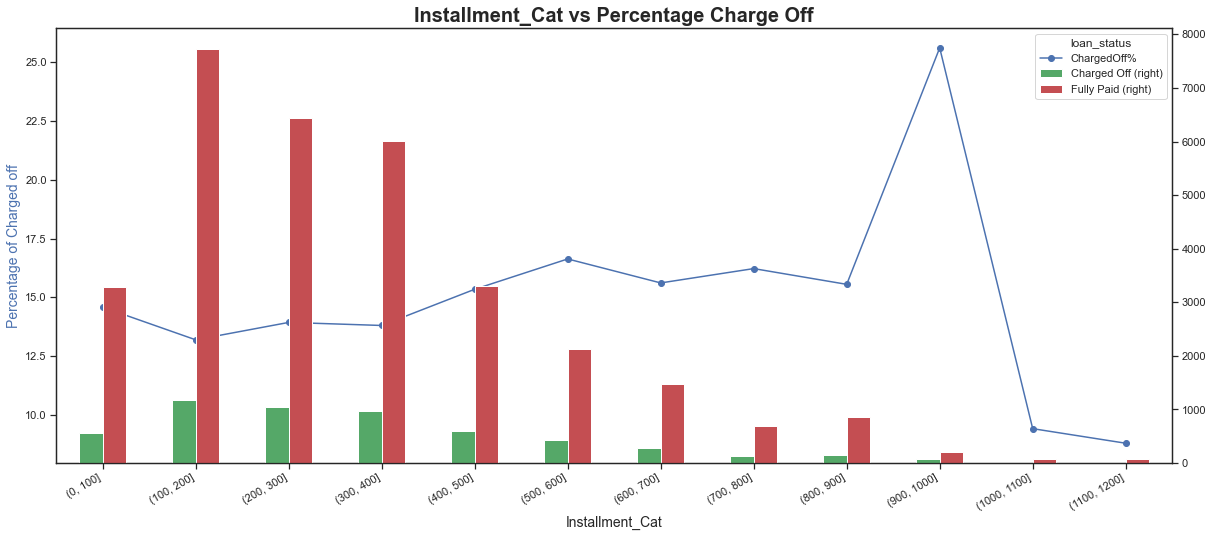

In [1808]:
bivar_ChargedOffPerct(loan,'installment_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
revol_util_cat,,,,,
"(0, 10]",276,3100,3376,8.18,91.82
"(10, 20]",315,2937,3252,9.69,90.31
"(20, 30]",405,3234,3639,11.13,88.87
"(30, 40]",471,3435,3906,12.06,87.94
"(40, 50]",588,3547,4135,14.22,85.78
"(50, 60]",606,3509,4115,14.73,85.27
"(60, 70]",649,3405,4054,16.01,83.99
"(70, 80]",682,3154,3836,17.78,82.22
"(80, 90]",653,2855,3508,18.61,81.39


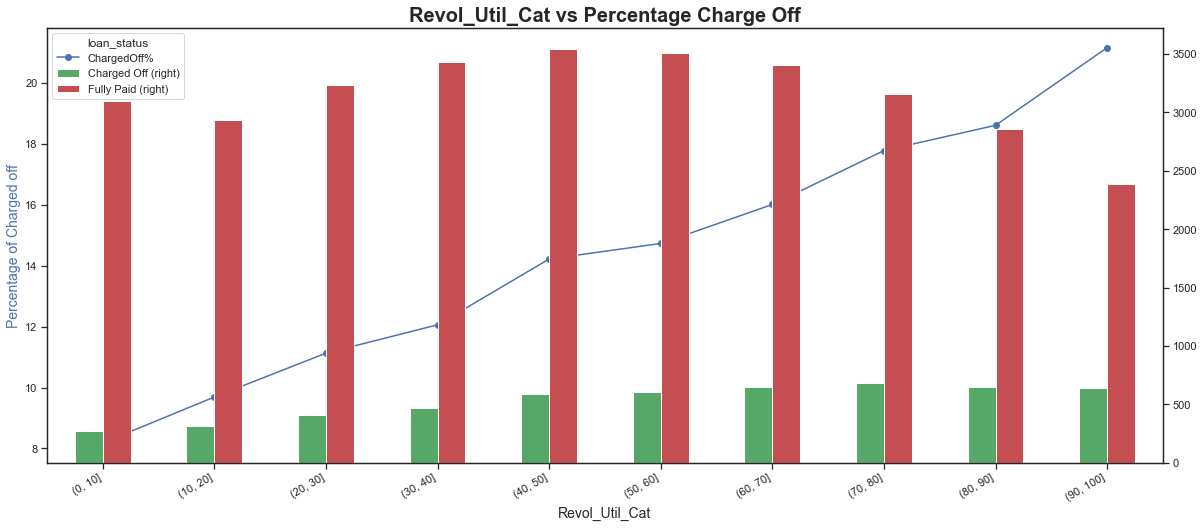

In [1809]:
bivar_ChargedOffPerct(loan,'revol_util_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
revol_bal_cat,,,,,
"(0, 5000]",1459,9740,11199,13.03,86.97
"(5000, 10000]",1259,7365,8624,14.60,85.40
"(10000, 15000]",879,5090,5969,14.73,85.27
"(15000, 20000]",567,3180,3747,15.13,84.87


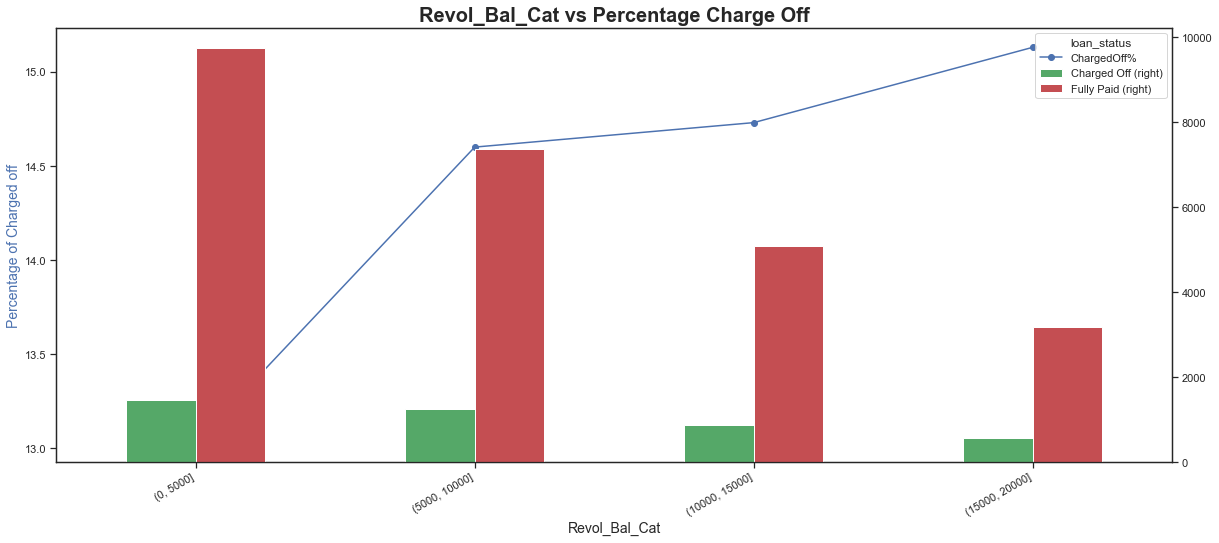

In [1810]:
bivar_ChargedOffPerct(loan,'revol_bal_cat')

loan_status,Charged Off,Fully Paid,Total,ChargedOff%,FullyPaid%
emp_length,,,,,
1,430,2632,3062,14.04,85.96
2,549,3647,4196,13.08,86.92
3,542,3398,3940,13.76,86.24
4,441,2842,3283,13.43,86.57
5,443,2704,3147,14.08,85.92
6,298,1834,2132,13.98,86.02
7,257,1428,1685,15.25,84.75
8,196,1209,1405,13.95,86.05
9,153,1053,1206,12.69,87.31


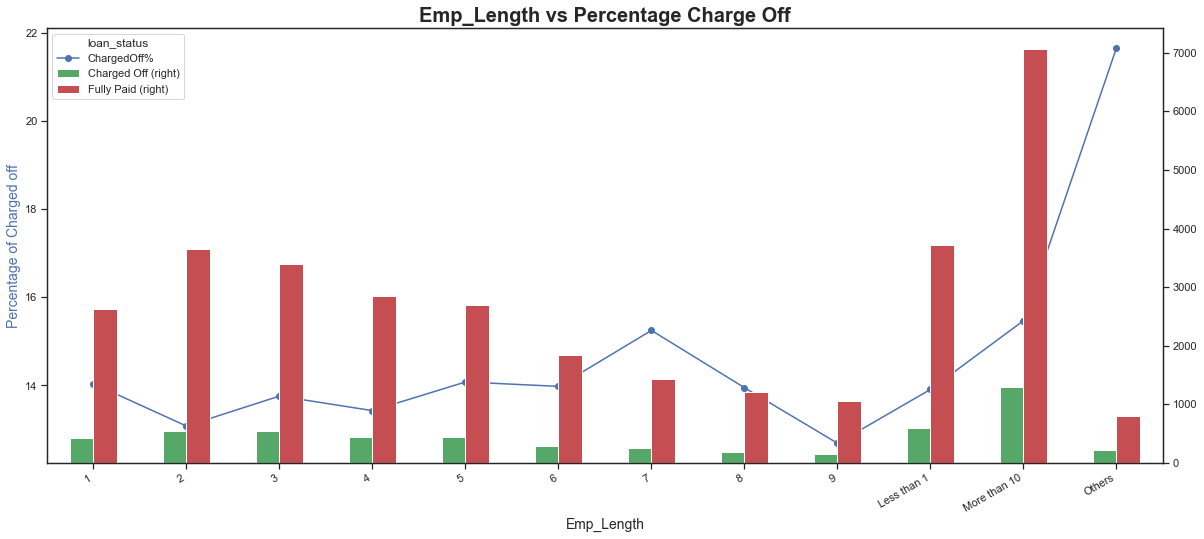

In [1811]:
bivar_ChargedOffPerct(loan,'emp_length')

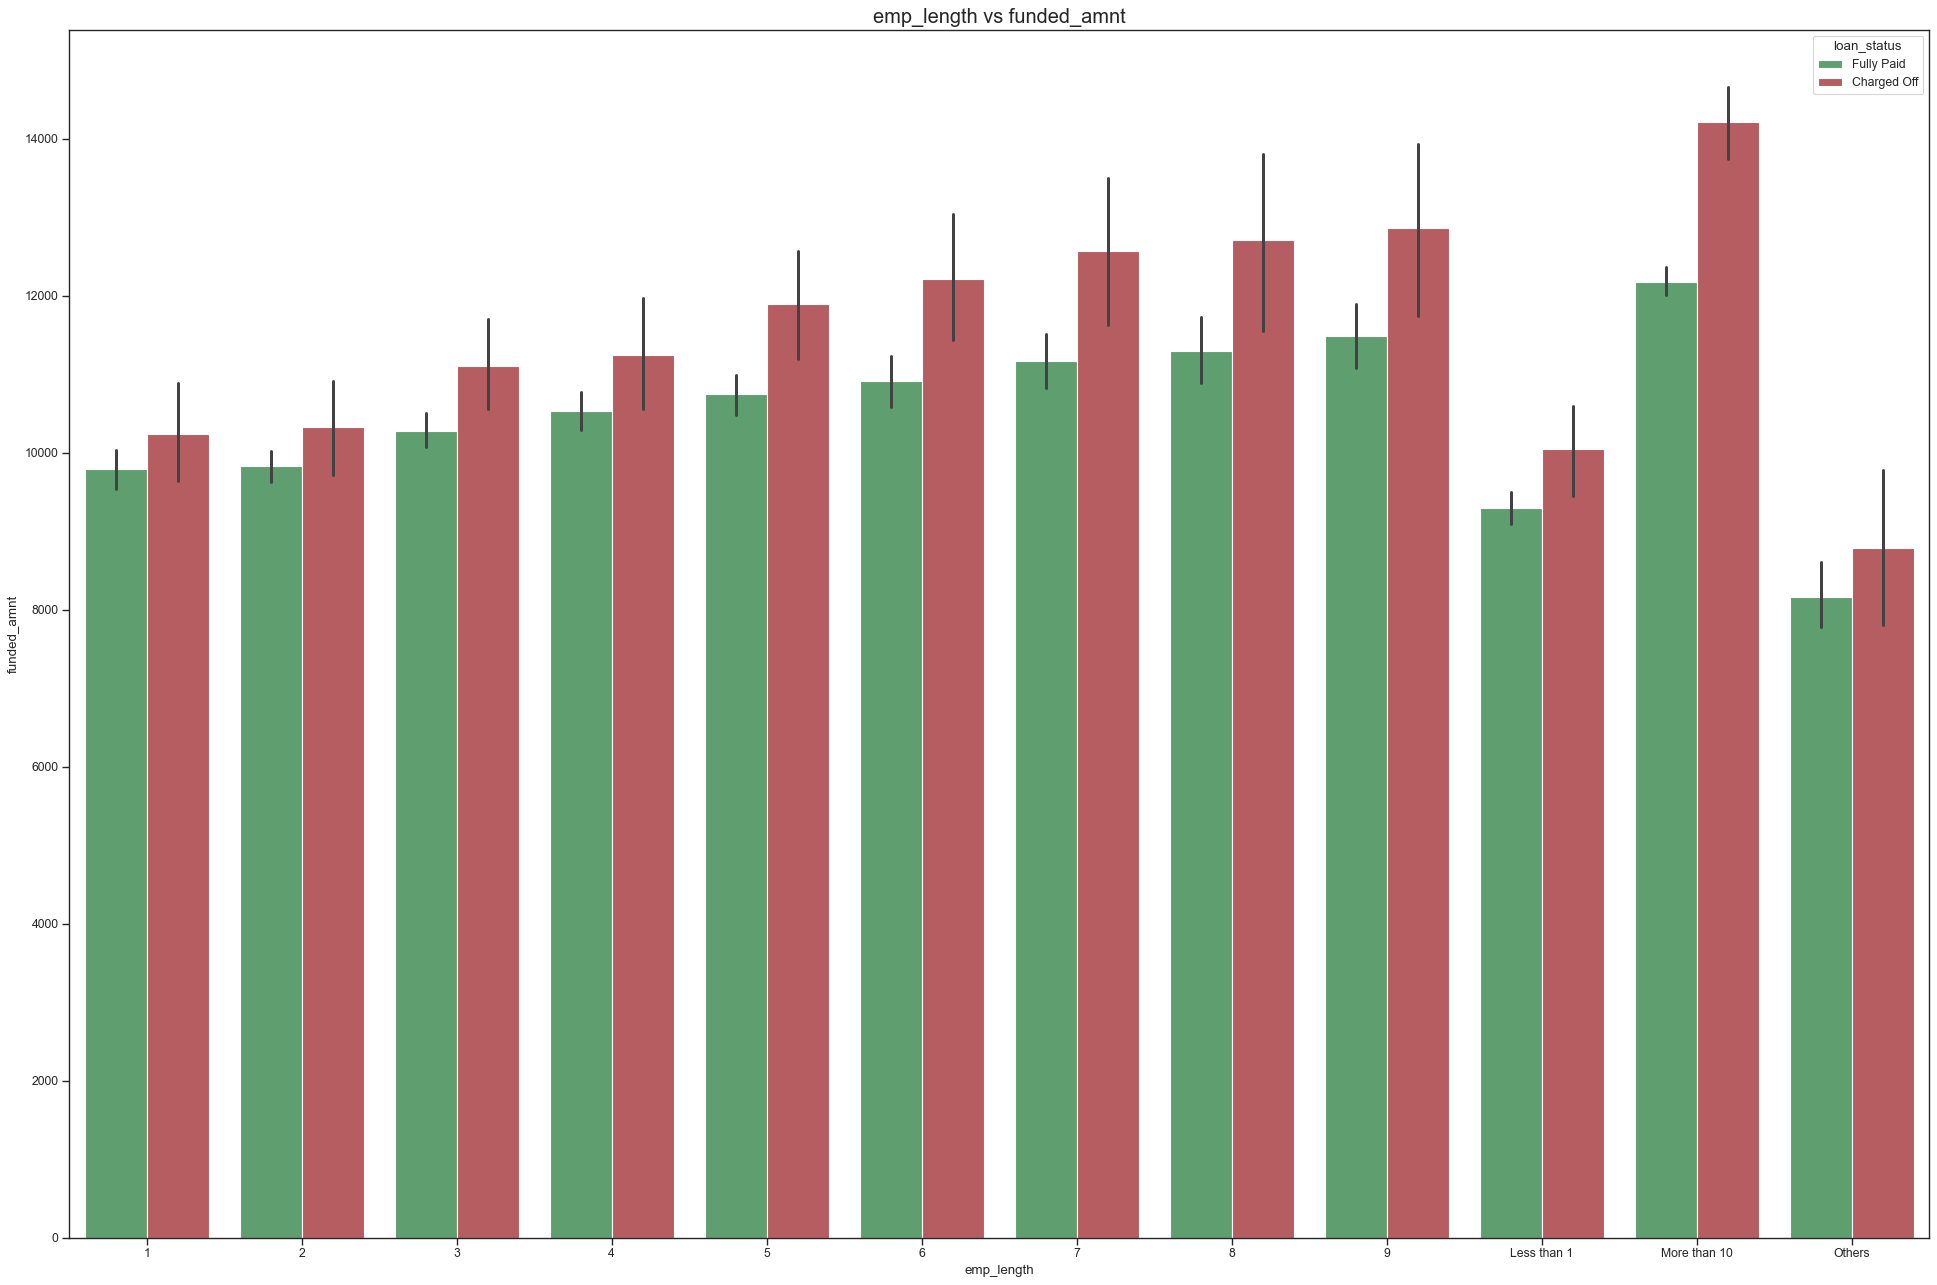

In [1832]:
#barplot_bivariate(loan, 'emp_length','funded_amnt')

plt.figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='b')
p3=sns.barplot(x='emp_length', y='funded_amnt', hue="loan_status", data=loan, order=sorted(loan.emp_length.unique()))
p3.set(xlabel='emp_length', ylabel='funded_amnt')
p3.set_title('emp_length' + ' vs ' + 'funded_amnt' ,fontsize =18)
#sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=concat_D, estimator=np.sum)
plt.show()

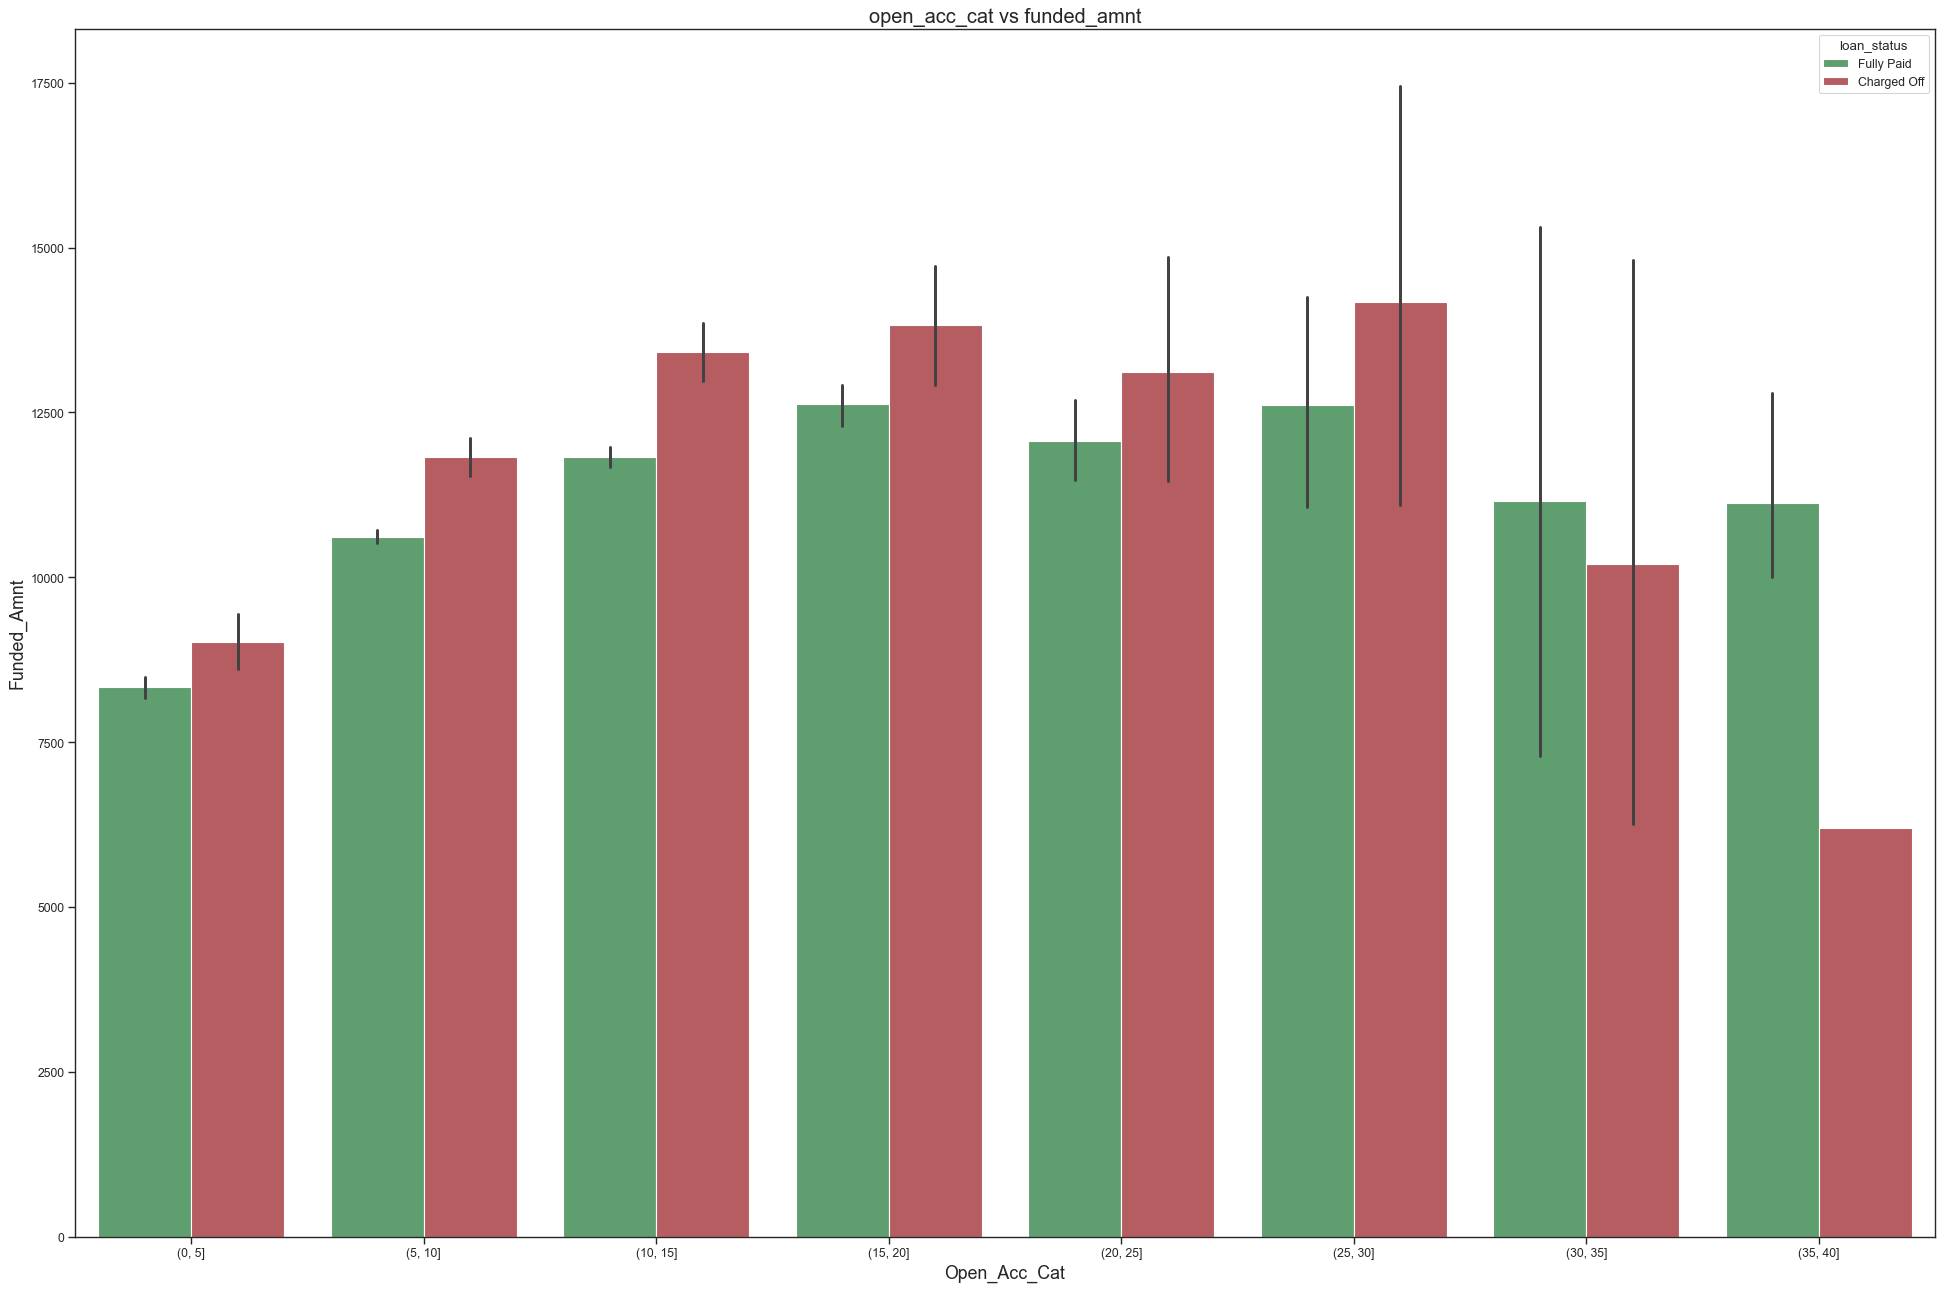

In [1833]:
barplot_bivariate(loan, 'open_acc_cat','funded_amnt')

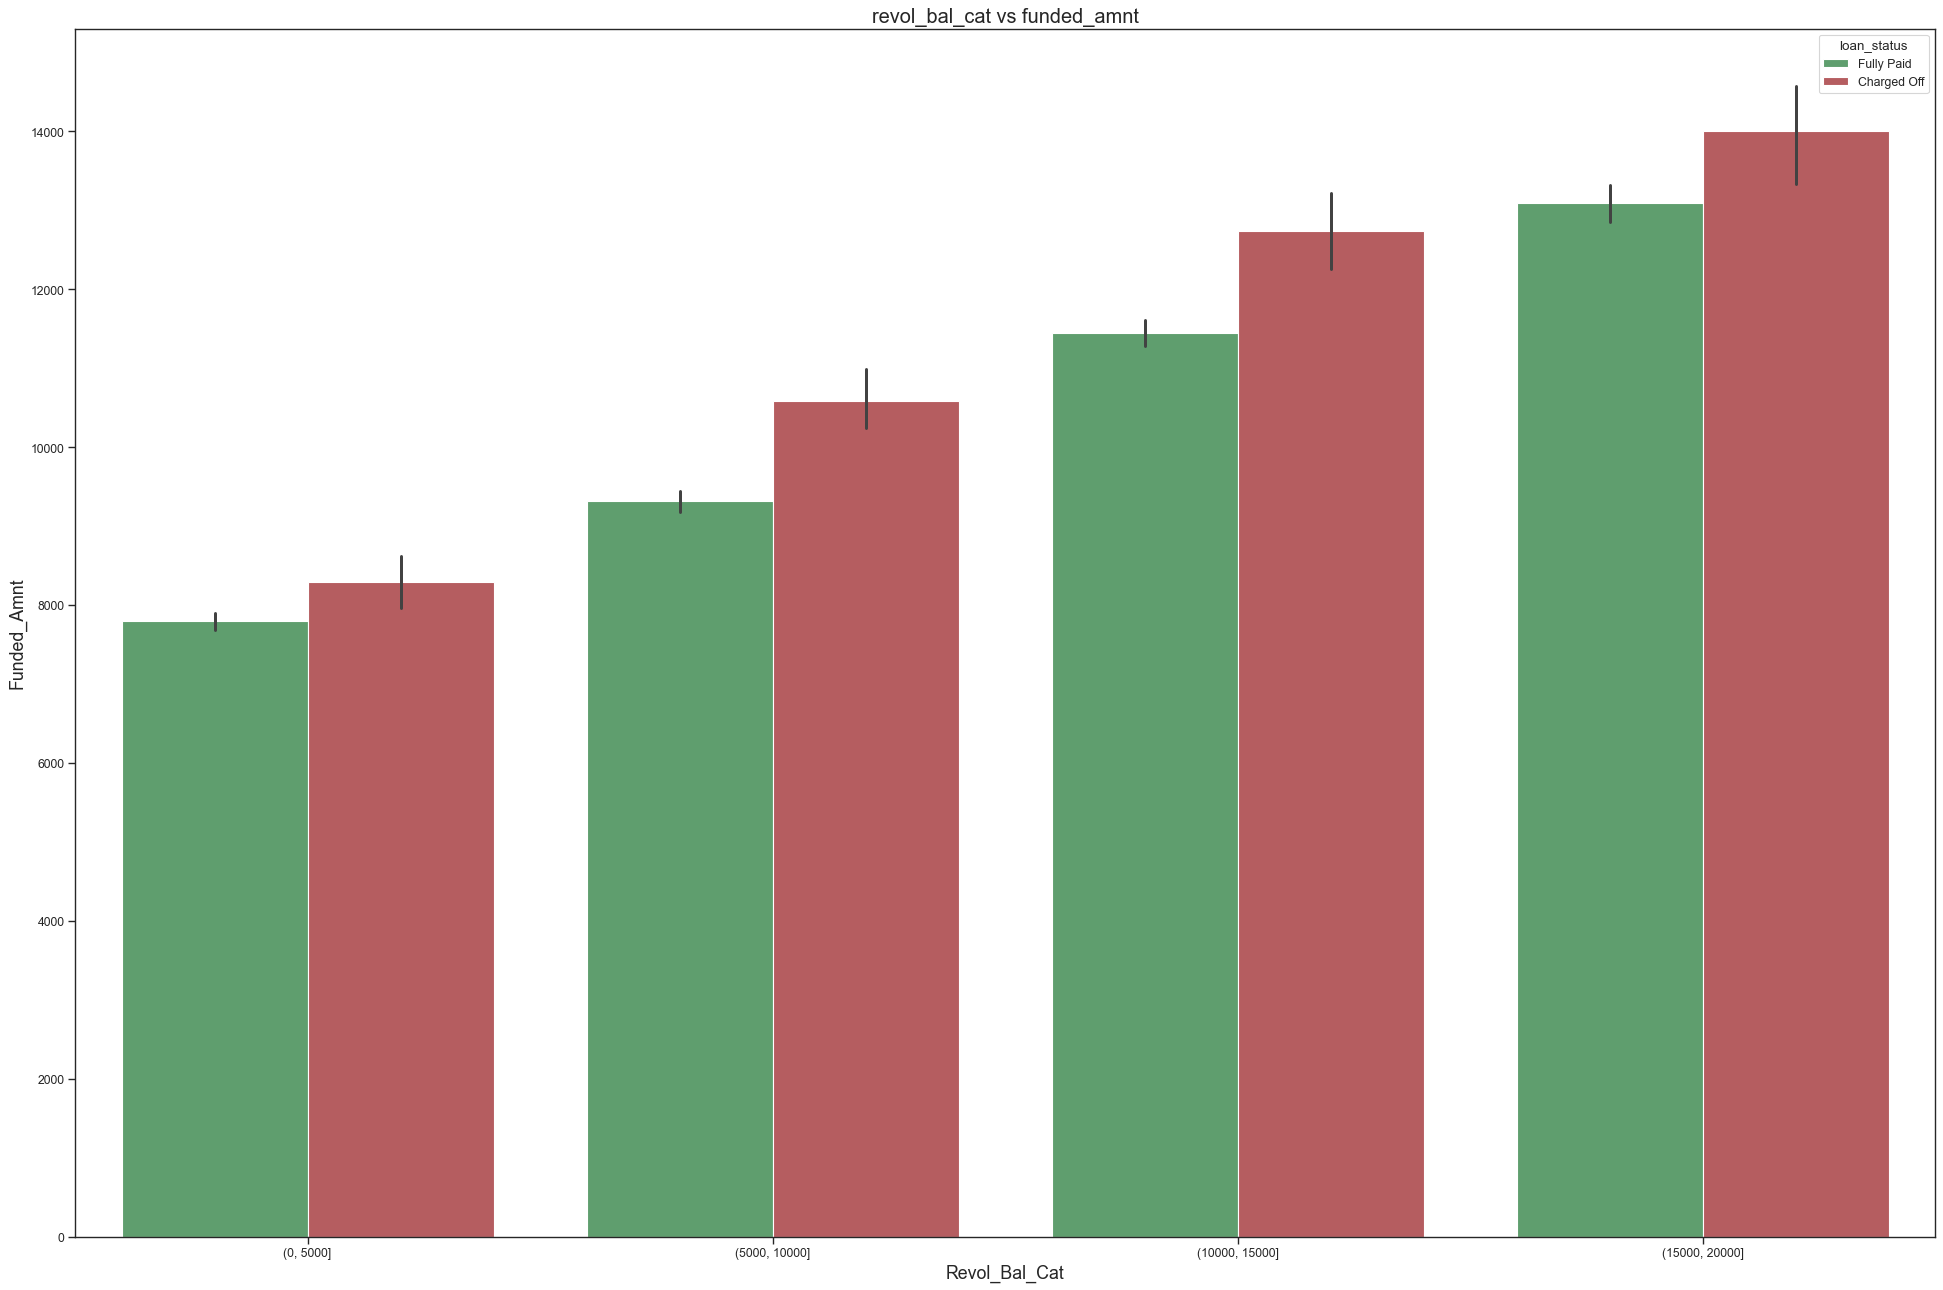

In [1834]:
barplot_bivariate(loan, 'revol_bal_cat','funded_amnt')

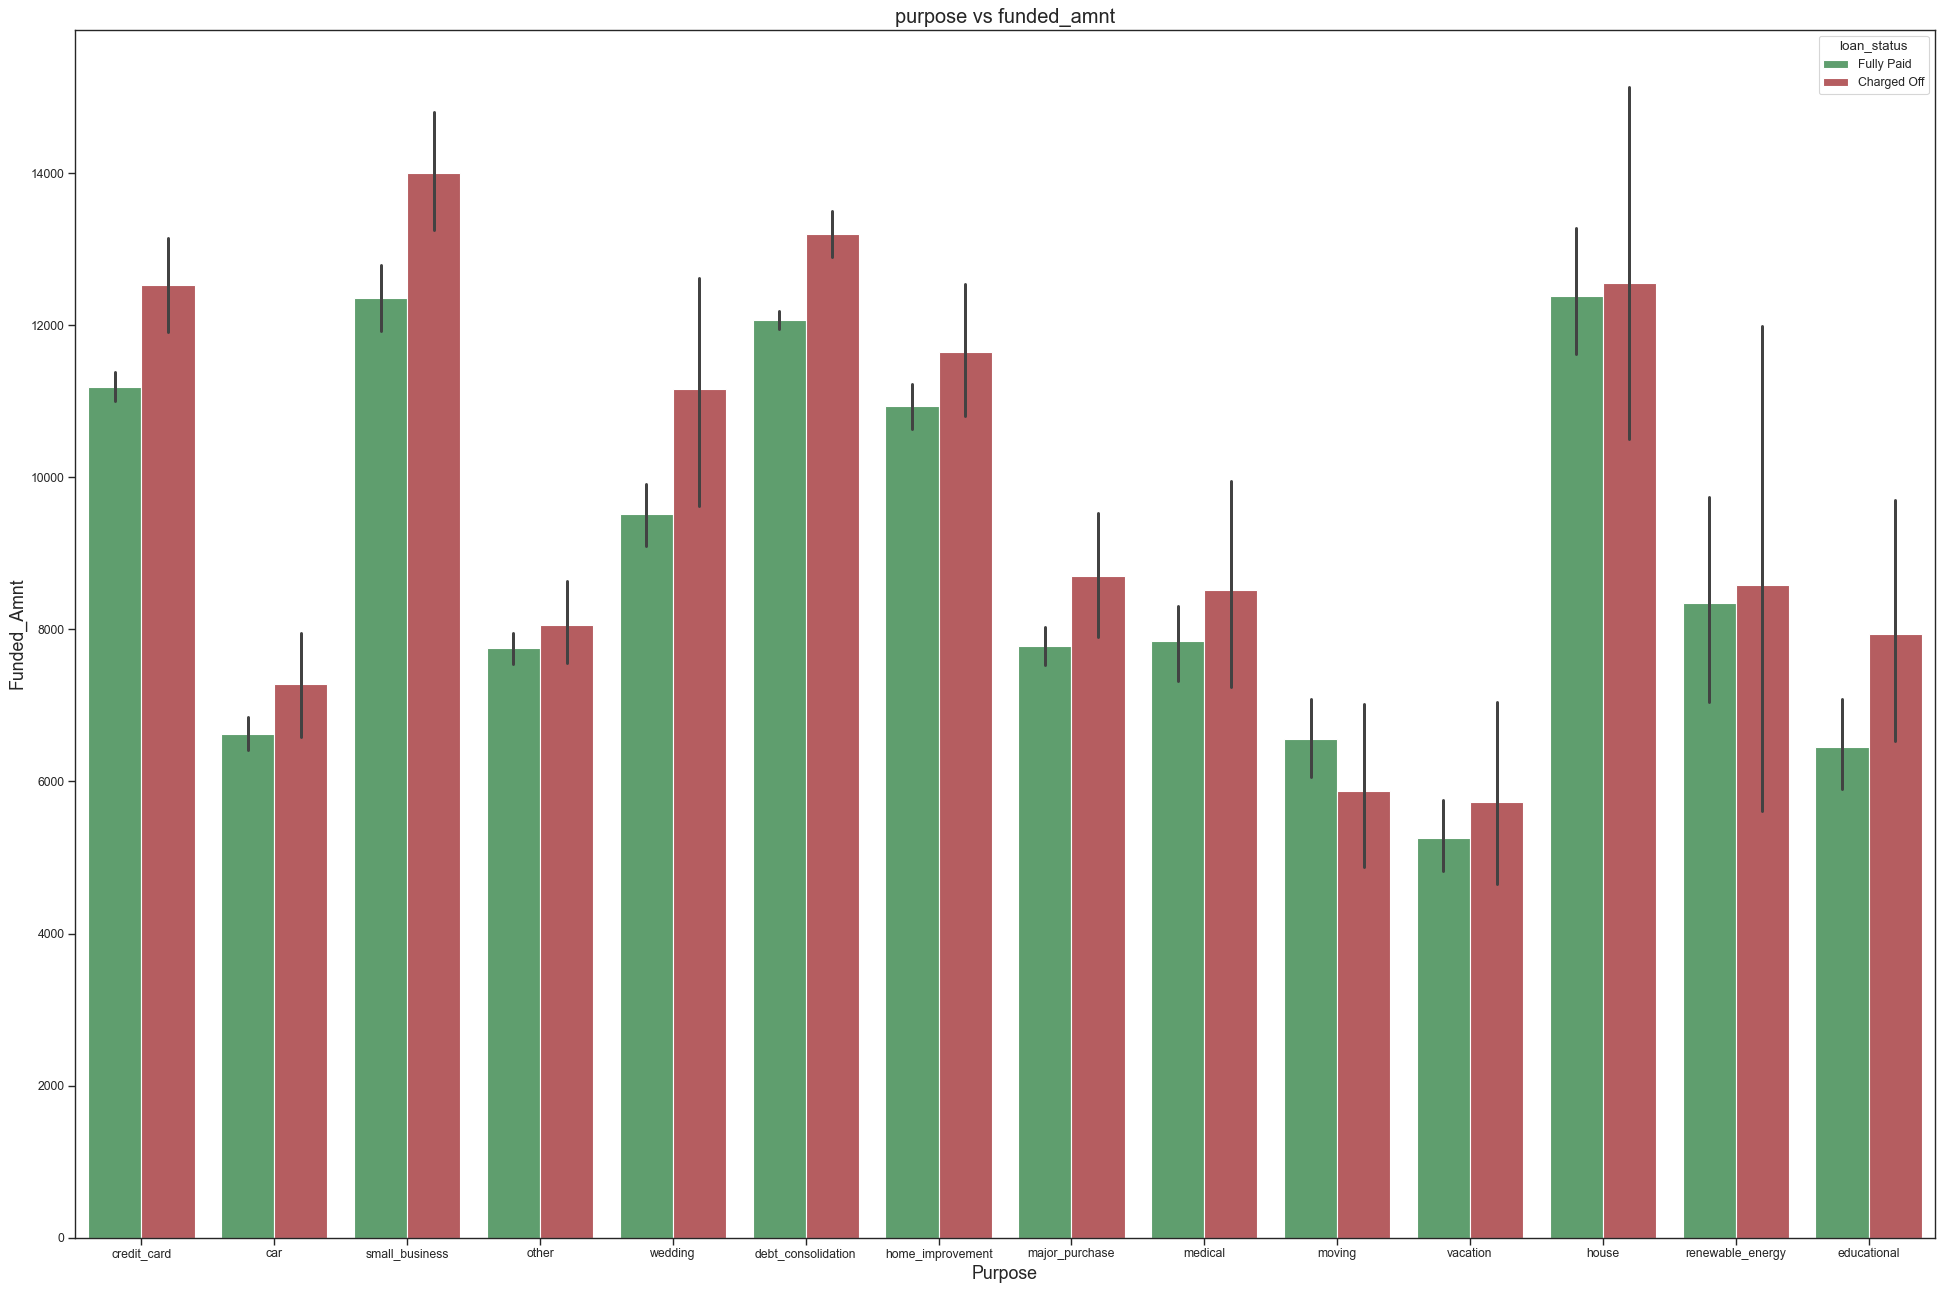

In [1835]:
barplot_bivariate(loan, 'purpose','funded_amnt')

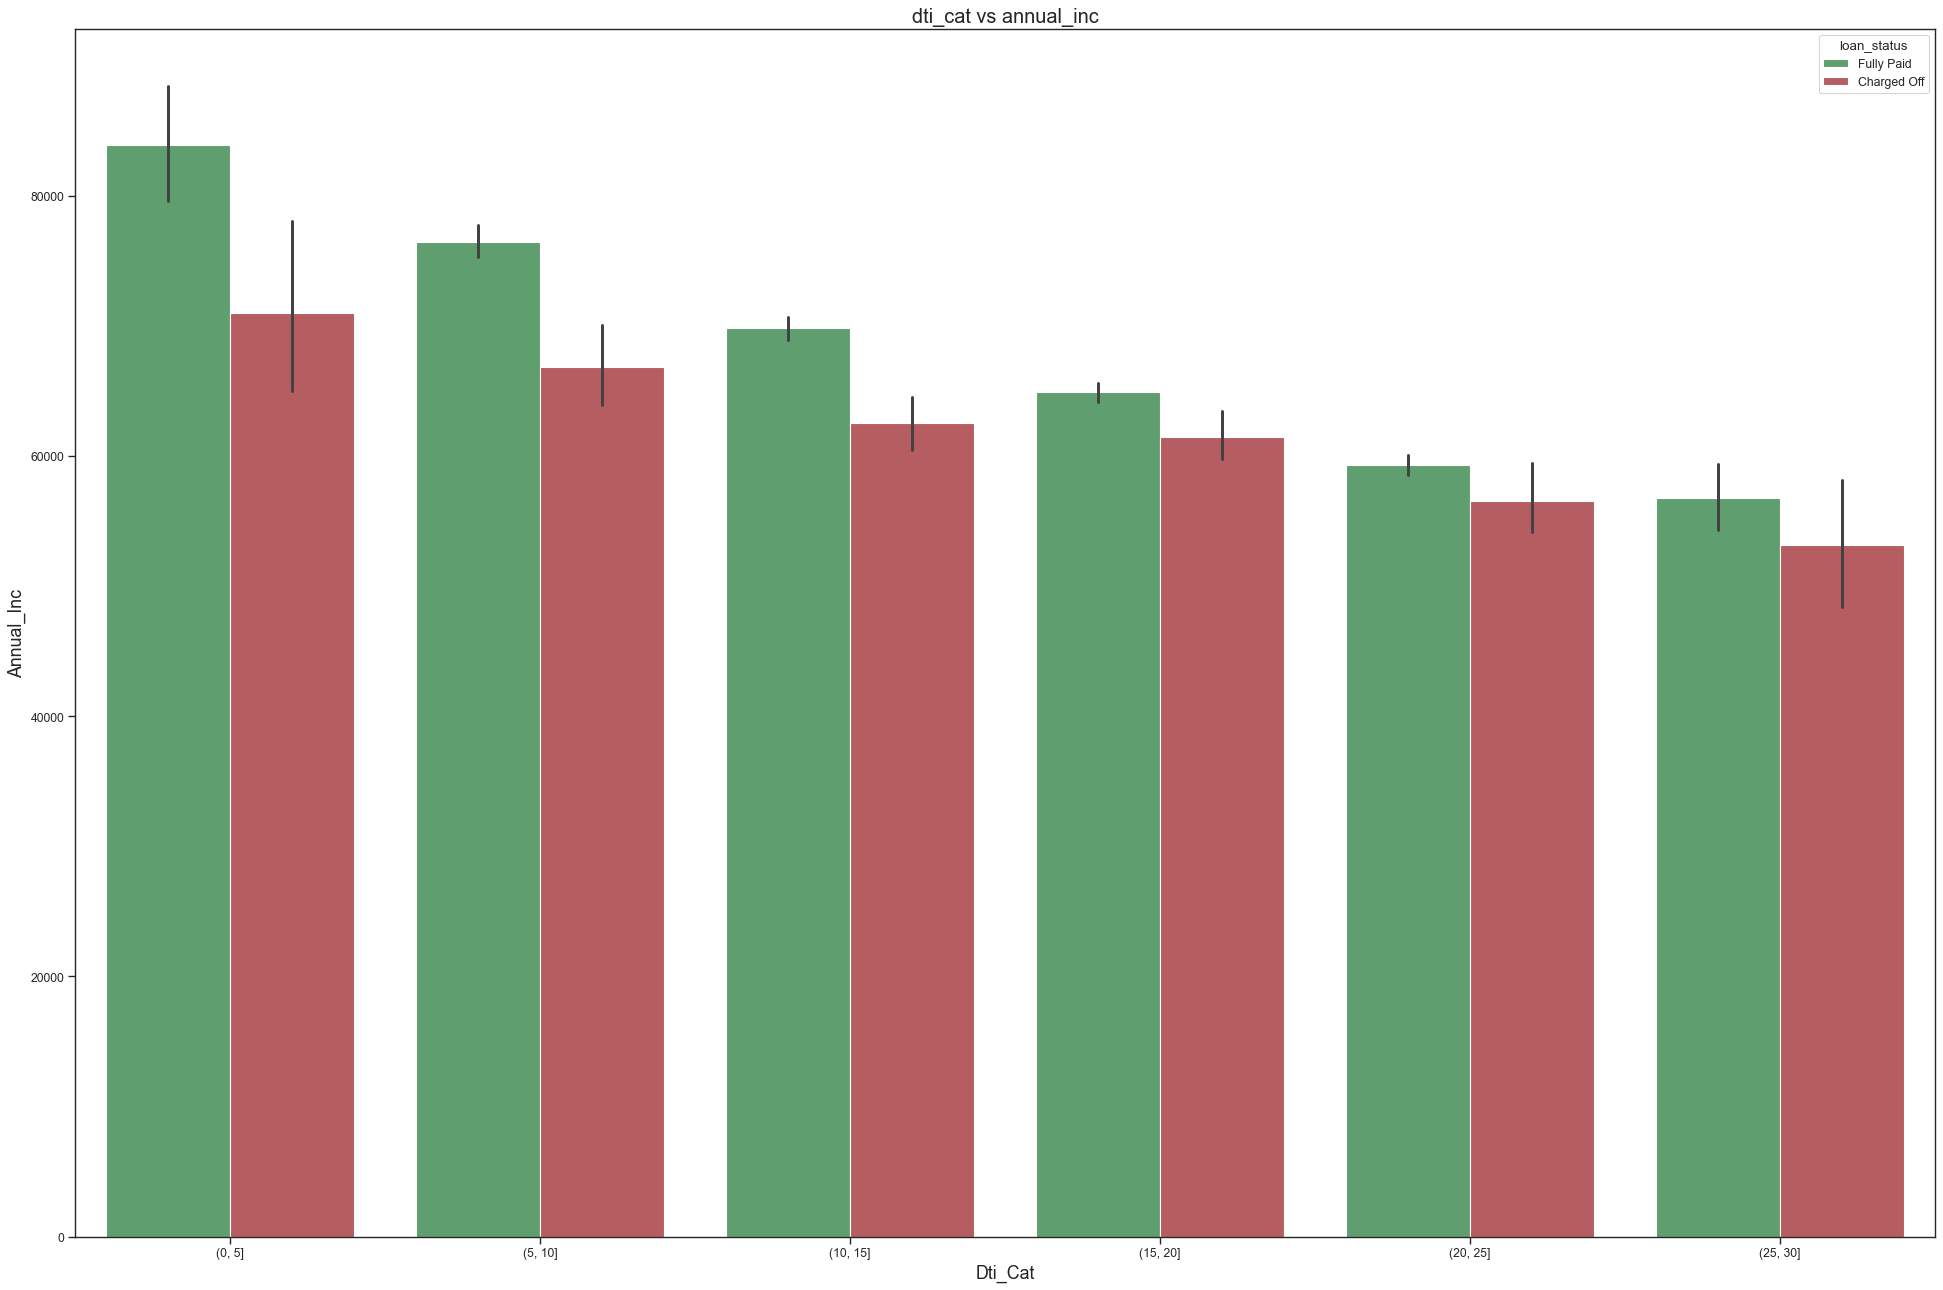

In [1836]:
barplot_bivariate(loan, 'dti_cat','annual_inc')

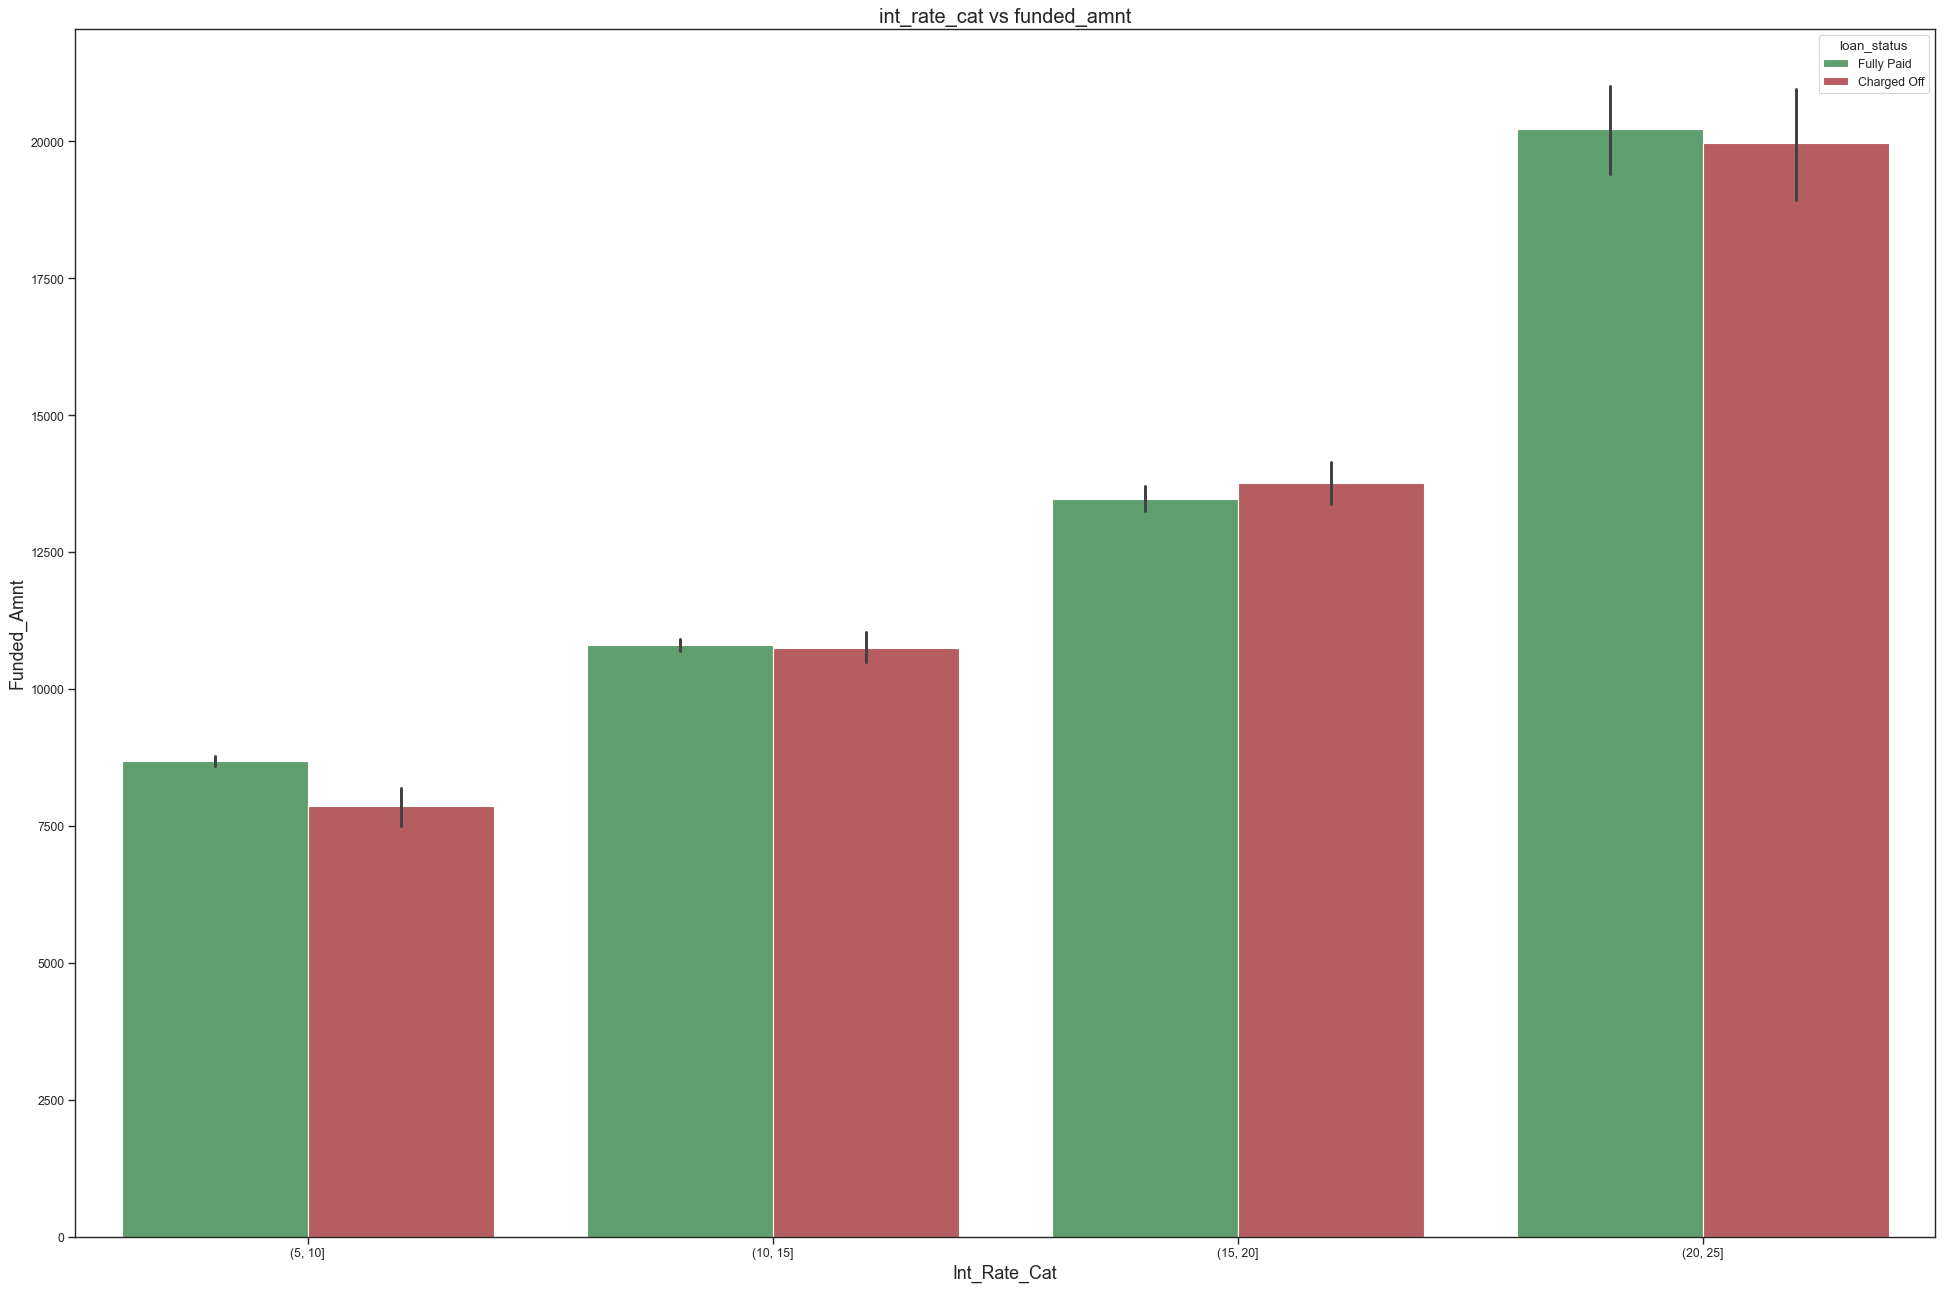

In [1837]:
barplot_bivariate(loan, 'int_rate_cat','funded_amnt')

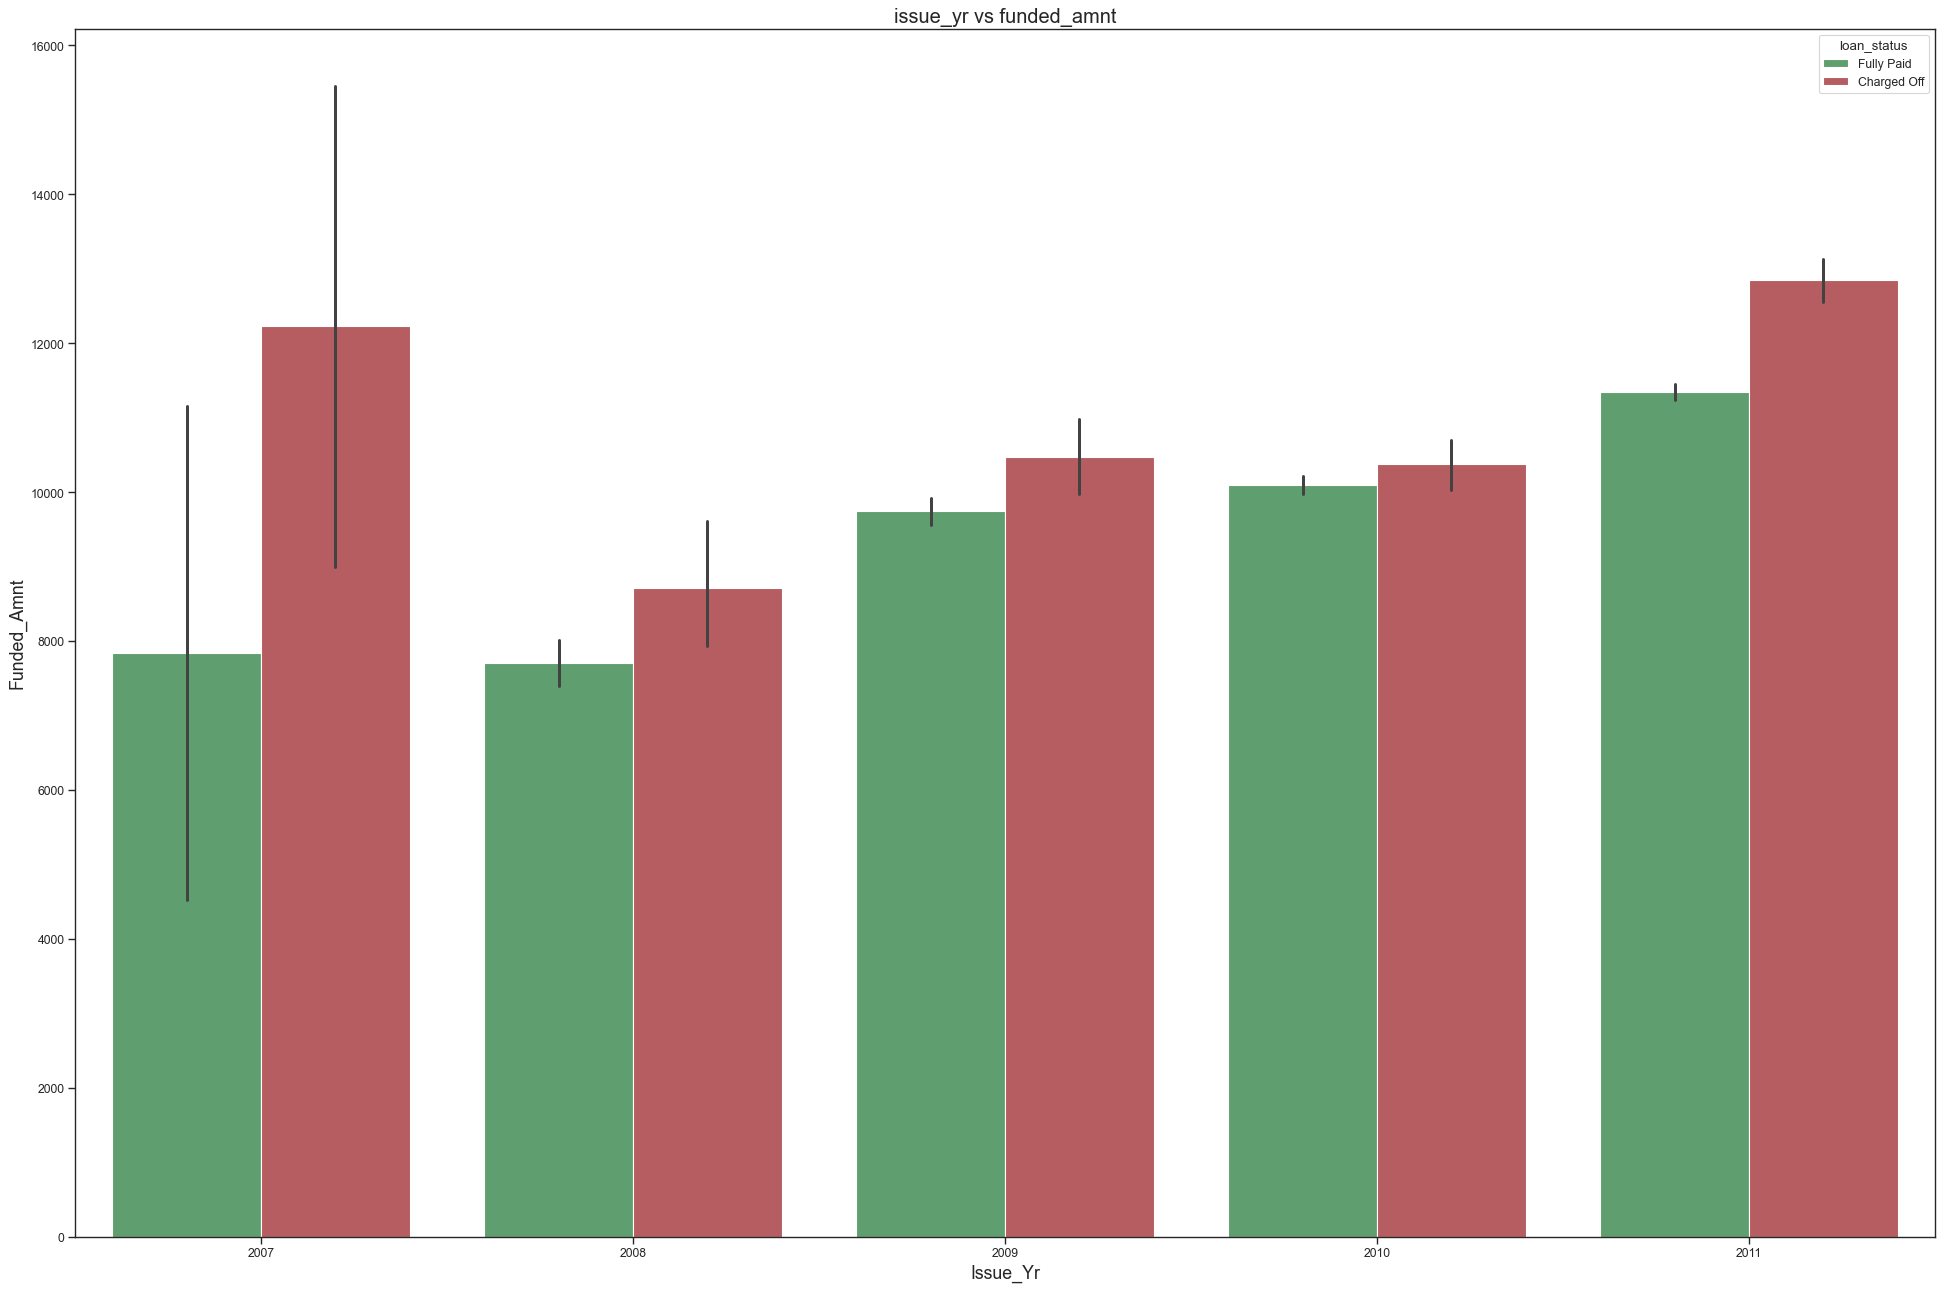

In [1838]:
barplot_bivariate(loan, 'issue_yr','funded_amnt')

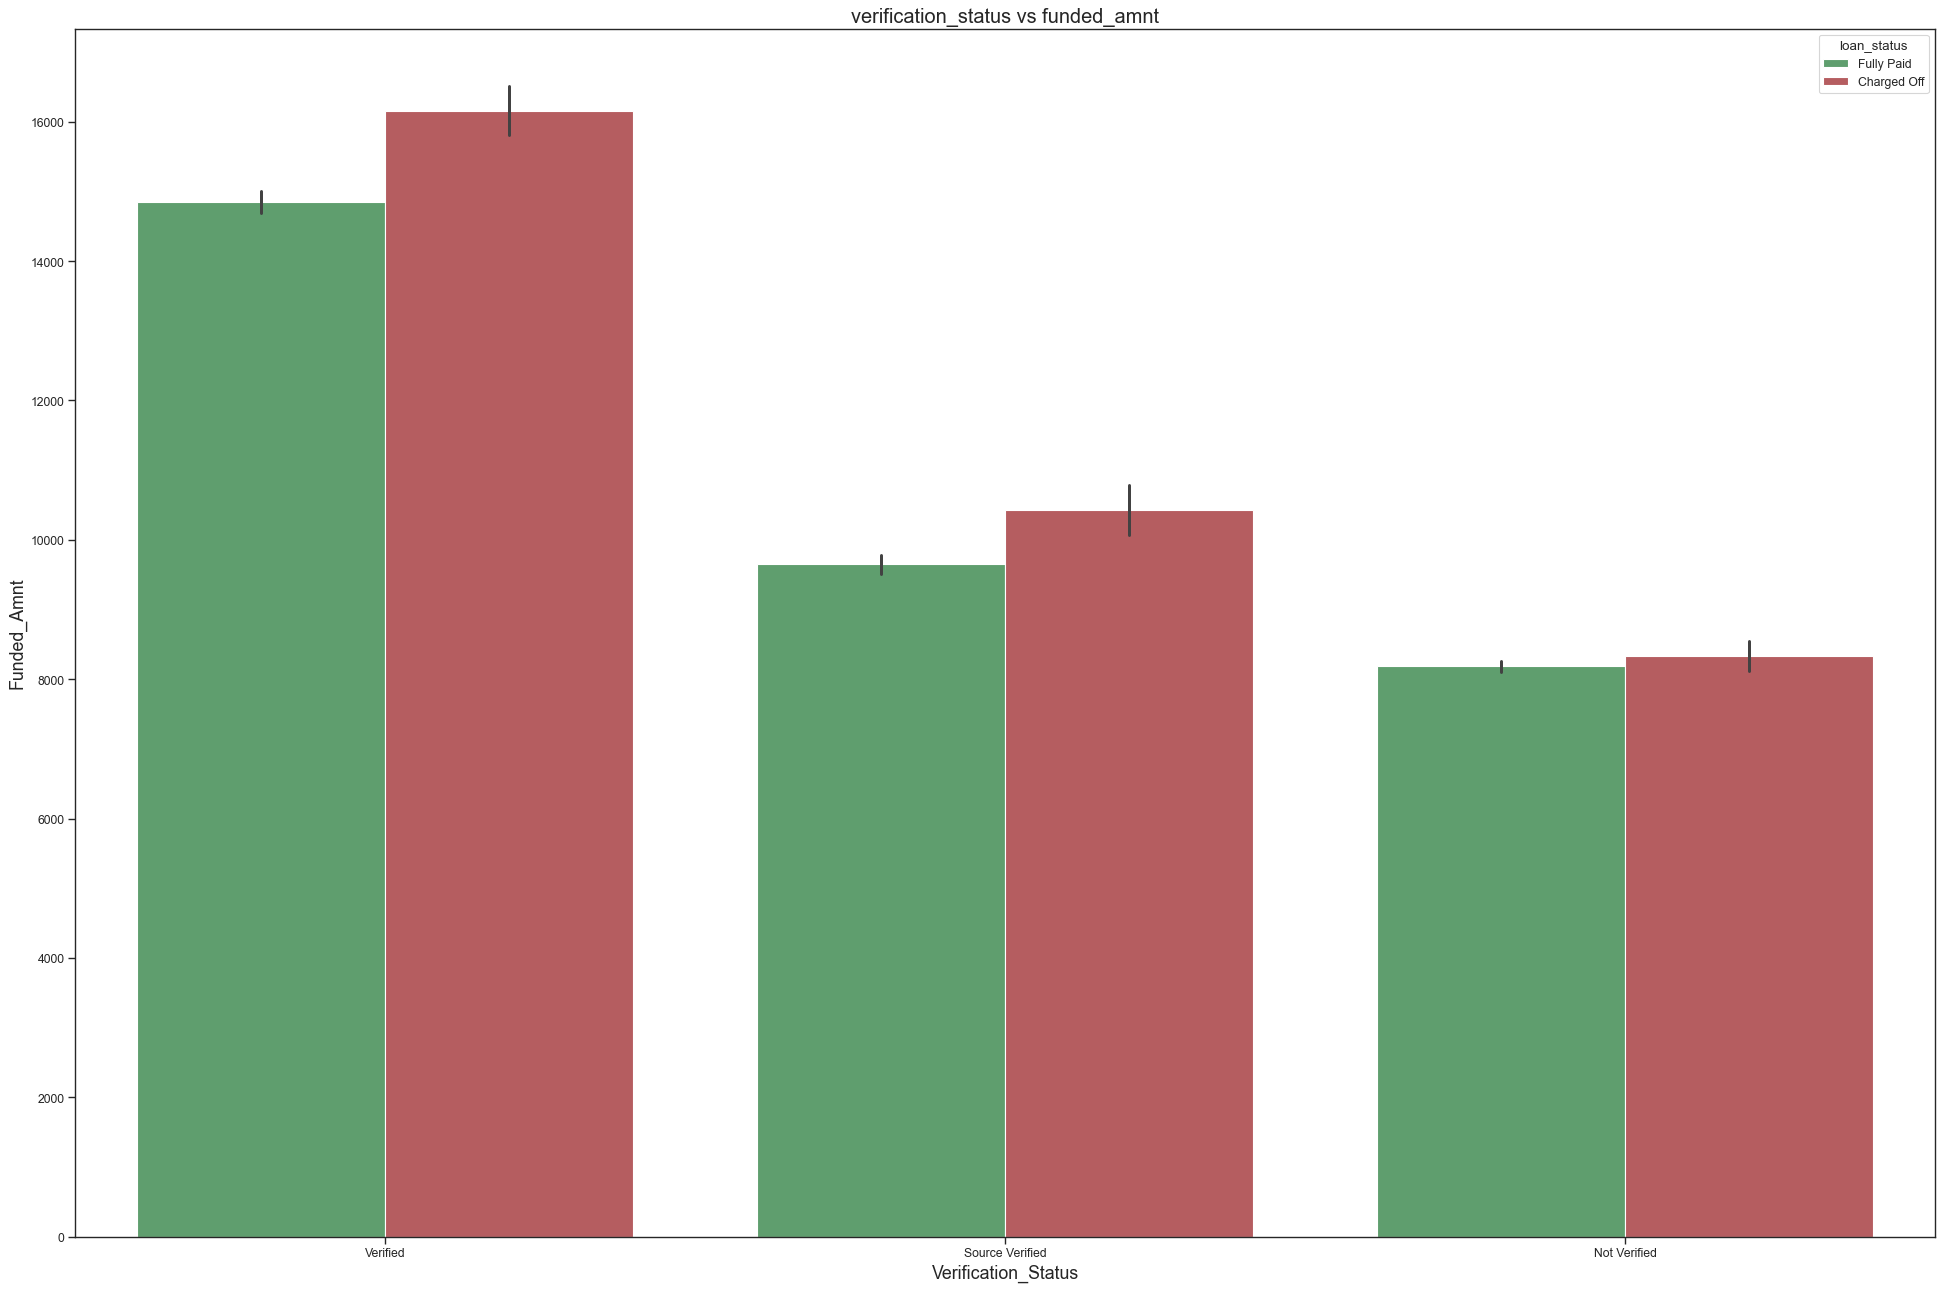

In [1839]:
barplot_bivariate(loan, 'verification_status','funded_amnt')

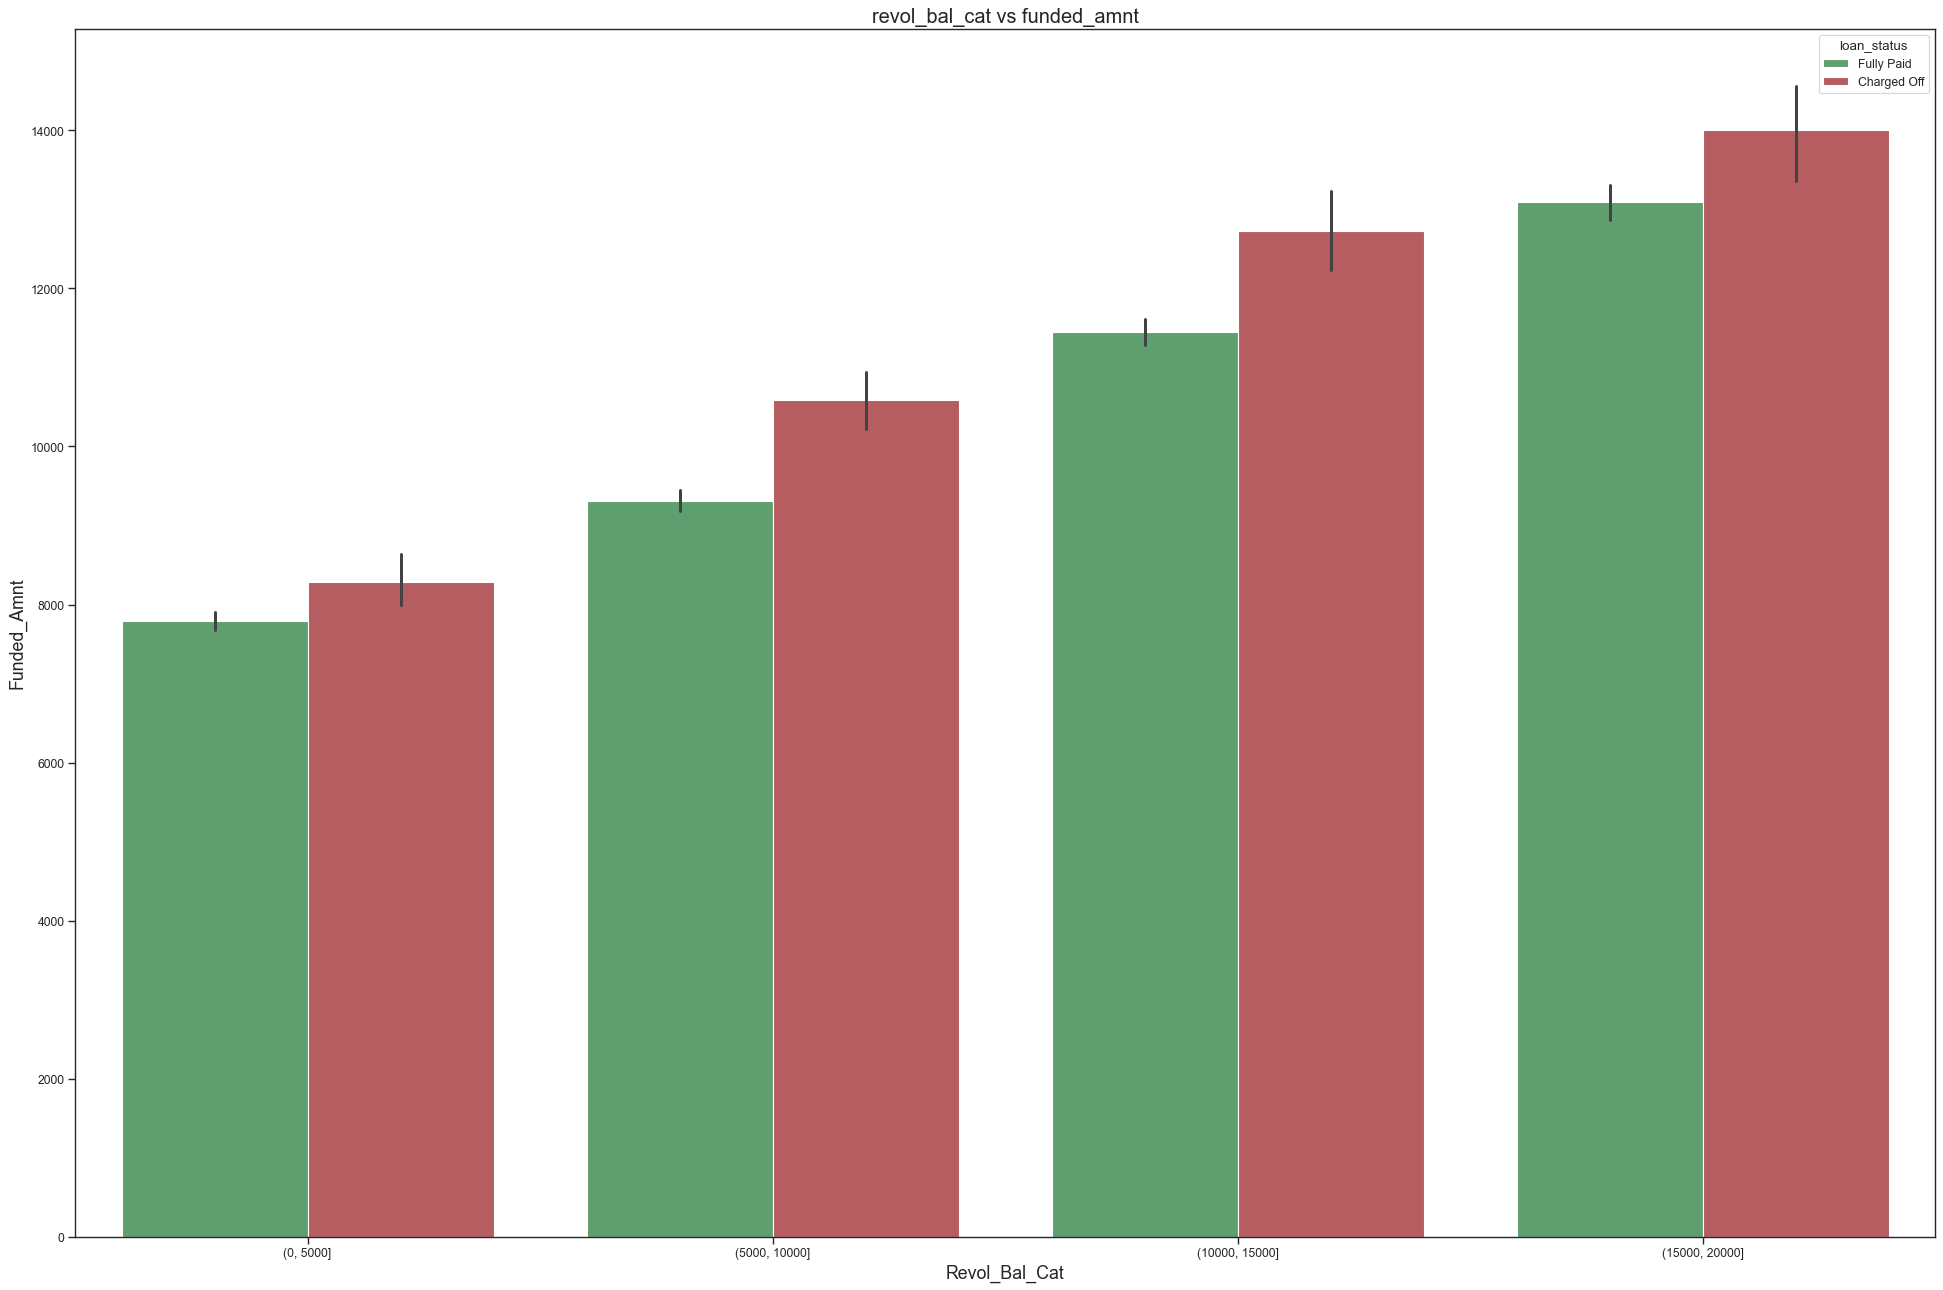

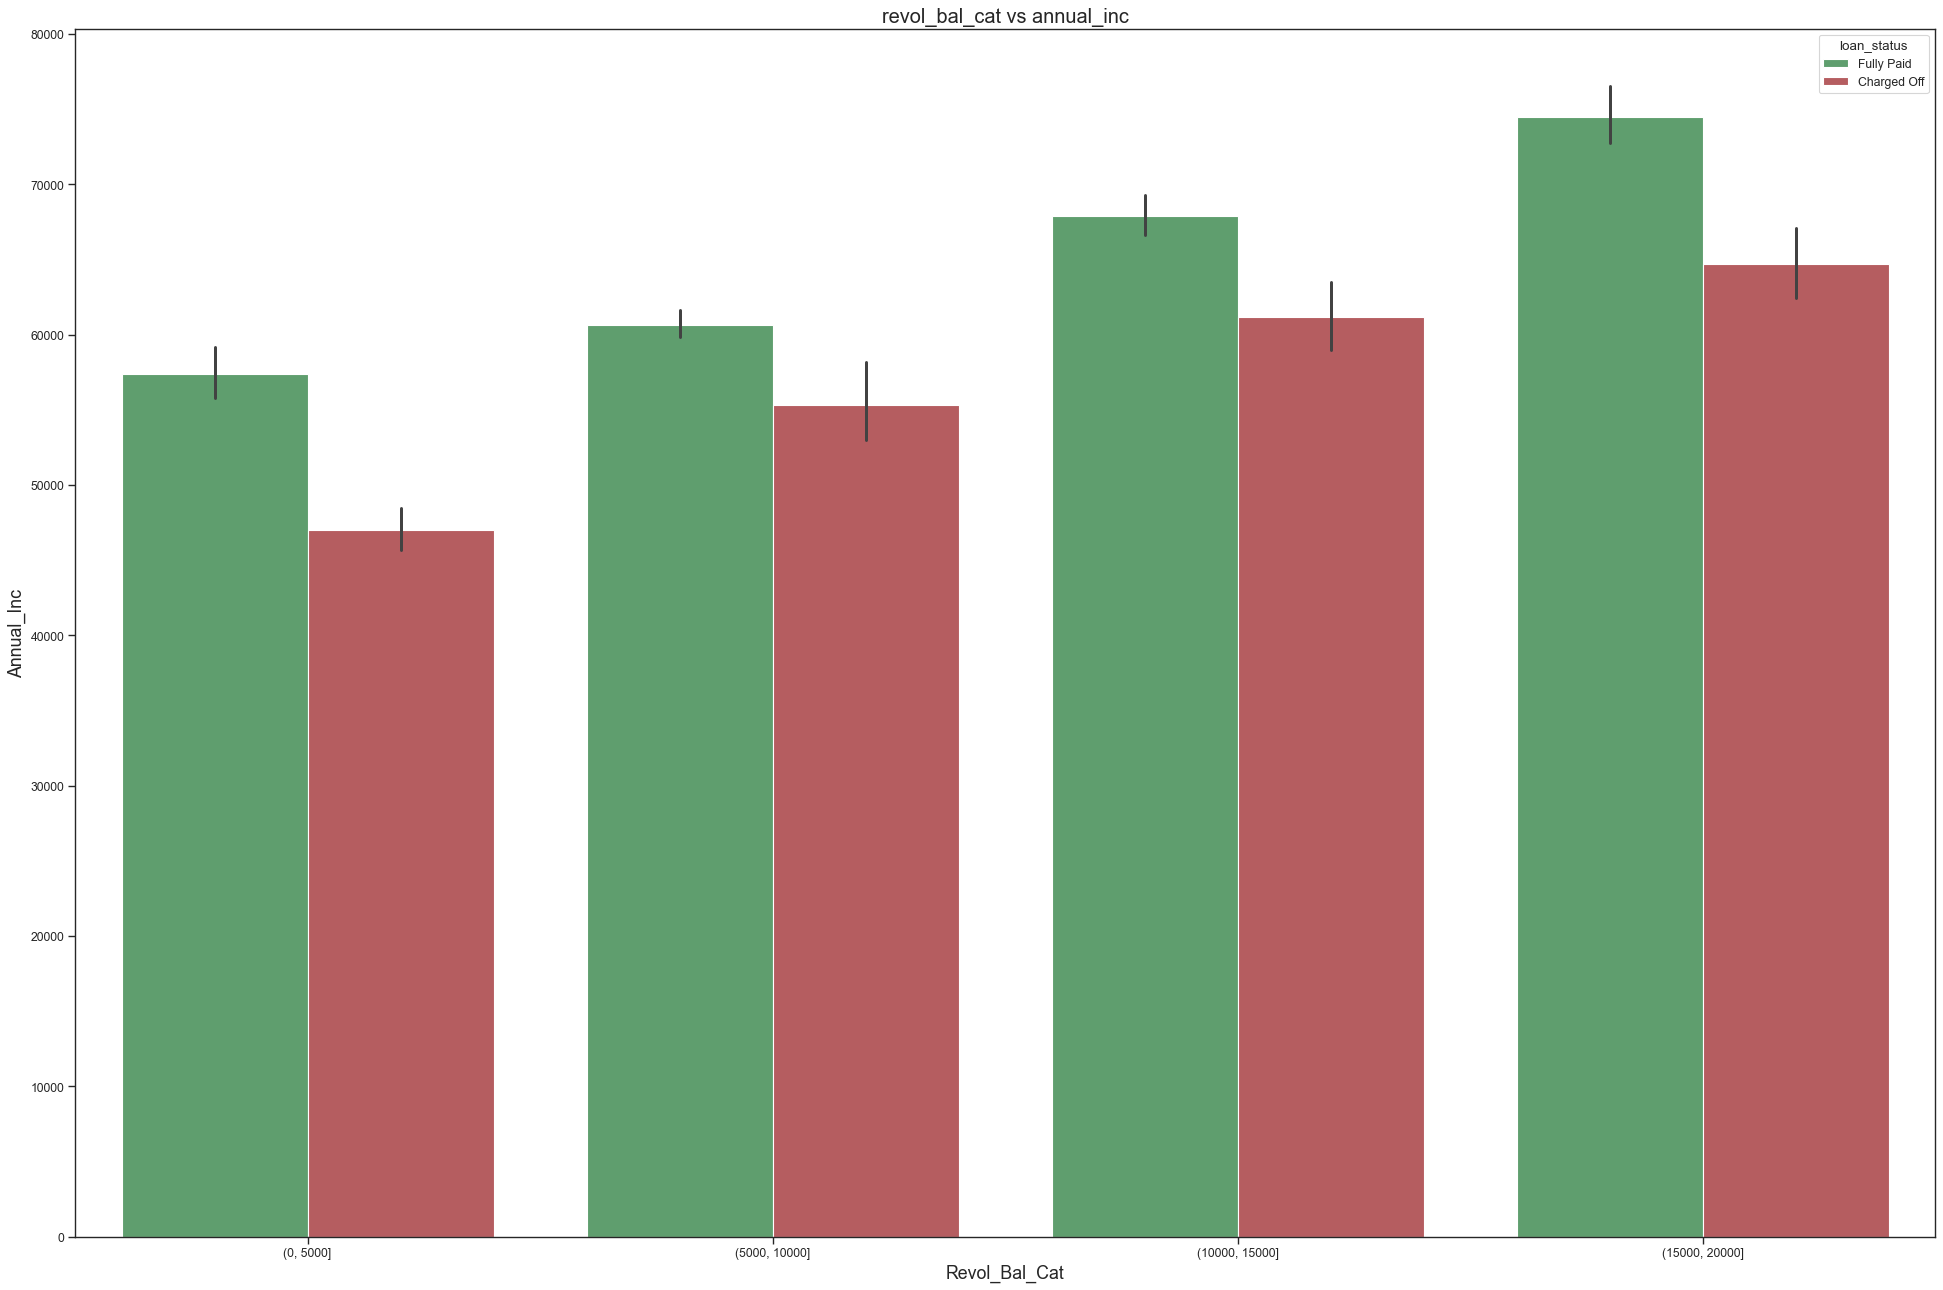

In [1840]:
barplot_bivariate(loan, 'revol_bal_cat','funded_amnt')
barplot_bivariate(loan, 'revol_bal_cat','annual_inc')